## Cleaning Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
## read data
bank = pd.read_csv('./bank-additional.csv', sep=';')
bank.head(5)

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

In [4]:
#check percentage of missing values for each column
missing_values = bank.isnull().mean()*100
missing_values.sum()

0.0

In [5]:
#remove unknown data
for column in bank.columns:
    bank.drop(bank[bank[column] == 'unknown'].index, inplace=True)

D:\Anaconda\envs\tf2\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
#remain 3090 data
bank.shape

(3090, 21)

In [7]:
#remove the duration variable
bank.drop(labels='duration', axis=1, inplace=True)
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
#remain 3090 rows 20 columns 
bank.shape

(3090, 20)

## Data Description and Visualization

In [9]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

Text(3.674999999999997, 0.5, 'Number of clients')

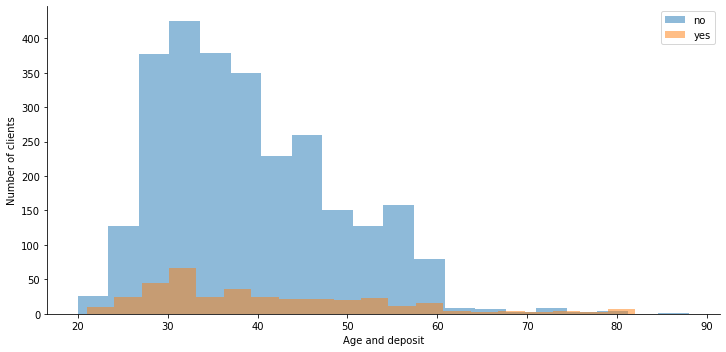

In [10]:
g= sns.FacetGrid(bank, hue='y', height =5, aspect=2)
g.map(plt.hist, 'age', bins=20, alpha=0.5)
plt.legend()

plt.xlabel('Age and deposit')
plt.ylabel('Number of clients')

In [11]:
bank.age.describe()
bank['age'].value_counts()

32    189
31    165
34    146
30    146
33    138
     ... 
75      2
20      2
64      1
77      1
88      1
Name: age, Length: 62, dtype: int64

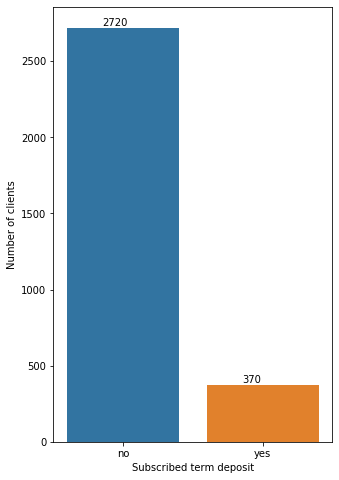

In [12]:
#count of whether subscribed term deposit or not
plt.figure(figsize = (5,8))
ax = sns.countplot(x='y' ,data = bank )
plt.xlabel('Subscribed term deposit')
plt.ylabel('Number of clients')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25, p.get_height()+15))

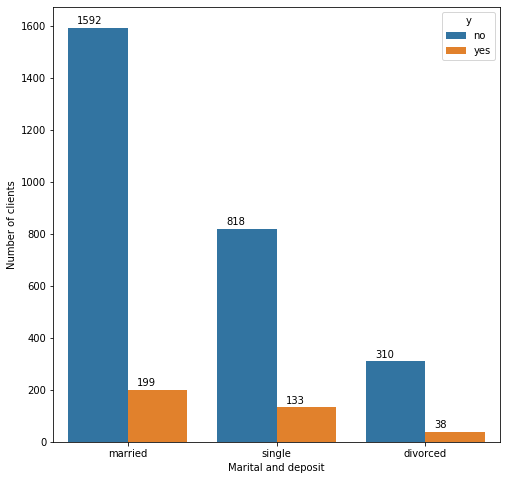

In [13]:
#Marital and deposit
plt.figure(figsize = (8,8))
ax = sns.countplot(x='marital',hue='y' ,data = bank )
plt.xlabel('Marital and deposit')
plt.ylabel('Number of clients')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.06, p.get_height()+15))

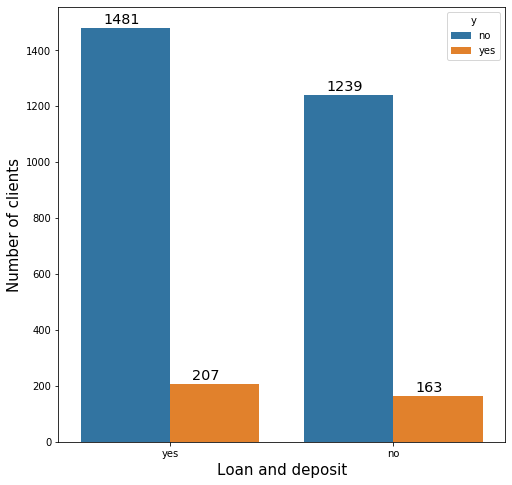

In [14]:
#loans and deposit
plt.figure(figsize = (8,8))
ax = sns.countplot(x='housing',hue='y' ,data = bank )
sns.set_context("paper",  font_scale=1.5) 
plt.xlabel('Loan and deposit',size=15)
plt.ylabel('Number of clients',size=15)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+15))

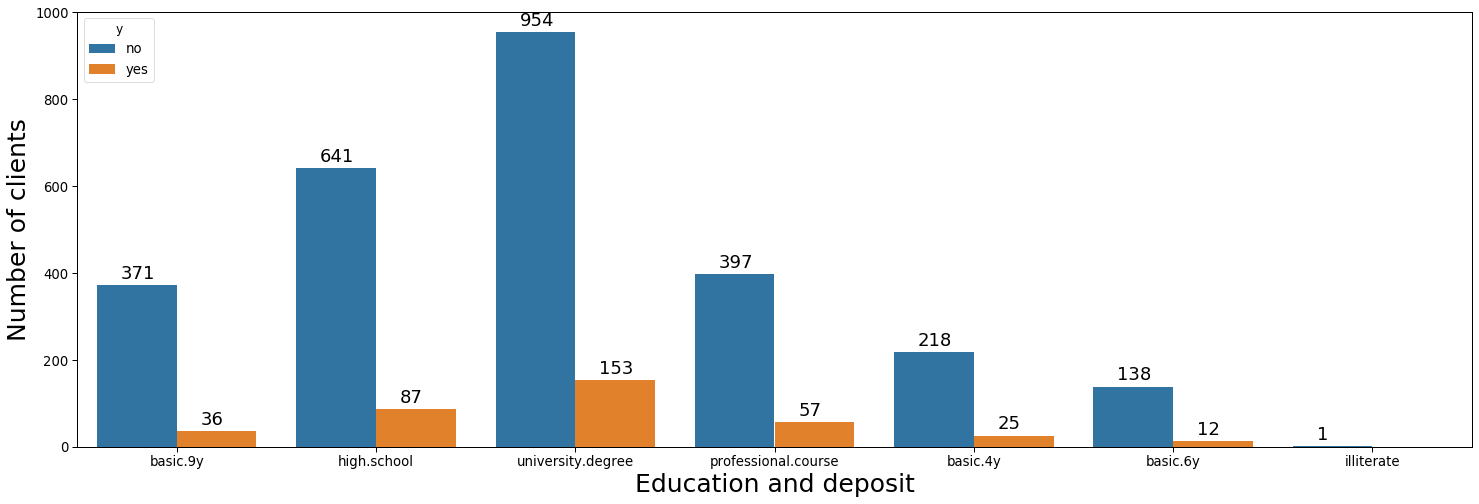

In [15]:
#Marital and deposit
plt.figure(figsize = (25,8))
ax = sns.countplot(x='education' ,hue='y' ,data = bank )
sns.set_context("paper",  font_scale=2) 
plt.xlabel('Education and deposit',size=25)
plt.ylabel('Number of clients',size=25)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.12, p.get_height()+15),size=18)

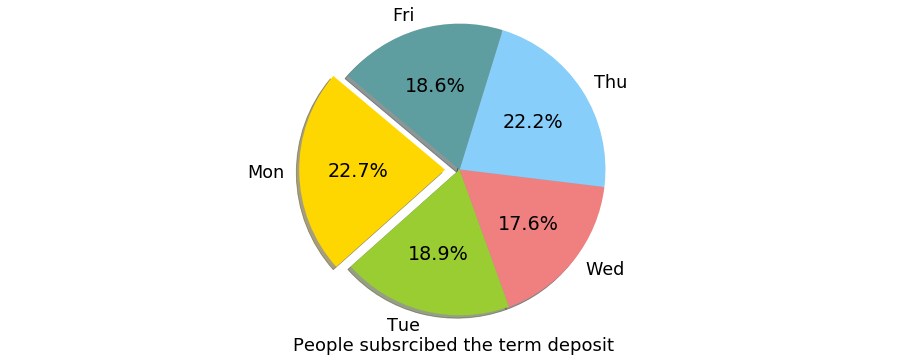

In [16]:
#deposit=yes
bank_deposit=bank[bank.y == 'yes']
#last contact day of the week
plt.figure(figsize = (16,6))
bank_deposit['day_of_week'].value_counts()
labels = ['Mon','Tue','Wed','Thu','Fri']
sizes=[84,70,65,82,69]
colors=['gold','yellowgreen','lightcoral','lightskyblue','CadetBlue']
explode=(0.1,0,0,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True,startangle=140)

# plt.title('Last contact day of the week (People subsrcibed the term deposit) ',size=15)
plt.xlabel('People subsrcibed the term deposit', size=18)
plt.axis('equal')
plt.show()

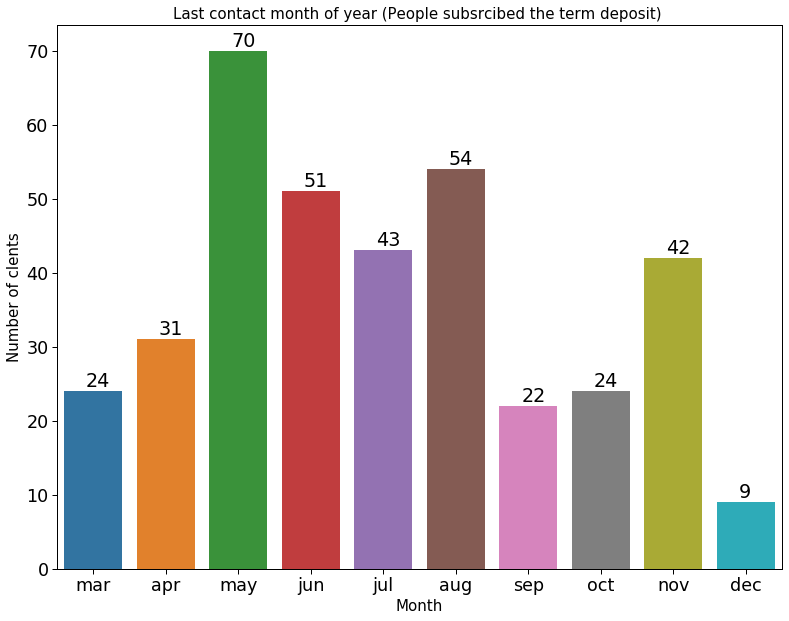

In [17]:
# Bar chart of job Vs deposite
plt.figure(figsize = (13,10))
ax=sns.countplot(x='month', data = bank_deposit, order=['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Last contact month of year (People subsrcibed the term deposit) ', size=15)
plt.xlabel('Month',size=15)
plt.ylabel('Number of clents', size=15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3, p.get_height()+0.6))

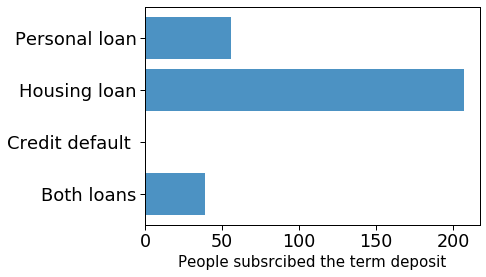

In [18]:
objects = ('Both loans', 'Credit default ', 'Housing loan', 'Personal loan')
y_pos = np.arange(len(objects))
performance = [39,0,207,56]

plt.barh(y_pos, performance, align='center', alpha=0.8)
plt.yticks(y_pos, objects,size=18)
plt.xlabel('People subsrcibed the term deposit',size=15)

plt.show()

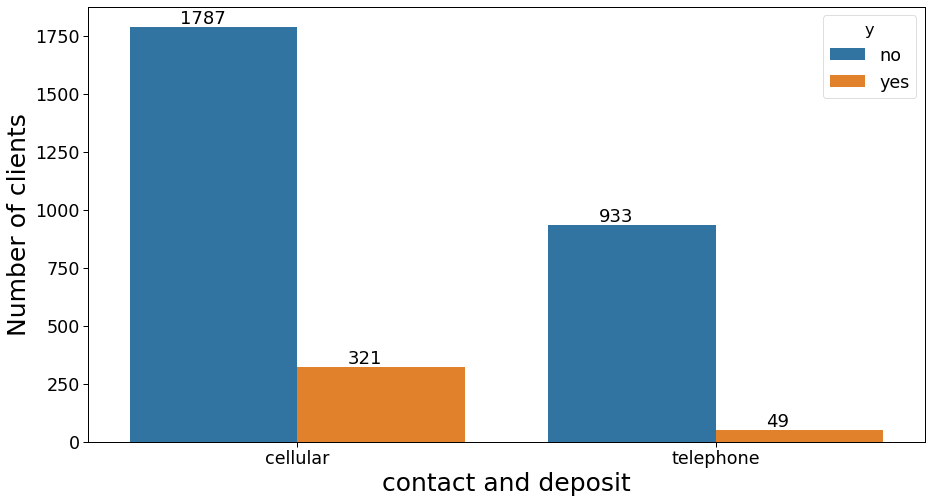

In [19]:
#Contact and deposit
plt.figure(figsize = (15,8))
ax = sns.countplot(x='contact' ,hue='y' ,data = bank )
sns.set_context("paper",  font_scale=2) 
plt.xlabel('contact and deposit',size=25)
plt.ylabel('Number of clients',size=25)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.12, p.get_height()+15),size=18)

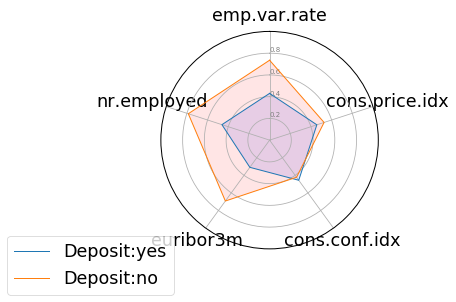

In [20]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Deposit:yes','Deposit:no','C','D'],
'emp.var.rate': [0.430, 0.735, 0, 0],
'cons.price.idx': [0.457, 0.527, 0, 0],
'cons.conf.idx': [0.456, 0.422, 0, 0],
'euribor3m': [0.309, 0.692, 0, 0],
'nr.employed': [0.461, 0.786, 0, 0]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=7)
plt.ylim(0,1)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Deposit:yes")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Deposit:no")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [21]:
#pdays: number of days that passed by after the client was last contacted from a previous campaign
#    999 means client was not previously contacted

print("Customers that have not been contacted before:", len(bank[bank.pdays==999]))
print("Maximum values on pdays    :", sorted(bank['pdays'].unique())[-2])

Customers that have not been contacted before: 2948
Maximum values on pdays    : 21


## Data Classification

In [22]:
#covert categorical attributes into dummy variables
dummy_bank = pd.get_dummies(bank, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'day_of_week','poutcome'])

dummy_bank.shape

(3090, 57)

In [23]:
dummy_bank['y']=dummy_bank['y'].map({'yes': 1,'no': 0})
dummy_bank.head()

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   30         2    999         0          -1.8          92.893   
1   39         4    999         0           1.1          93.994   
2   25         1    999         0           1.4          94.465   
4   47         1    999         0          -0.1          93.200   
5   32         3    999         2          -1.1          94.199   

   cons.conf.idx  euribor3m  nr.employed  y  ...  month_oct  month_sep  \
0          -46.2      1.313       5099.1  0  ...          0          0   
1          -36.4      4.855       5191.0  0  ...          0          0   
2          -41.8      4.962       5228.1  0  ...          0          0   
4          -42.0      4.191       5195.8  0  ...          0          0   
5          -37.5      0.884       4963.6  0  ...          0          1   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
4                0                1                0                0   
5                0                0                1                0   

   day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  
0                0                 0                     1                 0  
1                0                 0                     1                 0  
2                1                 0                     1                 0  
4                0                 0                     1                 0  
5                0                 1                     0                 0  

[5 rows x 57 columns]

In [24]:
#dummy_bank.to_csv('bank_new.csv')

In [25]:
## read data
import pandas as pd
dummy_bank = pd.read_csv('./bank_new.csv', sep=',')
dummy_bank.head()

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   30         2    999         0          -1.8          92.893   
1   39         4    999         0           1.1          93.994   
2   25         1    999         0           1.4          94.465   
3   47         1    999         0          -0.1          93.200   
4   32         3    999         2          -1.1          94.199   

   cons.conf.idx  euribor3m  nr.employed  y  ...  month_oct  month_sep  \
0          -46.2      1.313       5099.1  0  ...          0          0   
1          -36.4      4.855       5191.0  0  ...          0          0   
2          -41.8      4.962       5228.1  0  ...          0          0   
3          -42.0      4.191       5195.8  0  ...          0          0   
4          -37.5      0.884       4963.6  0  ...          0          1   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                0                1                0                0   
4                0                0                1                0   

   day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  
0                0                 0                     1                 0  
1                0                 0                     1                 0  
2                1                 0                     1                 0  
3                0                 0                     1                 0  
4                0                 1                     0                 0  

[5 rows x 57 columns]

In [26]:
# dat = dummy_bank
# corr=dat.corr()
dat = dummy_bank
dat=dat[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
corr=dat.corr()
corr

age  campaign     pdays  previous  emp.var.rate  \
age             1.000000 -0.027282 -0.058821  0.068247     -0.056127   
campaign       -0.027282  1.000000  0.055585 -0.087539      0.185442   
pdays          -0.058821  0.055585  1.000000 -0.589026      0.272346   
previous        0.068247 -0.087539 -0.589026  1.000000     -0.402321   
emp.var.rate   -0.056127  0.185442  0.272346 -0.402321      1.000000   
cons.price.idx -0.032278  0.147708  0.057008 -0.146895      0.741057   
cons.conf.idx   0.085017  0.022350 -0.102622 -0.029191      0.164275   
euribor3m      -0.047686  0.167683  0.303056 -0.446741      0.967525   
nr.employed    -0.070322  0.164339  0.380527 -0.501990      0.890636   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age                  -0.032278       0.085017  -0.047686    -0.070322  
campaign              0.147708       0.022350   0.167683     0.164339  
pdays                 0.057008      -0.102622   0.303056     0.380527  
previous             -0.146895      -0.029191  -0.446741    -0.501990  
emp.var.rate          0.741057       0.164275   0.967525     0.890636  
cons.price.idx        1.000000       0.010215   0.630304     0.433345  
cons.conf.idx         0.010215       1.000000   0.251835     0.094547  
euribor3m             0.630304       0.251835   1.000000     0.942282  
nr.employed           0.433345       0.094547   0.942282     1.000000

Text(0.5, 1, 'Heatmap of Correlation Matrix')

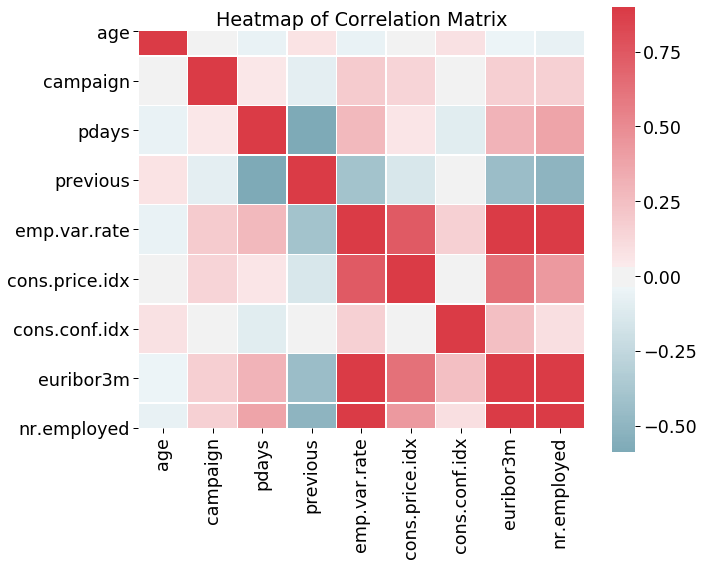

In [27]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

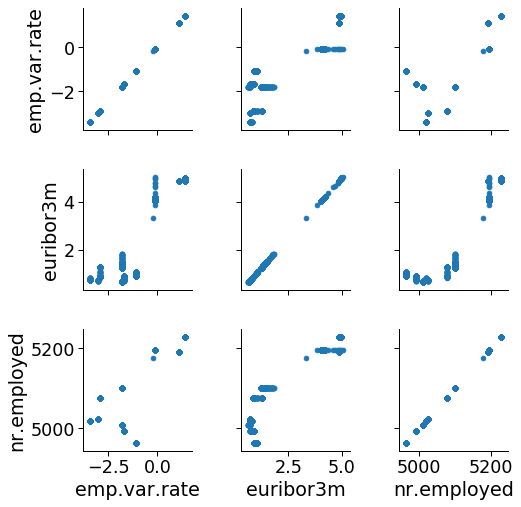

In [28]:
dat = dummy_bank
dat.columns
dat=dat[['emp.var.rate','euribor3m','nr.employed']]
dat.corr()
g = sns.PairGrid(dat)
g.map(plt.scatter)

In [29]:
# Extract the y column (the dependent variable)
dat = dummy_bank
corr=dat.corr()
corr_deposite = pd.DataFrame(corr['y'].drop('y'))
corr_deposite.sort_values(by = 'y', ascending = False)

y
poutcome_success               0.333524
previous                       0.263432
month_mar                      0.163316
contact_cellular               0.146830
month_oct                      0.119637
month_sep                      0.112414
month_dec                      0.085752
job_retired                    0.076412
age                            0.063326
job_student                    0.055896
cons.conf.idx                  0.055680
month_apr                      0.047188
education_university.degree    0.042507
marital_single                 0.041305
poutcome_failure               0.040059
job_admin.                     0.035087
job_unemployed                 0.034556
month_jun                      0.022529
day_of_week_mon                0.017509
day_of_week_thu                0.016238
loan_no                        0.012674
housing_yes                    0.009765
education_professional.course  0.007426
default_no                     0.006636
job_technician                 0.000996
job_housemaid                  0.000126
education_high.school         -0.000403
day_of_week_fri               -0.001148
default_yes                   -0.006636
education_illiterate          -0.006636
day_of_week_tue               -0.008502
housing_no                    -0.009765
job_self-employed             -0.010521
marital_divorced              -0.011572
loan_yes                      -0.012674
month_nov                     -0.013070
month_aug                     -0.014327
education_basic.4y            -0.015172
day_of_week_wed               -0.024414
job_management                -0.027523
education_basic.6y            -0.027649
marital_married               -0.031212
job_services                  -0.031625
job_entrepreneur              -0.031689
education_basic.9y            -0.037536
month_jul                     -0.049647
job_blue-collar               -0.050248
campaign                      -0.076542
cons.price.idx                -0.099391
month_may                     -0.101644
contact_telephone             -0.146830
poutcome_nonexistent          -0.217490
emp.var.rate                  -0.297845
euribor3m                     -0.313754
pdays                         -0.338074
nr.employed                   -0.364581

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

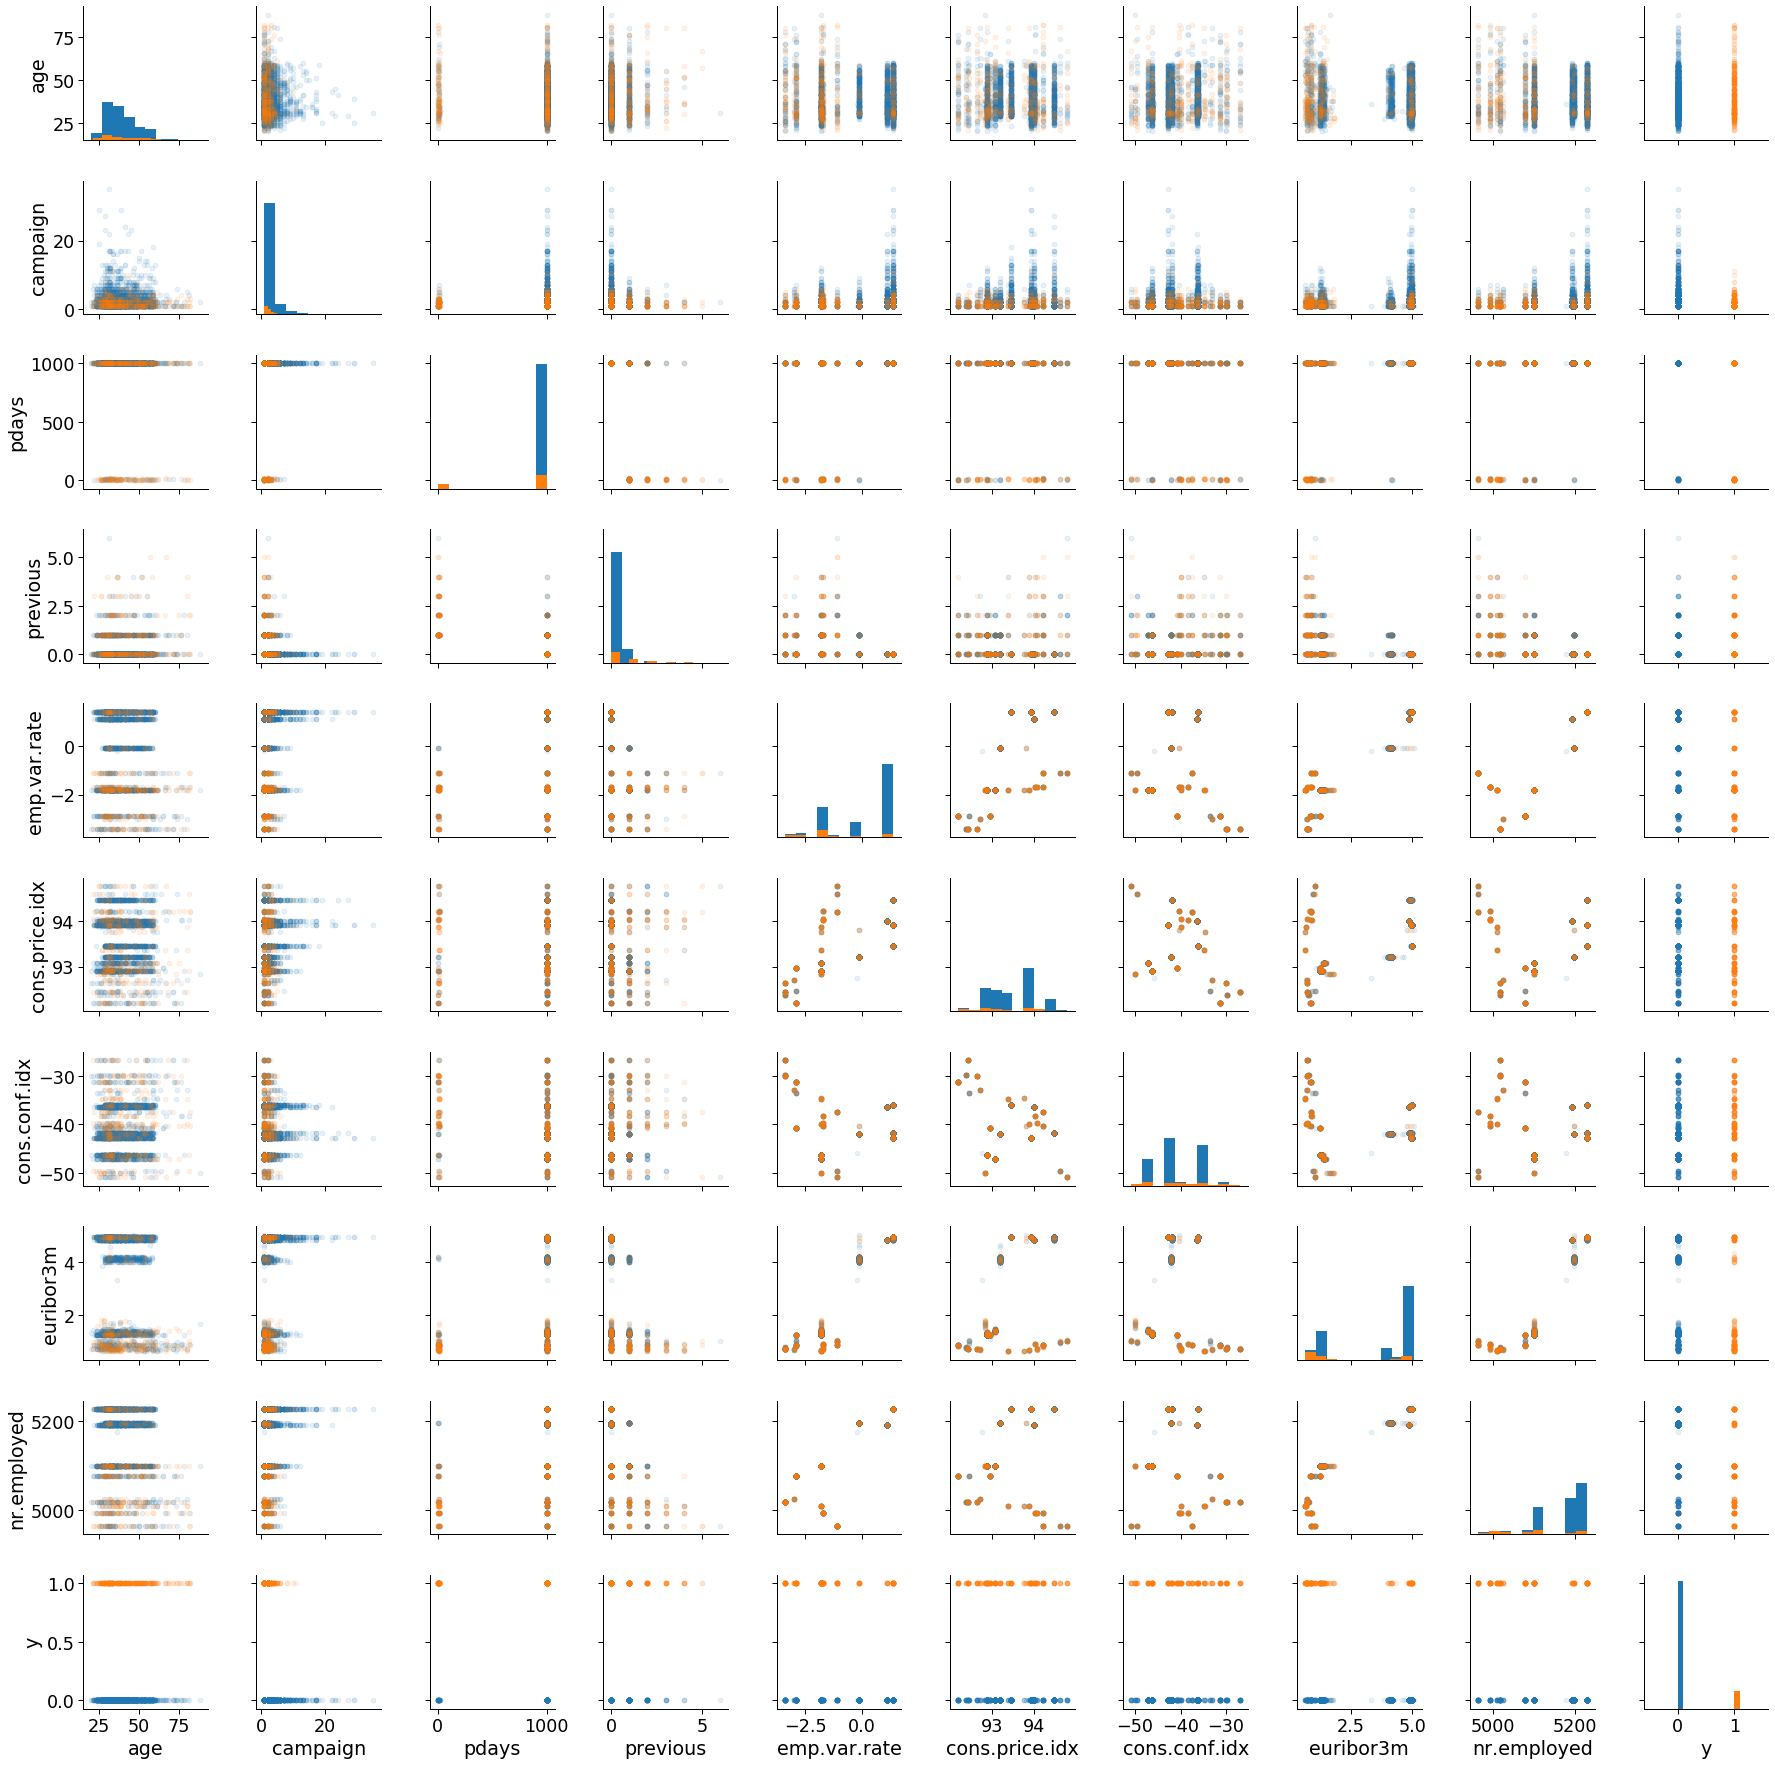

In [31]:
attributes=['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data =dummy_bank[attributes + ['y']]

g = sns.PairGrid(data, hue='y')
g.map_diag(plt.hist)

g.map_offdiag(plt.scatter, alpha=0.1)

## **<font color = red>	SVM & Training time</font>**


## Balance training data
(y=0 : 630, y=1 :542)

In [1]:
## read data
import pandas as pd
dummy_bank = pd.read_csv('./train.csv', sep=',')

In [2]:
#first seperate y=0 y=1
bank_1=dummy_bank[dummy_bank.y == 1]
bank_0=dummy_bank[dummy_bank.y == 0]

In [3]:
bank_1.shape

(271, 57)

In [4]:
bank_0.shape

(1892, 57)

In [5]:
#y=0 undersampling
bank_0_m=bank_0.sample(n=630)
bank_0_m.shape

(630, 57)

In [6]:
# y=1 oversampling 2 times
bank_1_2times = bank_1.append(bank_1)
bank_1_2times.shape

(542, 57)

In [7]:
#combine 
dummy_bank=bank_1_2times.append(bank_0_m)

In [8]:
dummy_bank.shape

(1172, 57)

In [ ]:
dummy_bank.to_csv('bank_new_balance2.csv')

## Build the Data Model

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [49]:
## read training data
import pandas as pd
train = pd.read_csv('./bank_new_balance2.csv', sep=',')
train.shape

(1172, 57)

In [50]:
## read testing data
import pandas as pd
test = pd.read_csv('./test.csv', sep=',')
test.shape

(927, 57)

In [51]:
X_train = train.drop('y', axis=1).values
X_test  = test.drop('y', axis=1).values
y_train = train['y'].values
y_test  = test['y'].values

print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (1172, 56)
y train size:  (1172,)
X test size:  (927, 56)
y test size:  (927,)


In [52]:
# column index of numeric variables
idx_numeric=[0,1,2,3,4,5,6,7,8]

# standardize numeric variables only (mean=0 sd=1)
scaler = StandardScaler()
X_train[:,idx_numeric]=scaler.fit_transform(X_train[:,idx_numeric])
X_test[:,idx_numeric]=scaler.transform(X_test[:,idx_numeric])

## Machine Learning SVM

In [64]:
from sklearn.model_selection import GridSearchCV

In [54]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.05,0.1,0.5,1,2,10,50,100],
                     'C': [0.05,0.1,0.5,1,2]},
                    {'kernel': ['poly'], 'gamma': [0.05,0.1,0.5,1,2,10,50,100],
                     'C': [0.05,0.1,0.5,1,2]},
                    {'kernel': ['sigmoid'], 'gamma': [0.05,0.1,0.5,1,2,10,50,100],
                     'C': [0.05,0.1,0.5,1,2]},
                    {'kernel': ['linear'], 'C': [0.05,0.1,0.5,1,2]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.05, 0.1, 0.5, 1, 2, 10, 50, 100], 'C': [0.05, 0.1, 0.5, 1, 2]}, {'kernel': ['poly'], 'gamma': [0.05, 0.1, 0.5, 1, 2, 10, 50, 100], 'C': [0.05, 0.1, 0.5, 1, 2]}, {'kernel': ['sigmoid'], 'gamma': [0.05, 0.1, 0.5, 1, 2, 10, 50, 100], 'C': [0.05, 0.1, 0.5, 1, 2]}, {'kernel': ['linear'], 'C': [0.05, 0.1, 0.5, 1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
print('The best model is: ', clf.best_params_)
conf_m = confusion_matrix(y_test, clf.predict(X_test))
print(conf_m)
#separating the matrtix into positive and negative and true and false
true_n = conf_m[0][0]
false_p = conf_m[0][1]
false_n = conf_m[1][0]
true_p = conf_m[1][1]
#manually calculating the assessment metrics
accuracy = (true_n+true_p)/(true_n+false_p+false_n+true_p)
precision = true_p/(true_p+false_p)
recall = true_p/(true_p+false_n)
f_1= 2*(precision * recall)/(precision + recall)
#printing our results
print("Accuracy :{}".format(round(accuracy,4)))
print("Precision :{}".format(round(precision,4)))
print("Recall: {}".format(round(recall,4)))
print("F-1: {}".format(round(f_1,4)))   

The best model is:  {'C': 1, 'gamma': 50, 'kernel': 'rbf'}
[[826   2]
 [ 98   1]]
Accuracy :0.8921
Precision :0.3333
Recall: 0.0101
F-1: 0.0196


## SVM Training Time

In [57]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [50],
                     'C': [1]
                   }]

clf_rbf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [50], 'C': [1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
%%time
clf_rbf.fit(X_train, y_train)

Wall time: 1.77 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [50], 'C': [1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
print('SVM training time is  1.77s ')

SVM training time is  1.77s 


## **<font color = red>	Neural Network & Training time</font>**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
## read training data
import pandas as pd
train = pd.read_csv('./bank_new_balance2.csv', sep=',')
train.shape

(1172, 57)

In [42]:
## read testing data
import pandas as pd
test = pd.read_csv('./test.csv', sep=',')
test.shape

(927, 57)

In [43]:
#covert y into dummy variables
test = pd.get_dummies(test, columns=['y'])
train = pd.get_dummies(train, columns=['y'])

In [44]:
X_train = train.drop(['y_0','y_1'], axis=1).values
X_test  = test.drop(['y_0','y_1'], axis=1).values
y_train = train[['y_0','y_1']].values
y_test  = test[['y_0','y_1']].values

print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (1172, 56)
y train size:  (1172, 2)
X test size:  (927, 56)
y test size:  (927, 2)


In [45]:
# column index of numeric variables
idx_numeric=[0,1,2,3,4,5,6,7,8]

# standardize numeric variables only (mean=0 sd=1)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
X_train[:,idx_numeric]=scaler.fit_transform(X_train[:,idx_numeric])
X_test[:,idx_numeric]=scaler.transform(X_test[:,idx_numeric])

In [46]:
colnum = X_train.shape[1]
colnum

56

In [47]:
X_valid, X_train = X_train[:117], X_train[117:]
y_valid, y_train = y_train[:117], y_train[117:]

In [48]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

keras.__version__

AssertionError: 

## Neural network

### Cross-validation with more than one hyperparameters

In [51]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, Masking, TimeDistributed
from tensorflow. keras.utils import plot_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

In [60]:
def create_model_2(optimizer= keras.optimizers.SGD(lr=0.01, nesterov=True), init='glorot_uniform'):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(8, input_dim=colnum, kernel_initializer=init, activation="sigmoid"))
    model.add(keras.layers.Dense(6, kernel_initializer=init,activation="sigmoid"))
    model.add(keras.layers.Dense(2, kernel_initializer=init,activation="softmax"))
 
    model.compile(loss='categorical_crossentropy', 
                  optimizer= optimizer, 
                  metrics=['accuracy'])

    return model

In [ ]:
# keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)
import numpy
seed = 42
numpy.random.seed(seed)
# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)

# initializer, batch size and number of epochs
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
batches = [20,50,80]
epochs = [200,300,500]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(X_train, y_train)

Train on 703 samples
Epoch 1/200
703/703 [==============================] - 3s 4ms/sample - loss: 0.6012 - acc: 0.8450
Epoch 2/200
703/703 [==============================] - 0s 272us/sample - loss: 0.4647 - acc: 0.8962
Epoch 3/200
703/703 [==============================] - 0s 319us/sample - loss: 0.4056 - acc: 0.8962
Epoch 4/200
703/703 [==============================] - 0s 257us/sample - loss: 0.3744 - acc: 0.8962
Epoch 5/200
703/703 [==============================] - 0s 249us/sample - loss: 0.3577 - acc: 0.8962
Epoch 6/200
703/703 [==============================] - 0s 257us/sample - loss: 0.3491 - acc: 0.8962
Epoch 7/200
703/703 [==============================] - 0s 275us/sample - loss: 0.3433 - acc: 0.8962
Epoch 8/200
703/703 [==============================] - 0s 255us/sample - loss: 0.3397 - acc: 0.8962
Epoch 9/200
703/703 [==============================] - 0s 262us/sample - loss: 0.3375 - acc: 0.8962
Epoch 10/200
703/703 [==============================] - 0s 276us/sample - loss: 0

703/703 [==============================] - 0s 231us/sample - loss: 0.3335 - acc: 0.8962
Epoch 162/200
703/703 [==============================] - 0s 232us/sample - loss: 0.3335 - acc: 0.8962
Epoch 163/200
703/703 [==============================] - 0s 232us/sample - loss: 0.3336 - acc: 0.8962
Epoch 164/200
703/703 [==============================] - 0s 267us/sample - loss: 0.3336 - acc: 0.8962
Epoch 165/200
703/703 [==============================] - 0s 247us/sample - loss: 0.3336 - acc: 0.8962
Epoch 166/200
703/703 [==============================] - 0s 242us/sample - loss: 0.3336 - acc: 0.8962
Epoch 167/200
703/703 [==============================] - 0s 252us/sample - loss: 0.3335 - acc: 0.8962
Epoch 168/200
703/703 [==============================] - 0s 255us/sample - loss: 0.3335 - acc: 0.8962
Epoch 169/200
703/703 [==============================] - 0s 301us/sample - loss: 0.3335 - acc: 0.8962
Epoch 170/200
703/703 [==============================] - 0s 287us/sample - loss: 0.3336 - acc: 0

703/703 [==============================] - 0s 306us/sample - loss: 0.6935 - acc: 0.4737
Epoch 41/200
703/703 [==============================] - 0s 259us/sample - loss: 0.6933 - acc: 0.4950
Epoch 42/200
703/703 [==============================] - 0s 226us/sample - loss: 0.6934 - acc: 0.4936
Epoch 43/200
703/703 [==============================] - 0s 307us/sample - loss: 0.6934 - acc: 0.4993
Epoch 44/200
703/703 [==============================] - 0s 295us/sample - loss: 0.6935 - acc: 0.4908
Epoch 45/200
703/703 [==============================] - 0s 220us/sample - loss: 0.6935 - acc: 0.4808
Epoch 46/200
703/703 [==============================] - 0s 226us/sample - loss: 0.6935 - acc: 0.4765
Epoch 47/200
703/703 [==============================] - 0s 260us/sample - loss: 0.6934 - acc: 0.4950
Epoch 48/200
703/703 [==============================] - 0s 266us/sample - loss: 0.6935 - acc: 0.4879
Epoch 49/200
703/703 [==============================] - 0s 228us/sample - loss: 0.6934 - acc: 0.4808
Epo

352/352 [==============================] - 1s 3ms/sample - loss: 0.6930 - acc: 0.7926
Train on 704 samples
Epoch 1/200
704/704 [==============================] - 1s 2ms/sample - loss: 0.6875 - acc: 0.5753
Epoch 2/200
704/704 [==============================] - 0s 243us/sample - loss: 0.6785 - acc: 0.6037
Epoch 3/200
704/704 [==============================] - 0s 232us/sample - loss: 0.6743 - acc: 0.6037
Epoch 4/200
704/704 [==============================] - 0s 229us/sample - loss: 0.6724 - acc: 0.6037
Epoch 5/200
704/704 [==============================] - 0s 232us/sample - loss: 0.6719 - acc: 0.6037
Epoch 6/200
704/704 [==============================] - 0s 242us/sample - loss: 0.6718 - acc: 0.6037
Epoch 7/200
704/704 [==============================] - 0s 264us/sample - loss: 0.6717 - acc: 0.6037
Epoch 8/200
704/704 [==============================] - 0s 237us/sample - loss: 0.6717 - acc: 0.6037
Epoch 9/200
704/704 [==============================] - 0s 222us/sample - loss: 0.6718 - acc: 0.

704/704 [==============================] - 0s 271us/sample - loss: 0.6717 - acc: 0.6037
Epoch 81/200
704/704 [==============================] - 0s 289us/sample - loss: 0.6717 - acc: 0.6037
Epoch 82/200
704/704 [==============================] - 0s 338us/sample - loss: 0.6718 - acc: 0.6037
Epoch 83/200
704/704 [==============================] - 0s 300us/sample - loss: 0.6717 - acc: 0.6037
Epoch 84/200
704/704 [==============================] - 0s 297us/sample - loss: 0.6716 - acc: 0.6037
Epoch 85/200
704/704 [==============================] - 0s 555us/sample - loss: 0.6717 - acc: 0.6037
Epoch 86/200
704/704 [==============================] - 0s 430us/sample - loss: 0.6718 - acc: 0.6037
Epoch 87/200
704/704 [==============================] - 0s 363us/sample - loss: 0.6717 - acc: 0.6037
Epoch 88/200
704/704 [==============================] - 0s 417us/sample - loss: 0.6717 - acc: 0.6037s - loss: 0.6699 - acc: 0.6
Epoch 89/200
704/704 [==============================] - 0s 319us/sample - los

704/704 [==============================] - 0s 271us/sample - loss: 0.6716 - acc: 0.6037
Epoch 161/200
704/704 [==============================] - 0s 283us/sample - loss: 0.6717 - acc: 0.6037
Epoch 162/200
704/704 [==============================] - 0s 265us/sample - loss: 0.6717 - acc: 0.6037
Epoch 163/200
704/704 [==============================] - 0s 251us/sample - loss: 0.6716 - acc: 0.6037
Epoch 164/200
704/704 [==============================] - 0s 224us/sample - loss: 0.6716 - acc: 0.6037
Epoch 165/200
704/704 [==============================] - 0s 229us/sample - loss: 0.6717 - acc: 0.6037
Epoch 166/200
704/704 [==============================] - 0s 228us/sample - loss: 0.6718 - acc: 0.6037
Epoch 167/200
704/704 [==============================] - 0s 232us/sample - loss: 0.6717 - acc: 0.6037
Epoch 168/200
704/704 [==============================] - 0s 223us/sample - loss: 0.6717 - acc: 0.6037
Epoch 169/200
704/704 [==============================] - 0s 218us/sample - loss: 0.6718 - acc: 0

703/703 [==============================] - 0s 216us/sample - loss: 0.3289 - acc: 0.8962
Epoch 121/200
703/703 [==============================] - 0s 228us/sample - loss: 0.3289 - acc: 0.8962
Epoch 122/200
703/703 [==============================] - 0s 220us/sample - loss: 0.3287 - acc: 0.8962
Epoch 123/200
703/703 [==============================] - 0s 221us/sample - loss: 0.3287 - acc: 0.8962
Epoch 124/200
703/703 [==============================] - 0s 220us/sample - loss: 0.3286 - acc: 0.8962
Epoch 125/200
703/703 [==============================] - 0s 219us/sample - loss: 0.3285 - acc: 0.8962
Epoch 126/200
703/703 [==============================] - 0s 223us/sample - loss: 0.3285 - acc: 0.8962
Epoch 127/200
703/703 [==============================] - 0s 220us/sample - loss: 0.3284 - acc: 0.8962
Epoch 128/200
703/703 [==============================] - 0s 219us/sample - loss: 0.3283 - acc: 0.8962
Epoch 129/200
703/703 [==============================] - 0s 247us/sample - loss: 0.3282 - acc: 0

703/703 [==============================] - 0s 238us/sample - loss: 0.6091 - acc: 0.7041
Epoch 81/200
703/703 [==============================] - 0s 218us/sample - loss: 0.6077 - acc: 0.7084
Epoch 82/200
703/703 [==============================] - 0s 221us/sample - loss: 0.6064 - acc: 0.7070
Epoch 83/200
703/703 [==============================] - 0s 221us/sample - loss: 0.6051 - acc: 0.7070
Epoch 84/200
703/703 [==============================] - 0s 220us/sample - loss: 0.6037 - acc: 0.7027
Epoch 85/200
703/703 [==============================] - 0s 222us/sample - loss: 0.6024 - acc: 0.7070
Epoch 86/200
703/703 [==============================] - 0s 221us/sample - loss: 0.6009 - acc: 0.7127
Epoch 87/200
703/703 [==============================] - 0s 230us/sample - loss: 0.5997 - acc: 0.7112
Epoch 88/200
703/703 [==============================] - 0s 223us/sample - loss: 0.5985 - acc: 0.7055
Epoch 89/200
703/703 [==============================] - 0s 221us/sample - loss: 0.5972 - acc: 0.7084
Epo

704/704 [==============================] - 0s 222us/sample - loss: 0.6637 - acc: 0.6037
Epoch 40/200
704/704 [==============================] - 0s 218us/sample - loss: 0.6634 - acc: 0.6037
Epoch 41/200
704/704 [==============================] - 0s 224us/sample - loss: 0.6633 - acc: 0.6037
Epoch 42/200
704/704 [==============================] - 0s 217us/sample - loss: 0.6629 - acc: 0.6037
Epoch 43/200
704/704 [==============================] - 0s 222us/sample - loss: 0.6628 - acc: 0.6037
Epoch 44/200
704/704 [==============================] - 0s 219us/sample - loss: 0.6623 - acc: 0.6037
Epoch 45/200
704/704 [==============================] - 0s 223us/sample - loss: 0.6620 - acc: 0.6037
Epoch 46/200
704/704 [==============================] - 0s 220us/sample - loss: 0.6617 - acc: 0.6037
Epoch 47/200
704/704 [==============================] - 0s 219us/sample - loss: 0.6613 - acc: 0.6037
Epoch 48/200
704/704 [==============================] - 0s 219us/sample - loss: 0.6611 - acc: 0.6037
Epo

704/704 [==============================] - 0s 222us/sample - loss: 0.5943 - acc: 0.6548
Epoch 121/200
704/704 [==============================] - 0s 220us/sample - loss: 0.5928 - acc: 0.6634
Epoch 122/200
704/704 [==============================] - 0s 245us/sample - loss: 0.5913 - acc: 0.6648
Epoch 123/200
704/704 [==============================] - 0s 273us/sample - loss: 0.5898 - acc: 0.6449
Epoch 124/200
704/704 [==============================] - 0s 226us/sample - loss: 0.5882 - acc: 0.6847
Epoch 125/200
704/704 [==============================] - 0s 230us/sample - loss: 0.5866 - acc: 0.6903
Epoch 126/200
704/704 [==============================] - 0s 224us/sample - loss: 0.5852 - acc: 0.6903
Epoch 127/200
704/704 [==============================] - 0s 224us/sample - loss: 0.5837 - acc: 0.6932
Epoch 128/200
704/704 [==============================] - 0s 222us/sample - loss: 0.5822 - acc: 0.7031
Epoch 129/200
704/704 [==============================] - 0s 223us/sample - loss: 0.5806 - acc: 0

703/703 [==============================] - 0s 244us/sample - loss: 0.3335 - acc: 0.8962
Epoch 81/200
703/703 [==============================] - 0s 232us/sample - loss: 0.3335 - acc: 0.8962
Epoch 82/200
703/703 [==============================] - 0s 234us/sample - loss: 0.3335 - acc: 0.8962
Epoch 83/200
703/703 [==============================] - 0s 228us/sample - loss: 0.3335 - acc: 0.8962
Epoch 84/200
703/703 [==============================] - 0s 230us/sample - loss: 0.3335 - acc: 0.8962
Epoch 85/200
703/703 [==============================] - 0s 230us/sample - loss: 0.3335 - acc: 0.8962
Epoch 86/200
703/703 [==============================] - 0s 229us/sample - loss: 0.3335 - acc: 0.8962
Epoch 87/200
703/703 [==============================] - 0s 234us/sample - loss: 0.3335 - acc: 0.8962
Epoch 88/200
703/703 [==============================] - 0s 230us/sample - loss: 0.3335 - acc: 0.8962
Epoch 89/200
703/703 [==============================] - 0s 232us/sample - loss: 0.3335 - acc: 0.8962
Epo

703/703 [==============================] - 0s 233us/sample - loss: 0.6935 - acc: 0.4808
Epoch 40/200
703/703 [==============================] - 0s 235us/sample - loss: 0.6934 - acc: 0.4694
Epoch 41/200
703/703 [==============================] - 0s 230us/sample - loss: 0.6934 - acc: 0.4979
Epoch 42/200
703/703 [==============================] - 0s 233us/sample - loss: 0.6934 - acc: 0.4979
Epoch 43/200
703/703 [==============================] - 0s 262us/sample - loss: 0.6934 - acc: 0.4936
Epoch 44/200
703/703 [==============================] - 0s 230us/sample - loss: 0.6934 - acc: 0.4993
Epoch 45/200
703/703 [==============================] - 0s 228us/sample - loss: 0.6935 - acc: 0.4737
Epoch 46/200
703/703 [==============================] - 0s 229us/sample - loss: 0.6934 - acc: 0.4922
Epoch 47/200
703/703 [==============================] - 0s 229us/sample - loss: 0.6934 - acc: 0.4865
Epoch 48/200
703/703 [==============================] - 0s 231us/sample - loss: 0.6934 - acc: 0.4637
Epo

703/703 [==============================] - 0s 230us/sample - loss: 0.6934 - acc: 0.5007
Epoch 200/200
352/352 [==============================] - 1s 3ms/sample - loss: 0.6906 - acc: 0.7926
Train on 704 samples
Epoch 1/200
704/704 [==============================] - 1s 2ms/sample - loss: 0.6920 - acc: 0.5241
Epoch 2/200
704/704 [==============================] - 0s 222us/sample - loss: 0.6798 - acc: 0.6037
Epoch 3/200
704/704 [==============================] - 0s 227us/sample - loss: 0.6751 - acc: 0.6037
Epoch 4/200
704/704 [==============================] - 0s 221us/sample - loss: 0.6732 - acc: 0.6037
Epoch 5/200
704/704 [==============================] - 0s 228us/sample - loss: 0.6724 - acc: 0.6037
Epoch 6/200
704/704 [==============================] - 0s 231us/sample - loss: 0.6723 - acc: 0.6037
Epoch 7/200
704/704 [==============================] - 0s 222us/sample - loss: 0.6721 - acc: 0.6037
Epoch 8/200
704/704 [==============================] - 0s 223us/sample - loss: 0.6718 - acc: 

704/704 [==============================] - 0s 225us/sample - loss: 0.6717 - acc: 0.6037
Epoch 160/200
704/704 [==============================] - 0s 226us/sample - loss: 0.6716 - acc: 0.6037
Epoch 161/200
704/704 [==============================] - 0s 228us/sample - loss: 0.6717 - acc: 0.6037
Epoch 162/200
704/704 [==============================] - 0s 225us/sample - loss: 0.6716 - acc: 0.6037
Epoch 163/200
704/704 [==============================] - 0s 223us/sample - loss: 0.6717 - acc: 0.6037
Epoch 164/200
704/704 [==============================] - 0s 221us/sample - loss: 0.6718 - acc: 0.6037
Epoch 165/200
704/704 [==============================] - 0s 238us/sample - loss: 0.6717 - acc: 0.6037
Epoch 166/200
704/704 [==============================] - 0s 264us/sample - loss: 0.6716 - acc: 0.6037
Epoch 167/200
704/704 [==============================] - 0s 239us/sample - loss: 0.6717 - acc: 0.6037
Epoch 168/200
704/704 [==============================] - 0s 222us/sample - loss: 0.6717 - acc: 0

703/703 [==============================] - 0s 231us/sample - loss: 0.3335 - acc: 0.8962
Epoch 120/200
703/703 [==============================] - 0s 223us/sample - loss: 0.3335 - acc: 0.8962
Epoch 121/200
703/703 [==============================] - 0s 228us/sample - loss: 0.3335 - acc: 0.8962
Epoch 122/200
703/703 [==============================] - 0s 226us/sample - loss: 0.3335 - acc: 0.8962
Epoch 123/200
703/703 [==============================] - 0s 225us/sample - loss: 0.3336 - acc: 0.8962
Epoch 124/200
703/703 [==============================] - 0s 229us/sample - loss: 0.3336 - acc: 0.8962
Epoch 125/200
703/703 [==============================] - 0s 232us/sample - loss: 0.3335 - acc: 0.8962
Epoch 126/200
703/703 [==============================] - 0s 239us/sample - loss: 0.3335 - acc: 0.8962
Epoch 127/200
703/703 [==============================] - 0s 225us/sample - loss: 0.3335 - acc: 0.8962
Epoch 128/200
703/703 [==============================] - 0s 237us/sample - loss: 0.3335 - acc: 0

703/703 [==============================] - 0s 226us/sample - loss: 0.6936 - acc: 0.4993
Epoch 80/200
703/703 [==============================] - 0s 224us/sample - loss: 0.6935 - acc: 0.4851
Epoch 81/200
703/703 [==============================] - 0s 230us/sample - loss: 0.6936 - acc: 0.4993
Epoch 82/200
703/703 [==============================] - 0s 224us/sample - loss: 0.6934 - acc: 0.4993
Epoch 83/200
703/703 [==============================] - 0s 228us/sample - loss: 0.6935 - acc: 0.4993
Epoch 84/200
703/703 [==============================] - 0s 223us/sample - loss: 0.6935 - acc: 0.4936
Epoch 85/200
703/703 [==============================] - 0s 222us/sample - loss: 0.6934 - acc: 0.4993
Epoch 86/200
703/703 [==============================] - 0s 225us/sample - loss: 0.6934 - acc: 0.5007
Epoch 87/200
703/703 [==============================] - 0s 225us/sample - loss: 0.6934 - acc: 0.4794
Epoch 88/200
703/703 [==============================] - 0s 227us/sample - loss: 0.6936 - acc: 0.4780
Epo

704/704 [==============================] - 0s 224us/sample - loss: 0.6719 - acc: 0.6037
Epoch 39/200
704/704 [==============================] - 0s 224us/sample - loss: 0.6716 - acc: 0.6037
Epoch 40/200
704/704 [==============================] - 0s 225us/sample - loss: 0.6718 - acc: 0.6037
Epoch 41/200
704/704 [==============================] - 0s 229us/sample - loss: 0.6718 - acc: 0.6037
Epoch 42/200
704/704 [==============================] - 0s 227us/sample - loss: 0.6719 - acc: 0.6037
Epoch 43/200
704/704 [==============================] - 0s 228us/sample - loss: 0.6719 - acc: 0.6037
Epoch 44/200
704/704 [==============================] - 0s 226us/sample - loss: 0.6717 - acc: 0.6037
Epoch 45/200
704/704 [==============================] - 0s 225us/sample - loss: 0.6717 - acc: 0.6037
Epoch 46/200
704/704 [==============================] - 0s 245us/sample - loss: 0.6717 - acc: 0.6037
Epoch 47/200
704/704 [==============================] - 0s 230us/sample - loss: 0.6717 - acc: 0.6037
Epo

704/704 [==============================] - 0s 225us/sample - loss: 0.6718 - acc: 0.6037
Epoch 120/200
704/704 [==============================] - 0s 225us/sample - loss: 0.6718 - acc: 0.6037
Epoch 121/200
704/704 [==============================] - 0s 233us/sample - loss: 0.6718 - acc: 0.6037
Epoch 122/200
704/704 [==============================] - 0s 229us/sample - loss: 0.6717 - acc: 0.6037
Epoch 123/200
704/704 [==============================] - 0s 229us/sample - loss: 0.6718 - acc: 0.6037
Epoch 124/200
704/704 [==============================] - 0s 225us/sample - loss: 0.6718 - acc: 0.6037
Epoch 125/200
704/704 [==============================] - 0s 227us/sample - loss: 0.6718 - acc: 0.6037
Epoch 126/200
704/704 [==============================] - 0s 228us/sample - loss: 0.6718 - acc: 0.6037
Epoch 127/200
704/704 [==============================] - 0s 267us/sample - loss: 0.6719 - acc: 0.6037
Epoch 128/200
704/704 [==============================] - 0s 256us/sample - loss: 0.6718 - acc: 0

703/703 [==============================] - 0s 230us/sample - loss: 0.3216 - acc: 0.8962
Epoch 80/200
703/703 [==============================] - 0s 230us/sample - loss: 0.3214 - acc: 0.8962
Epoch 81/200
703/703 [==============================] - 0s 229us/sample - loss: 0.3213 - acc: 0.8962
Epoch 82/200
703/703 [==============================] - 0s 228us/sample - loss: 0.3211 - acc: 0.8962
Epoch 83/200
703/703 [==============================] - 0s 238us/sample - loss: 0.3210 - acc: 0.8962
Epoch 84/200
703/703 [==============================] - 0s 233us/sample - loss: 0.3207 - acc: 0.8962
Epoch 85/200
703/703 [==============================] - 0s 229us/sample - loss: 0.3205 - acc: 0.8962
Epoch 86/200
703/703 [==============================] - 0s 232us/sample - loss: 0.3204 - acc: 0.8962
Epoch 87/200
703/703 [==============================] - 0s 232us/sample - loss: 0.3202 - acc: 0.8962
Epoch 88/200
703/703 [==============================] - 0s 227us/sample - loss: 0.3200 - acc: 0.8962
Epo

703/703 [==============================] - 0s 252us/sample - loss: 0.6686 - acc: 0.6942
Epoch 39/200
703/703 [==============================] - 0s 228us/sample - loss: 0.6680 - acc: 0.6913
Epoch 40/200
703/703 [==============================] - 0s 228us/sample - loss: 0.6673 - acc: 0.6942
Epoch 41/200
703/703 [==============================] - 0s 228us/sample - loss: 0.6664 - acc: 0.6927
Epoch 42/200
703/703 [==============================] - 0s 231us/sample - loss: 0.6656 - acc: 0.6899
Epoch 43/200
703/703 [==============================] - 0s 232us/sample - loss: 0.6648 - acc: 0.6956
Epoch 44/200
703/703 [==============================] - 0s 228us/sample - loss: 0.6639 - acc: 0.6942
Epoch 45/200
703/703 [==============================] - 0s 232us/sample - loss: 0.6632 - acc: 0.6942
Epoch 46/200
703/703 [==============================] - 0s 230us/sample - loss: 0.6623 - acc: 0.6942
Epoch 47/200
703/703 [==============================] - 0s 228us/sample - loss: 0.6615 - acc: 0.6942
Epo

703/703 [==============================] - 0s 233us/sample - loss: 0.5824 - acc: 0.6999
Epoch 120/200
703/703 [==============================] - 0s 228us/sample - loss: 0.5816 - acc: 0.6999
Epoch 121/200
703/703 [==============================] - 0s 227us/sample - loss: 0.5810 - acc: 0.7013
Epoch 122/200
703/703 [==============================] - 0s 225us/sample - loss: 0.5803 - acc: 0.7027
Epoch 123/200
703/703 [==============================] - 0s 240us/sample - loss: 0.5796 - acc: 0.6999
Epoch 124/200
703/703 [==============================] - 0s 238us/sample - loss: 0.5789 - acc: 0.7013
Epoch 125/200
703/703 [==============================] - 0s 227us/sample - loss: 0.5781 - acc: 0.7027
Epoch 126/200
703/703 [==============================] - 0s 227us/sample - loss: 0.5776 - acc: 0.6984
Epoch 127/200
703/703 [==============================] - 0s 250us/sample - loss: 0.5768 - acc: 0.7027
Epoch 128/200
703/703 [==============================] - 0s 230us/sample - loss: 0.5760 - acc: 0

704/704 [==============================] - 0s 361us/sample - loss: 0.5998 - acc: 0.6619
Epoch 79/200
704/704 [==============================] - 0s 244us/sample - loss: 0.5981 - acc: 0.6577
Epoch 80/200
704/704 [==============================] - 0s 248us/sample - loss: 0.5966 - acc: 0.6662
Epoch 81/200
704/704 [==============================] - 0s 271us/sample - loss: 0.5951 - acc: 0.6690
Epoch 82/200
704/704 [==============================] - 0s 232us/sample - loss: 0.5936 - acc: 0.6776
Epoch 83/200
704/704 [==============================] - 0s 243us/sample - loss: 0.5919 - acc: 0.6818
Epoch 84/200
704/704 [==============================] - 0s 234us/sample - loss: 0.5903 - acc: 0.6861
Epoch 85/200
704/704 [==============================] - 0s 232us/sample - loss: 0.5888 - acc: 0.6761
Epoch 86/200
704/704 [==============================] - 0s 237us/sample - loss: 0.5873 - acc: 0.6875
Epoch 87/200
704/704 [==============================] - 0s 239us/sample - loss: 0.5857 - acc: 0.7060
Epo

703/703 [==============================] - 0s 231us/sample - loss: 0.3241 - acc: 0.8962
Epoch 38/200
703/703 [==============================] - 0s 232us/sample - loss: 0.3239 - acc: 0.8962
Epoch 39/200
703/703 [==============================] - 0s 230us/sample - loss: 0.3237 - acc: 0.8962
Epoch 40/200
703/703 [==============================] - 0s 227us/sample - loss: 0.3236 - acc: 0.8962
Epoch 41/200
703/703 [==============================] - 0s 230us/sample - loss: 0.3234 - acc: 0.8962
Epoch 42/200
703/703 [==============================] - 0s 228us/sample - loss: 0.3232 - acc: 0.8962
Epoch 43/200
703/703 [==============================] - 0s 234us/sample - loss: 0.3231 - acc: 0.8962
Epoch 44/200
703/703 [==============================] - 0s 230us/sample - loss: 0.3229 - acc: 0.8962
Epoch 45/200
703/703 [==============================] - 0s 230us/sample - loss: 0.3227 - acc: 0.8962
Epoch 46/200
703/703 [==============================] - 0s 227us/sample - loss: 0.3225 - acc: 0.8962
Epo

703/703 [==============================] - 0s 228us/sample - loss: 0.3053 - acc: 0.8962
Epoch 119/200
703/703 [==============================] - 0s 232us/sample - loss: 0.3050 - acc: 0.8962
Epoch 120/200
703/703 [==============================] - 0s 228us/sample - loss: 0.3047 - acc: 0.8962
Epoch 121/200
703/703 [==============================] - 0s 229us/sample - loss: 0.3045 - acc: 0.8962
Epoch 122/200
703/703 [==============================] - 0s 226us/sample - loss: 0.3043 - acc: 0.8962
Epoch 123/200
703/703 [==============================] - 0s 235us/sample - loss: 0.3039 - acc: 0.8962
Epoch 124/200
703/703 [==============================] - 0s 228us/sample - loss: 0.3038 - acc: 0.8962
Epoch 125/200
703/703 [==============================] - 0s 251us/sample - loss: 0.3034 - acc: 0.8962
Epoch 126/200
703/703 [==============================] - 0s 238us/sample - loss: 0.3032 - acc: 0.8962
Epoch 127/200
703/703 [==============================] - 0s 225us/sample - loss: 0.3029 - acc: 0

703/703 [==============================] - 0s 227us/sample - loss: 0.5760 - acc: 0.7183
Epoch 79/200
703/703 [==============================] - 0s 226us/sample - loss: 0.5752 - acc: 0.7269
Epoch 80/200
703/703 [==============================] - 0s 242us/sample - loss: 0.5743 - acc: 0.7283
Epoch 81/200
703/703 [==============================] - 0s 247us/sample - loss: 0.5734 - acc: 0.7255
Epoch 82/200
703/703 [==============================] - 0s 235us/sample - loss: 0.5725 - acc: 0.7240
Epoch 83/200
703/703 [==============================] - 0s 228us/sample - loss: 0.5718 - acc: 0.7255
Epoch 84/200
703/703 [==============================] - 0s 227us/sample - loss: 0.5712 - acc: 0.7212
Epoch 85/200
703/703 [==============================] - 0s 228us/sample - loss: 0.5703 - acc: 0.7183
Epoch 86/200
703/703 [==============================] - 0s 228us/sample - loss: 0.5696 - acc: 0.7226
Epoch 87/200
703/703 [==============================] - 0s 233us/sample - loss: 0.5688 - acc: 0.7240
Epo

704/704 [==============================] - 0s 228us/sample - loss: 0.6278 - acc: 0.6037
Epoch 38/200
704/704 [==============================] - 0s 231us/sample - loss: 0.6262 - acc: 0.6051
Epoch 39/200
704/704 [==============================] - 0s 230us/sample - loss: 0.6245 - acc: 0.6051
Epoch 40/200
704/704 [==============================] - 0s 230us/sample - loss: 0.6226 - acc: 0.6065
Epoch 41/200
704/704 [==============================] - 0s 229us/sample - loss: 0.6207 - acc: 0.6065
Epoch 42/200
704/704 [==============================] - 0s 229us/sample - loss: 0.6188 - acc: 0.6094
Epoch 43/200
704/704 [==============================] - 0s 243us/sample - loss: 0.6170 - acc: 0.6065
Epoch 44/200
704/704 [==============================] - 0s 237us/sample - loss: 0.6151 - acc: 0.6037
Epoch 45/200
704/704 [==============================] - 0s 232us/sample - loss: 0.6131 - acc: 0.6051
Epoch 46/200
704/704 [==============================] - 0s 230us/sample - loss: 0.6111 - acc: 0.6051
Epo

704/704 [==============================] - 0s 234us/sample - loss: 0.5242 - acc: 0.7443
Epoch 119/200
704/704 [==============================] - 0s 230us/sample - loss: 0.5239 - acc: 0.7429
Epoch 120/200
704/704 [==============================] - 0s 241us/sample - loss: 0.5235 - acc: 0.7429
Epoch 121/200
704/704 [==============================] - 0s 228us/sample - loss: 0.5232 - acc: 0.7457
Epoch 122/200
704/704 [==============================] - 0s 228us/sample - loss: 0.5227 - acc: 0.7457
Epoch 123/200
704/704 [==============================] - 0s 235us/sample - loss: 0.5225 - acc: 0.7429
Epoch 124/200
704/704 [==============================] - 0s 230us/sample - loss: 0.5222 - acc: 0.7443
Epoch 125/200
704/704 [==============================] - 0s 232us/sample - loss: 0.5219 - acc: 0.7457
Epoch 126/200
704/704 [==============================] - 0s 238us/sample - loss: 0.5215 - acc: 0.7457
Epoch 127/200
704/704 [==============================] - 0s 226us/sample - loss: 0.5212 - acc: 0

703/703 [==============================] - 0s 239us/sample - loss: 0.3280 - acc: 0.8962
Epoch 78/200
703/703 [==============================] - 0s 227us/sample - loss: 0.3279 - acc: 0.8962
Epoch 79/200
703/703 [==============================] - 0s 239us/sample - loss: 0.3278 - acc: 0.8962
Epoch 80/200
703/703 [==============================] - 0s 235us/sample - loss: 0.3277 - acc: 0.8962
Epoch 81/200
703/703 [==============================] - 0s 228us/sample - loss: 0.3276 - acc: 0.8962
Epoch 82/200
703/703 [==============================] - 0s 229us/sample - loss: 0.3276 - acc: 0.8962
Epoch 83/200
703/703 [==============================] - 0s 230us/sample - loss: 0.3274 - acc: 0.8962
Epoch 84/200
703/703 [==============================] - 0s 232us/sample - loss: 0.3274 - acc: 0.8962
Epoch 85/200
703/703 [==============================] - 0s 231us/sample - loss: 0.3273 - acc: 0.8962
Epoch 86/200
703/703 [==============================] - 0s 233us/sample - loss: 0.3273 - acc: 0.8962
Epo

703/703 [==============================] - 0s 247us/sample - loss: 0.6692 - acc: 0.7041
Epoch 37/200
703/703 [==============================] - 0s 242us/sample - loss: 0.6681 - acc: 0.7070
Epoch 38/200
703/703 [==============================] - 0s 243us/sample - loss: 0.6669 - acc: 0.7070
Epoch 39/200
703/703 [==============================] - 0s 248us/sample - loss: 0.6656 - acc: 0.7098
Epoch 40/200
703/703 [==============================] - 0s 241us/sample - loss: 0.6646 - acc: 0.7297
Epoch 41/200
703/703 [==============================] - 0s 241us/sample - loss: 0.6634 - acc: 0.7098
Epoch 42/200
703/703 [==============================] - 0s 247us/sample - loss: 0.6620 - acc: 0.7055
Epoch 43/200
703/703 [==============================] - 0s 241us/sample - loss: 0.6607 - acc: 0.7084
Epoch 44/200
703/703 [==============================] - 0s 243us/sample - loss: 0.6595 - acc: 0.7212
Epoch 45/200
703/703 [==============================] - 0s 240us/sample - loss: 0.6580 - acc: 0.7098
Epo

703/703 [==============================] - 0s 261us/sample - loss: 0.5660 - acc: 0.7155
Epoch 118/200
703/703 [==============================] - 0s 246us/sample - loss: 0.5654 - acc: 0.7112
Epoch 119/200
703/703 [==============================] - 0s 241us/sample - loss: 0.5646 - acc: 0.7183
Epoch 120/200
703/703 [==============================] - 0s 240us/sample - loss: 0.5639 - acc: 0.7169
Epoch 121/200
703/703 [==============================] - 0s 244us/sample - loss: 0.5633 - acc: 0.7155
Epoch 122/200
703/703 [==============================] - 0s 246us/sample - loss: 0.5625 - acc: 0.7183
Epoch 123/200
703/703 [==============================] - 0s 232us/sample - loss: 0.5619 - acc: 0.7169
Epoch 124/200
703/703 [==============================] - 0s 249us/sample - loss: 0.5612 - acc: 0.7226
Epoch 125/200
703/703 [==============================] - 0s 239us/sample - loss: 0.5605 - acc: 0.7212
Epoch 126/200
703/703 [==============================] - 0s 256us/sample - loss: 0.5599 - acc: 0

704/704 [==============================] - 0s 237us/sample - loss: 0.5224 - acc: 0.7401
Epoch 78/200
704/704 [==============================] - 0s 238us/sample - loss: 0.5220 - acc: 0.7386
Epoch 79/200
704/704 [==============================] - 0s 236us/sample - loss: 0.5214 - acc: 0.7415
Epoch 80/200
704/704 [==============================] - 0s 233us/sample - loss: 0.5211 - acc: 0.7372
Epoch 81/200
704/704 [==============================] - 0s 239us/sample - loss: 0.5206 - acc: 0.7386
Epoch 82/200
704/704 [==============================] - 0s 241us/sample - loss: 0.5200 - acc: 0.7401
Epoch 83/200
704/704 [==============================] - 0s 233us/sample - loss: 0.5197 - acc: 0.7372
Epoch 84/200
704/704 [==============================] - 0s 233us/sample - loss: 0.5193 - acc: 0.7401
Epoch 85/200
704/704 [==============================] - 0s 237us/sample - loss: 0.5187 - acc: 0.7415
Epoch 86/200
704/704 [==============================] - 0s 232us/sample - loss: 0.5184 - acc: 0.7415
Epo

703/703 [==============================] - 0s 236us/sample - loss: 0.3248 - acc: 0.8962
Epoch 37/200
703/703 [==============================] - 0s 238us/sample - loss: 0.3246 - acc: 0.8962
Epoch 38/200
703/703 [==============================] - 0s 233us/sample - loss: 0.3243 - acc: 0.8962
Epoch 39/200
703/703 [==============================] - 0s 304us/sample - loss: 0.3241 - acc: 0.8962
Epoch 40/200
703/703 [==============================] - 0s 309us/sample - loss: 0.3238 - acc: 0.8962
Epoch 41/200
703/703 [==============================] - 0s 234us/sample - loss: 0.3235 - acc: 0.8962
Epoch 42/200
703/703 [==============================] - 0s 240us/sample - loss: 0.3233 - acc: 0.8962
Epoch 43/200
703/703 [==============================] - 0s 231us/sample - loss: 0.3231 - acc: 0.8962
Epoch 44/200
703/703 [==============================] - 0s 245us/sample - loss: 0.3228 - acc: 0.8962
Epoch 45/200
703/703 [==============================] - 0s 258us/sample - loss: 0.3225 - acc: 0.8962
Epo

703/703 [==============================] - 0s 236us/sample - loss: 0.3031 - acc: 0.8962
Epoch 118/200
703/703 [==============================] - 0s 241us/sample - loss: 0.3028 - acc: 0.8962
Epoch 119/200
703/703 [==============================] - 0s 238us/sample - loss: 0.3026 - acc: 0.8962
Epoch 120/200
703/703 [==============================] - 0s 243us/sample - loss: 0.3024 - acc: 0.8962
Epoch 121/200
703/703 [==============================] - 0s 237us/sample - loss: 0.3022 - acc: 0.8962
Epoch 122/200
703/703 [==============================] - 0s 240us/sample - loss: 0.3018 - acc: 0.8962
Epoch 123/200
703/703 [==============================] - 0s 240us/sample - loss: 0.3016 - acc: 0.8962
Epoch 124/200
703/703 [==============================] - 0s 341us/sample - loss: 0.3014 - acc: 0.8962
Epoch 125/200
703/703 [==============================] - 0s 318us/sample - loss: 0.3011 - acc: 0.8962
Epoch 126/200
703/703 [==============================] - 0s 289us/sample - loss: 0.3008 - acc: 0

703/703 [==============================] - 0s 235us/sample - loss: 0.6069 - acc: 0.6999
Epoch 78/200
703/703 [==============================] - 0s 241us/sample - loss: 0.6056 - acc: 0.7027
Epoch 79/200
703/703 [==============================] - 0s 241us/sample - loss: 0.6046 - acc: 0.6999
Epoch 80/200
703/703 [==============================] - 0s 244us/sample - loss: 0.6034 - acc: 0.6984
Epoch 81/200
703/703 [==============================] - 0s 234us/sample - loss: 0.6021 - acc: 0.6984
Epoch 82/200
703/703 [==============================] - 0s 240us/sample - loss: 0.6008 - acc: 0.7027
Epoch 83/200
703/703 [==============================] - 0s 241us/sample - loss: 0.5998 - acc: 0.7027
Epoch 84/200
703/703 [==============================] - 0s 254us/sample - loss: 0.5987 - acc: 0.7041
Epoch 85/200
703/703 [==============================] - 0s 233us/sample - loss: 0.5976 - acc: 0.7084
Epoch 86/200
703/703 [==============================] - 0s 241us/sample - loss: 0.5964 - acc: 0.7084
Epo

704/704 [==============================] - 0s 249us/sample - loss: 0.5896 - acc: 0.6662
Epoch 37/200
704/704 [==============================] - 0s 242us/sample - loss: 0.5874 - acc: 0.6690
Epoch 38/200
704/704 [==============================] - 0s 288us/sample - loss: 0.5854 - acc: 0.6847
Epoch 39/200
704/704 [==============================] - 0s 243us/sample - loss: 0.5834 - acc: 0.6832
Epoch 40/200
704/704 [==============================] - 0s 233us/sample - loss: 0.5814 - acc: 0.6918
Epoch 41/200
704/704 [==============================] - 0s 239us/sample - loss: 0.5794 - acc: 0.6946
Epoch 42/200
704/704 [==============================] - 0s 234us/sample - loss: 0.5776 - acc: 0.7003
Epoch 43/200
704/704 [==============================] - 0s 241us/sample - loss: 0.5756 - acc: 0.7131
Epoch 44/200
704/704 [==============================] - 0s 229us/sample - loss: 0.5739 - acc: 0.7031
Epoch 45/200
704/704 [==============================] - 0s 237us/sample - loss: 0.5721 - acc: 0.7088
Epo

704/704 [==============================] - 0s 231us/sample - loss: 0.5207 - acc: 0.7429
Epoch 118/200
704/704 [==============================] - 0s 235us/sample - loss: 0.5204 - acc: 0.7429
Epoch 119/200
704/704 [==============================] - 0s 238us/sample - loss: 0.5201 - acc: 0.7429
Epoch 120/200
704/704 [==============================] - 0s 266us/sample - loss: 0.5199 - acc: 0.7429s - loss: 0.5218 - acc: 0.740
Epoch 121/200
704/704 [==============================] - 0s 243us/sample - loss: 0.5196 - acc: 0.7443
Epoch 122/200
704/704 [==============================] - 0s 235us/sample - loss: 0.5195 - acc: 0.7443
Epoch 123/200
704/704 [==============================] - 0s 232us/sample - loss: 0.5192 - acc: 0.7443
Epoch 124/200
704/704 [==============================] - 0s 243us/sample - loss: 0.5190 - acc: 0.7443
Epoch 125/200
704/704 [==============================] - 0s 242us/sample - loss: 0.5188 - acc: 0.7443
Epoch 126/200
704/704 [==============================] - 0s 235us/s

703/703 [==============================] - 0s 243us/sample - loss: 0.3335 - acc: 0.8962
Epoch 77/300
703/703 [==============================] - 0s 265us/sample - loss: 0.3335 - acc: 0.8962
Epoch 78/300
703/703 [==============================] - 0s 245us/sample - loss: 0.3336 - acc: 0.8962
Epoch 79/300
703/703 [==============================] - 0s 235us/sample - loss: 0.3336 - acc: 0.8962
Epoch 80/300
703/703 [==============================] - 0s 241us/sample - loss: 0.3336 - acc: 0.8962
Epoch 81/300
703/703 [==============================] - 0s 240us/sample - loss: 0.3335 - acc: 0.8962
Epoch 82/300
703/703 [==============================] - 0s 241us/sample - loss: 0.3336 - acc: 0.8962
Epoch 83/300
703/703 [==============================] - 0s 243us/sample - loss: 0.3335 - acc: 0.8962
Epoch 84/300
703/703 [==============================] - 0s 246us/sample - loss: 0.3335 - acc: 0.8962
Epoch 85/300
703/703 [==============================] - 0s 245us/sample - loss: 0.3335 - acc: 0.8962
Epo

703/703 [==============================] - 0s 243us/sample - loss: 0.3333 - acc: 0.8962
Epoch 237/300
703/703 [==============================] - 0s 228us/sample - loss: 0.3333 - acc: 0.8962
Epoch 238/300
703/703 [==============================] - 0s 229us/sample - loss: 0.3333 - acc: 0.8962
Epoch 239/300
703/703 [==============================] - 0s 244us/sample - loss: 0.3333 - acc: 0.8962
Epoch 240/300
703/703 [==============================] - 0s 242us/sample - loss: 0.3333 - acc: 0.8962
Epoch 241/300
703/703 [==============================] - 0s 236us/sample - loss: 0.3334 - acc: 0.8962
Epoch 242/300
703/703 [==============================] - 0s 245us/sample - loss: 0.3333 - acc: 0.8962
Epoch 243/300
703/703 [==============================] - 0s 248us/sample - loss: 0.3333 - acc: 0.8962
Epoch 244/300
703/703 [==============================] - 0s 239us/sample - loss: 0.3333 - acc: 0.8962
Epoch 245/300
703/703 [==============================] - 0s 246us/sample - loss: 0.3334 - acc: 0

703/703 [==============================] - 0s 236us/sample - loss: 0.6934 - acc: 0.4680
Epoch 97/300
703/703 [==============================] - 0s 243us/sample - loss: 0.6934 - acc: 0.4950
Epoch 98/300
703/703 [==============================] - 0s 247us/sample - loss: 0.6935 - acc: 0.4438
Epoch 99/300
703/703 [==============================] - 0s 231us/sample - loss: 0.6935 - acc: 0.5007
Epoch 100/300
703/703 [==============================] - 0s 240us/sample - loss: 0.6936 - acc: 0.5007
Epoch 101/300
703/703 [==============================] - 0s 246us/sample - loss: 0.6934 - acc: 0.4523
Epoch 102/300
703/703 [==============================] - 0s 234us/sample - loss: 0.6934 - acc: 0.4765
Epoch 103/300
703/703 [==============================] - 0s 233us/sample - loss: 0.6934 - acc: 0.4694
Epoch 104/300
703/703 [==============================] - 0s 238us/sample - loss: 0.6936 - acc: 0.4836
Epoch 105/300
703/703 [==============================] - 0s 233us/sample - loss: 0.6934 - acc: 0.49

703/703 [==============================] - 0s 237us/sample - loss: 0.6936 - acc: 0.4993
Epoch 257/300
703/703 [==============================] - 0s 246us/sample - loss: 0.6935 - acc: 0.4993
Epoch 258/300
703/703 [==============================] - 0s 261us/sample - loss: 0.6933 - acc: 0.4993
Epoch 259/300
703/703 [==============================] - 0s 248us/sample - loss: 0.6934 - acc: 0.4708
Epoch 260/300
703/703 [==============================] - 0s 238us/sample - loss: 0.6934 - acc: 0.4865
Epoch 261/300
703/703 [==============================] - 0s 241us/sample - loss: 0.6934 - acc: 0.4708
Epoch 262/300
703/703 [==============================] - 0s 243us/sample - loss: 0.6935 - acc: 0.4822
Epoch 263/300
703/703 [==============================] - 0s 240us/sample - loss: 0.6933 - acc: 0.5064
Epoch 264/300
703/703 [==============================] - 0s 240us/sample - loss: 0.6935 - acc: 0.5007
Epoch 265/300
703/703 [==============================] - 0s 240us/sample - loss: 0.6935 - acc: 0

704/704 [==============================] - 0s 239us/sample - loss: 0.6717 - acc: 0.6037
Epoch 117/300
704/704 [==============================] - 0s 243us/sample - loss: 0.6718 - acc: 0.6037
Epoch 118/300
704/704 [==============================] - 0s 245us/sample - loss: 0.6717 - acc: 0.6037
Epoch 119/300
704/704 [==============================] - 0s 234us/sample - loss: 0.6718 - acc: 0.6037
Epoch 120/300
704/704 [==============================] - 0s 240us/sample - loss: 0.6717 - acc: 0.6037
Epoch 121/300
704/704 [==============================] - 0s 241us/sample - loss: 0.6717 - acc: 0.6037
Epoch 122/300
704/704 [==============================] - 0s 244us/sample - loss: 0.6718 - acc: 0.6037
Epoch 123/300
704/704 [==============================] - 0s 236us/sample - loss: 0.6717 - acc: 0.6037
Epoch 124/300
704/704 [==============================] - 0s 241us/sample - loss: 0.6717 - acc: 0.6037
Epoch 125/300
704/704 [==============================] - 0s 245us/sample - loss: 0.6717 - acc: 0

704/704 [==============================] - 0s 247us/sample - loss: 0.6716 - acc: 0.6037
Epoch 277/300
704/704 [==============================] - 0s 242us/sample - loss: 0.6717 - acc: 0.6037
Epoch 278/300
704/704 [==============================] - 0s 229us/sample - loss: 0.6717 - acc: 0.6037
Epoch 279/300
704/704 [==============================] - 0s 234us/sample - loss: 0.6717 - acc: 0.6037
Epoch 280/300
704/704 [==============================] - 0s 231us/sample - loss: 0.6716 - acc: 0.6037
Epoch 281/300
704/704 [==============================] - 0s 240us/sample - loss: 0.6716 - acc: 0.6037
Epoch 282/300
704/704 [==============================] - 0s 240us/sample - loss: 0.6717 - acc: 0.6037
Epoch 283/300
704/704 [==============================] - 0s 317us/sample - loss: 0.6716 - acc: 0.6037
Epoch 284/300
704/704 [==============================] - 0s 329us/sample - loss: 0.6717 - acc: 0.6037
Epoch 285/300
704/704 [==============================] - 0s 307us/sample - loss: 0.6716 - acc: 0

703/703 [==============================] - 0s 240us/sample - loss: 0.3319 - acc: 0.8962
Epoch 57/300
703/703 [==============================] - 0s 241us/sample - loss: 0.3318 - acc: 0.8962
Epoch 58/300
703/703 [==============================] - 0s 239us/sample - loss: 0.3317 - acc: 0.8962
Epoch 59/300
703/703 [==============================] - 0s 236us/sample - loss: 0.3317 - acc: 0.8962
Epoch 60/300
703/703 [==============================] - 0s 236us/sample - loss: 0.3316 - acc: 0.8962
Epoch 61/300
703/703 [==============================] - 0s 242us/sample - loss: 0.3315 - acc: 0.8962
Epoch 62/300
703/703 [==============================] - 0s 237us/sample - loss: 0.3315 - acc: 0.8962
Epoch 63/300
703/703 [==============================] - 0s 237us/sample - loss: 0.3315 - acc: 0.8962
Epoch 64/300
703/703 [==============================] - 0s 241us/sample - loss: 0.3314 - acc: 0.8962
Epoch 65/300
703/703 [==============================] - 0s 250us/sample - loss: 0.3313 - acc: 0.8962
Epo

703/703 [==============================] - 0s 241us/sample - loss: 0.3113 - acc: 0.8962
Epoch 217/300
703/703 [==============================] - 0s 239us/sample - loss: 0.3111 - acc: 0.8962
Epoch 218/300
703/703 [==============================] - 0s 245us/sample - loss: 0.3108 - acc: 0.8962
Epoch 219/300
703/703 [==============================] - 0s 236us/sample - loss: 0.3107 - acc: 0.8962
Epoch 220/300
703/703 [==============================] - 0s 258us/sample - loss: 0.3104 - acc: 0.8962
Epoch 221/300
703/703 [==============================] - 0s 240us/sample - loss: 0.3101 - acc: 0.8962
Epoch 222/300
703/703 [==============================] - 0s 245us/sample - loss: 0.3099 - acc: 0.8962
Epoch 223/300
703/703 [==============================] - 0s 246us/sample - loss: 0.3096 - acc: 0.8962
Epoch 224/300
703/703 [==============================] - 0s 248us/sample - loss: 0.3094 - acc: 0.8962
Epoch 225/300
703/703 [==============================] - 0s 248us/sample - loss: 0.3091 - acc: 0

703/703 [==============================] - 0s 248us/sample - loss: 0.5858 - acc: 0.6984
Epoch 77/300
703/703 [==============================] - 0s 245us/sample - loss: 0.5843 - acc: 0.7055
Epoch 78/300
703/703 [==============================] - 0s 239us/sample - loss: 0.5833 - acc: 0.7084
Epoch 79/300
703/703 [==============================] - 0s 265us/sample - loss: 0.5824 - acc: 0.7070
Epoch 80/300
703/703 [==============================] - 0s 248us/sample - loss: 0.5812 - acc: 0.7070
Epoch 81/300
703/703 [==============================] - 0s 241us/sample - loss: 0.5799 - acc: 0.7055
Epoch 82/300
703/703 [==============================] - 0s 239us/sample - loss: 0.5792 - acc: 0.7084
Epoch 83/300
703/703 [==============================] - 0s 236us/sample - loss: 0.5779 - acc: 0.7127
Epoch 84/300
703/703 [==============================] - 0s 241us/sample - loss: 0.5770 - acc: 0.7084
Epoch 85/300
703/703 [==============================] - 0s 235us/sample - loss: 0.5760 - acc: 0.7070
Epo

703/703 [==============================] - 0s 227us/sample - loss: 0.5252 - acc: 0.7667
Epoch 237/300
703/703 [==============================] - 0s 233us/sample - loss: 0.5249 - acc: 0.7681
Epoch 238/300
703/703 [==============================] - 0s 240us/sample - loss: 0.5246 - acc: 0.7681
Epoch 239/300
703/703 [==============================] - 0s 233us/sample - loss: 0.5244 - acc: 0.7667
Epoch 240/300
703/703 [==============================] - 0s 228us/sample - loss: 0.5243 - acc: 0.7667
Epoch 241/300
703/703 [==============================] - 0s 238us/sample - loss: 0.5241 - acc: 0.7681
Epoch 242/300
703/703 [==============================] - 0s 227us/sample - loss: 0.5241 - acc: 0.7724
Epoch 243/300
703/703 [==============================] - 0s 230us/sample - loss: 0.5240 - acc: 0.7681
Epoch 244/300
703/703 [==============================] - 0s 234us/sample - loss: 0.5237 - acc: 0.7681
Epoch 245/300
703/703 [==============================] - 0s 233us/sample - loss: 0.5235 - acc: 0

704/704 [==============================] - 0s 231us/sample - loss: 0.5487 - acc: 0.7415
Epoch 97/300
704/704 [==============================] - 0s 241us/sample - loss: 0.5477 - acc: 0.7415
Epoch 98/300
704/704 [==============================] - 0s 229us/sample - loss: 0.5470 - acc: 0.7415
Epoch 99/300
704/704 [==============================] - 0s 242us/sample - loss: 0.5462 - acc: 0.7415
Epoch 100/300
704/704 [==============================] - 0s 239us/sample - loss: 0.5455 - acc: 0.7443
Epoch 101/300
704/704 [==============================] - 0s 239us/sample - loss: 0.5449 - acc: 0.7443
Epoch 102/300
704/704 [==============================] - 0s 231us/sample - loss: 0.5441 - acc: 0.7443
Epoch 103/300
704/704 [==============================] - 0s 243us/sample - loss: 0.5434 - acc: 0.7429
Epoch 104/300
704/704 [==============================] - 0s 232us/sample - loss: 0.5428 - acc: 0.7443
Epoch 105/300
704/704 [==============================] - 0s 231us/sample - loss: 0.5423 - acc: 0.74

704/704 [==============================] - 0s 282us/sample - loss: 0.5056 - acc: 0.7500s - loss: 0.5120 - acc: 0.746
Epoch 257/300
704/704 [==============================] - 0s 305us/sample - loss: 0.5055 - acc: 0.7528
Epoch 258/300
704/704 [==============================] - 0s 274us/sample - loss: 0.5053 - acc: 0.7500
Epoch 259/300
704/704 [==============================] - 0s 272us/sample - loss: 0.5054 - acc: 0.7500
Epoch 260/300
704/704 [==============================] - 0s 277us/sample - loss: 0.5052 - acc: 0.7514
Epoch 261/300
704/704 [==============================] - 0s 268us/sample - loss: 0.5051 - acc: 0.7500
Epoch 262/300
704/704 [==============================] - 0s 367us/sample - loss: 0.5049 - acc: 0.7514
Epoch 263/300
704/704 [==============================] - 0s 262us/sample - loss: 0.5048 - acc: 0.7514
Epoch 264/300
704/704 [==============================] - 0s 273us/sample - loss: 0.5047 - acc: 0.7486
Epoch 265/300
704/704 [==============================] - 0s 273us/s

Epoch 116/300
703/703 [==============================] - 0s 316us/sample - loss: 0.3333 - acc: 0.8962
Epoch 117/300
703/703 [==============================] - 0s 282us/sample - loss: 0.3333 - acc: 0.8962
Epoch 118/300
703/703 [==============================] - 0s 266us/sample - loss: 0.3333 - acc: 0.8962
Epoch 119/300
703/703 [==============================] - 0s 271us/sample - loss: 0.3334 - acc: 0.8962
Epoch 120/300
703/703 [==============================] - 0s 277us/sample - loss: 0.3333 - acc: 0.8962
Epoch 121/300
703/703 [==============================] - 0s 263us/sample - loss: 0.3333 - acc: 0.8962
Epoch 122/300
703/703 [==============================] - 0s 276us/sample - loss: 0.3333 - acc: 0.8962
Epoch 123/300
703/703 [==============================] - 0s 267us/sample - loss: 0.3333 - acc: 0.8962
Epoch 124/300
703/703 [==============================] - 0s 264us/sample - loss: 0.3333 - acc: 0.8962
Epoch 125/300
703/703 [==============================] - 0s 338us/sample - loss: 0

703/703 [==============================] - 0s 276us/sample - loss: 0.3331 - acc: 0.8962
Epoch 197/300
703/703 [==============================] - 0s 267us/sample - loss: 0.3330 - acc: 0.8962
Epoch 198/300
703/703 [==============================] - 0s 276us/sample - loss: 0.3330 - acc: 0.8962
Epoch 199/300
703/703 [==============================] - 0s 277us/sample - loss: 0.3330 - acc: 0.8962
Epoch 200/300
703/703 [==============================] - 0s 269us/sample - loss: 0.3331 - acc: 0.8962
Epoch 201/300
703/703 [==============================] - 0s 270us/sample - loss: 0.3330 - acc: 0.8962
Epoch 202/300
703/703 [==============================] - 0s 263us/sample - loss: 0.3330 - acc: 0.8962
Epoch 203/300
703/703 [==============================] - 0s 275us/sample - loss: 0.3330 - acc: 0.8962
Epoch 204/300
703/703 [==============================] - 0s 264us/sample - loss: 0.3330 - acc: 0.8962
Epoch 205/300
703/703 [==============================] - 0s 272us/sample - loss: 0.3330 - acc: 0

703/703 [==============================] - 0s 278us/sample - loss: 0.6934 - acc: 0.5050
Epoch 57/300
703/703 [==============================] - 0s 267us/sample - loss: 0.6934 - acc: 0.4908
Epoch 58/300
703/703 [==============================] - 0s 266us/sample - loss: 0.6935 - acc: 0.4964
Epoch 59/300
703/703 [==============================] - 0s 270us/sample - loss: 0.6933 - acc: 0.4865
Epoch 60/300
703/703 [==============================] - 0s 269us/sample - loss: 0.6933 - acc: 0.4922
Epoch 61/300
703/703 [==============================] - 0s 270us/sample - loss: 0.6935 - acc: 0.4680
Epoch 62/300
703/703 [==============================] - 0s 271us/sample - loss: 0.6934 - acc: 0.4694
Epoch 63/300
703/703 [==============================] - 0s 273us/sample - loss: 0.6934 - acc: 0.4893
Epoch 64/300
703/703 [==============================] - 0s 273us/sample - loss: 0.6933 - acc: 0.5007
Epoch 65/300
703/703 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.498 - 0s 278us/s

703/703 [==============================] - 0s 279us/sample - loss: 0.6931 - acc: 0.4993
Epoch 217/300
703/703 [==============================] - 0s 278us/sample - loss: 0.6932 - acc: 0.5064
Epoch 218/300
703/703 [==============================] - 0s 280us/sample - loss: 0.6932 - acc: 0.5092s - loss: 0.6934 - acc: 0.4
Epoch 219/300
703/703 [==============================] - 0s 276us/sample - loss: 0.6932 - acc: 0.5036
Epoch 220/300
703/703 [==============================] - 0s 274us/sample - loss: 0.6932 - acc: 0.4794
Epoch 221/300
703/703 [==============================] - 0s 268us/sample - loss: 0.6932 - acc: 0.5064
Epoch 222/300
703/703 [==============================] - 0s 279us/sample - loss: 0.6932 - acc: 0.5007
Epoch 223/300
703/703 [==============================] - 0s 279us/sample - loss: 0.6932 - acc: 0.5021
Epoch 224/300
703/703 [==============================] - 0s 272us/sample - loss: 0.6931 - acc: 0.4993
Epoch 225/300
703/703 [==============================] - 0s 272us/sam

Epoch 296/300
703/703 [==============================] - 0s 264us/sample - loss: 0.6928 - acc: 0.5064
Epoch 297/300
703/703 [==============================] - 0s 271us/sample - loss: 0.6929 - acc: 0.5349
Epoch 298/300
703/703 [==============================] - 0s 272us/sample - loss: 0.6926 - acc: 0.5007
Epoch 299/300
703/703 [==============================] - 0s 268us/sample - loss: 0.6929 - acc: 0.5235
Epoch 300/300
352/352 [==============================] - 1s 4ms/sample - loss: 0.6877 - acc: 0.7926
Train on 704 samples
Epoch 1/300
704/704 [==============================] - 1s 2ms/sample - loss: 0.6998 - acc: 0.4446
Epoch 2/300
704/704 [==============================] - 0s 283us/sample - loss: 0.6840 - acc: 0.6037
Epoch 3/300
704/704 [==============================] - 0s 275us/sample - loss: 0.6768 - acc: 0.6037
Epoch 4/300
704/704 [==============================] - 0s 272us/sample - loss: 0.6744 - acc: 0.6037
Epoch 5/300
704/704 [==============================] - 0s 270us/sample - 

704/704 [==============================] - 0s 279us/sample - loss: 0.6717 - acc: 0.6037
Epoch 156/300
704/704 [==============================] - 0s 262us/sample - loss: 0.6716 - acc: 0.6037
Epoch 157/300
704/704 [==============================] - 0s 278us/sample - loss: 0.6716 - acc: 0.6037
Epoch 158/300
704/704 [==============================] - 0s 271us/sample - loss: 0.6717 - acc: 0.6037
Epoch 159/300
704/704 [==============================] - 0s 282us/sample - loss: 0.6718 - acc: 0.6037
Epoch 160/300
704/704 [==============================] - 0s 269us/sample - loss: 0.6718 - acc: 0.6037
Epoch 161/300
704/704 [==============================] - 0s 289us/sample - loss: 0.6717 - acc: 0.6037
Epoch 162/300
704/704 [==============================] - 0s 278us/sample - loss: 0.6717 - acc: 0.6037
Epoch 163/300
704/704 [==============================] - 0s 271us/sample - loss: 0.6717 - acc: 0.6037
Epoch 164/300
704/704 [==============================] - 0s 279us/sample - loss: 0.6717 - acc: 0

703/703 [==============================] - 0s 280us/sample - loss: 0.3345 - acc: 0.8962
Epoch 14/300
703/703 [==============================] - 0s 295us/sample - loss: 0.3343 - acc: 0.8962
Epoch 15/300
703/703 [==============================] - 0s 289us/sample - loss: 0.3340 - acc: 0.8962
Epoch 16/300
703/703 [==============================] - 0s 274us/sample - loss: 0.3340 - acc: 0.8962
Epoch 17/300
703/703 [==============================] - 0s 275us/sample - loss: 0.3338 - acc: 0.8962
Epoch 18/300
703/703 [==============================] - 0s 279us/sample - loss: 0.3337 - acc: 0.8962
Epoch 19/300
703/703 [==============================] - 0s 281us/sample - loss: 0.3336 - acc: 0.8962
Epoch 20/300
703/703 [==============================] - 0s 275us/sample - loss: 0.3336 - acc: 0.8962
Epoch 21/300
703/703 [==============================] - 0s 272us/sample - loss: 0.3336 - acc: 0.8962
Epoch 22/300
703/703 [==============================] - 0s 276us/sample - loss: 0.3336 - acc: 0.8962
Epo

Epoch 94/300
703/703 [==============================] - 0s 293us/sample - loss: 0.3335 - acc: 0.8962
Epoch 95/300
703/703 [==============================] - 0s 276us/sample - loss: 0.3335 - acc: 0.8962
Epoch 96/300
703/703 [==============================] - 0s 281us/sample - loss: 0.3335 - acc: 0.8962
Epoch 97/300
703/703 [==============================] - 0s 272us/sample - loss: 0.3335 - acc: 0.8962
Epoch 98/300
703/703 [==============================] - 0s 271us/sample - loss: 0.3335 - acc: 0.8962
Epoch 99/300
703/703 [==============================] - 0s 275us/sample - loss: 0.3335 - acc: 0.8962
Epoch 100/300
703/703 [==============================] - 0s 273us/sample - loss: 0.3335 - acc: 0.8962
Epoch 101/300
703/703 [==============================] - 0s 276us/sample - loss: 0.3335 - acc: 0.8962
Epoch 102/300
703/703 [==============================] - 0s 276us/sample - loss: 0.3336 - acc: 0.8962
Epoch 103/300
703/703 [==============================] - 0s 267us/sample - loss: 0.3336 

703/703 [==============================] - 0s 300us/sample - loss: 0.3335 - acc: 0.8962
Epoch 254/300
703/703 [==============================] - 0s 304us/sample - loss: 0.3334 - acc: 0.8962
Epoch 255/300
703/703 [==============================] - 0s 280us/sample - loss: 0.3335 - acc: 0.8962
Epoch 256/300
703/703 [==============================] - 0s 276us/sample - loss: 0.3335 - acc: 0.8962
Epoch 257/300
703/703 [==============================] - 0s 278us/sample - loss: 0.3335 - acc: 0.8962
Epoch 258/300
703/703 [==============================] - 0s 284us/sample - loss: 0.3335 - acc: 0.8962
Epoch 259/300
703/703 [==============================] - 0s 270us/sample - loss: 0.3335 - acc: 0.8962
Epoch 260/300
703/703 [==============================] - 0s 272us/sample - loss: 0.3334 - acc: 0.8962
Epoch 261/300
703/703 [==============================] - 0s 274us/sample - loss: 0.3335 - acc: 0.8962
Epoch 262/300
703/703 [==============================] - 0s 275us/sample - loss: 0.3334 - acc: 0

703/703 [==============================] - 0s 285us/sample - loss: 0.6935 - acc: 0.4822
Epoch 114/300
703/703 [==============================] - 0s 285us/sample - loss: 0.6934 - acc: 0.4737
Epoch 115/300
703/703 [==============================] - 0s 273us/sample - loss: 0.6936 - acc: 0.4737
Epoch 116/300
703/703 [==============================] - 0s 274us/sample - loss: 0.6934 - acc: 0.4908
Epoch 117/300
703/703 [==============================] - 0s 278us/sample - loss: 0.6936 - acc: 0.4822
Epoch 118/300
703/703 [==============================] - 0s 268us/sample - loss: 0.6935 - acc: 0.5007
Epoch 119/300
703/703 [==============================] - 0s 275us/sample - loss: 0.6935 - acc: 0.5007
Epoch 120/300
703/703 [==============================] - 0s 269us/sample - loss: 0.6934 - acc: 0.5007
Epoch 121/300
703/703 [==============================] - 0s 263us/sample - loss: 0.6934 - acc: 0.5007
Epoch 122/300
703/703 [==============================] - 0s 282us/sample - loss: 0.6934 - acc: 0

703/703 [==============================] - 0s 278us/sample - loss: 0.6935 - acc: 0.4908
Epoch 274/300
703/703 [==============================] - 0s 268us/sample - loss: 0.6934 - acc: 0.4993
Epoch 275/300
703/703 [==============================] - 0s 280us/sample - loss: 0.6935 - acc: 0.4822
Epoch 276/300
703/703 [==============================] - 0s 275us/sample - loss: 0.6934 - acc: 0.4993
Epoch 277/300
703/703 [==============================] - 0s 273us/sample - loss: 0.6934 - acc: 0.4922
Epoch 278/300
703/703 [==============================] - 0s 292us/sample - loss: 0.6935 - acc: 0.4950
Epoch 279/300
703/703 [==============================] - 0s 366us/sample - loss: 0.6935 - acc: 0.4993
Epoch 280/300
703/703 [==============================] - 0s 410us/sample - loss: 0.6935 - acc: 0.4993
Epoch 281/300
703/703 [==============================] - 0s 447us/sample - loss: 0.6933 - acc: 0.4922
Epoch 282/300
703/703 [==============================] - 0s 403us/sample - loss: 0.6934 - acc: 0

704/704 [==============================] - 0s 271us/sample - loss: 0.6718 - acc: 0.6037
Epoch 54/300
704/704 [==============================] - 0s 288us/sample - loss: 0.6719 - acc: 0.6037
Epoch 55/300
704/704 [==============================] - 0s 278us/sample - loss: 0.6717 - acc: 0.6037
Epoch 56/300
704/704 [==============================] - 0s 271us/sample - loss: 0.6717 - acc: 0.6037
Epoch 57/300
704/704 [==============================] - 0s 277us/sample - loss: 0.6717 - acc: 0.6037
Epoch 58/300
704/704 [==============================] - 0s 298us/sample - loss: 0.6718 - acc: 0.6037
Epoch 59/300
704/704 [==============================] - 0s 276us/sample - loss: 0.6718 - acc: 0.6037
Epoch 60/300
704/704 [==============================] - 0s 276us/sample - loss: 0.6718 - acc: 0.6037
Epoch 61/300
704/704 [==============================] - 0s 270us/sample - loss: 0.6717 - acc: 0.6037
Epoch 62/300
704/704 [==============================] - 0s 278us/sample - loss: 0.6717 - acc: 0.6037
Epo

704/704 [==============================] - 0s 288us/sample - loss: 0.6718 - acc: 0.6037
Epoch 214/300
704/704 [==============================] - 0s 378us/sample - loss: 0.6718 - acc: 0.6037
Epoch 215/300
704/704 [==============================] - 0s 348us/sample - loss: 0.6719 - acc: 0.6037
Epoch 216/300
704/704 [==============================] - 0s 320us/sample - loss: 0.6717 - acc: 0.6037
Epoch 217/300
704/704 [==============================] - 0s 268us/sample - loss: 0.6719 - acc: 0.6037
Epoch 218/300
704/704 [==============================] - 0s 285us/sample - loss: 0.6718 - acc: 0.6037
Epoch 219/300
704/704 [==============================] - 0s 275us/sample - loss: 0.6717 - acc: 0.6037
Epoch 220/300
704/704 [==============================] - 0s 392us/sample - loss: 0.6717 - acc: 0.6037
Epoch 221/300
704/704 [==============================] - 0s 361us/sample - loss: 0.6718 - acc: 0.6037
Epoch 222/300
704/704 [==============================] - 0s 377us/sample - loss: 0.6718 - acc: 0

703/703 [==============================] - 0s 277us/sample - loss: 0.3235 - acc: 0.8962
Epoch 74/300
703/703 [==============================] - 0s 268us/sample - loss: 0.3232 - acc: 0.8962
Epoch 75/300
703/703 [==============================] - 0s 276us/sample - loss: 0.3229 - acc: 0.8962
Epoch 76/300
703/703 [==============================] - 0s 293us/sample - loss: 0.3226 - acc: 0.8962
Epoch 77/300
703/703 [==============================] - 0s 273us/sample - loss: 0.3223 - acc: 0.8962
Epoch 78/300
703/703 [==============================] - 0s 271us/sample - loss: 0.3221 - acc: 0.8962
Epoch 79/300
703/703 [==============================] - 0s 282us/sample - loss: 0.3218 - acc: 0.8962
Epoch 80/300
703/703 [==============================] - 0s 281us/sample - loss: 0.3216 - acc: 0.8962
Epoch 81/300
703/703 [==============================] - 0s 270us/sample - loss: 0.3212 - acc: 0.8962
Epoch 82/300
703/703 [==============================] - 0s 267us/sample - loss: 0.3210 - acc: 0.8962
Epo

703/703 [==============================] - 0s 287us/sample - loss: 0.2782 - acc: 0.8962
Epoch 234/300
703/703 [==============================] - 0s 280us/sample - loss: 0.2781 - acc: 0.8962
Epoch 235/300
703/703 [==============================] - 0s 276us/sample - loss: 0.2780 - acc: 0.8962
Epoch 236/300
703/703 [==============================] - 0s 271us/sample - loss: 0.2778 - acc: 0.8962
Epoch 237/300
703/703 [==============================] - 0s 280us/sample - loss: 0.2777 - acc: 0.8962
Epoch 238/300
703/703 [==============================] - 0s 270us/sample - loss: 0.2775 - acc: 0.8962
Epoch 239/300
703/703 [==============================] - 0s 278us/sample - loss: 0.2774 - acc: 0.8962
Epoch 240/300
703/703 [==============================] - 0s 272us/sample - loss: 0.2773 - acc: 0.8962
Epoch 241/300
703/703 [==============================] - 0s 283us/sample - loss: 0.2773 - acc: 0.8962
Epoch 242/300
703/703 [==============================] - 0s 279us/sample - loss: 0.2771 - acc: 0

703/703 [==============================] - 0s 369us/sample - loss: 0.6061 - acc: 0.6970
Epoch 94/300
703/703 [==============================] - 0s 362us/sample - loss: 0.6049 - acc: 0.6970
Epoch 95/300
703/703 [==============================] - 0s 365us/sample - loss: 0.6036 - acc: 0.6956
Epoch 96/300
703/703 [==============================] - 0s 359us/sample - loss: 0.6025 - acc: 0.6942
Epoch 97/300
703/703 [==============================] - 0s 365us/sample - loss: 0.6014 - acc: 0.7013
Epoch 98/300
703/703 [==============================] - 0s 376us/sample - loss: 0.6005 - acc: 0.6970
Epoch 99/300
703/703 [==============================] - 0s 348us/sample - loss: 0.5994 - acc: 0.6970
Epoch 100/300
703/703 [==============================] - 0s 353us/sample - loss: 0.5985 - acc: 0.6984
Epoch 101/300
703/703 [==============================] - 0s 394us/sample - loss: 0.5974 - acc: 0.6984
Epoch 102/300
703/703 [==============================] - 0s 302us/sample - loss: 0.5964 - acc: 0.6970


703/703 [==============================] - 0s 282us/sample - loss: 0.5318 - acc: 0.7568
Epoch 254/300
703/703 [==============================] - 0s 281us/sample - loss: 0.5316 - acc: 0.7568
Epoch 255/300
703/703 [==============================] - 0s 276us/sample - loss: 0.5314 - acc: 0.7539
Epoch 256/300
703/703 [==============================] - 0s 279us/sample - loss: 0.5312 - acc: 0.7539
Epoch 257/300
703/703 [==============================] - 0s 278us/sample - loss: 0.5310 - acc: 0.7553
Epoch 258/300
703/703 [==============================] - 0s 285us/sample - loss: 0.5309 - acc: 0.7568
Epoch 259/300
703/703 [==============================] - 0s 282us/sample - loss: 0.5307 - acc: 0.7553
Epoch 260/300
703/703 [==============================] - 0s 284us/sample - loss: 0.5305 - acc: 0.7553
Epoch 261/300
703/703 [==============================] - 0s 277us/sample - loss: 0.5303 - acc: 0.7568
Epoch 262/300
703/703 [==============================] - 0s 282us/sample - loss: 0.5301 - acc: 0

704/704 [==============================] - 0s 279us/sample - loss: 0.5697 - acc: 0.7415
Epoch 113/300
704/704 [==============================] - 0s 304us/sample - loss: 0.5686 - acc: 0.7401
Epoch 114/300
704/704 [==============================] - 0s 316us/sample - loss: 0.5675 - acc: 0.7386
Epoch 115/300
704/704 [==============================] - 0s 282us/sample - loss: 0.5663 - acc: 0.7415
Epoch 116/300
704/704 [==============================] - 0s 264us/sample - loss: 0.5652 - acc: 0.7401
Epoch 117/300
704/704 [==============================] - 0s 307us/sample - loss: 0.5643 - acc: 0.7386
Epoch 118/300
704/704 [==============================] - 0s 269us/sample - loss: 0.5633 - acc: 0.7401
Epoch 119/300
704/704 [==============================] - 0s 279us/sample - loss: 0.5622 - acc: 0.7386
Epoch 120/300
704/704 [==============================] - 0s 287us/sample - loss: 0.5612 - acc: 0.7429
Epoch 121/300
704/704 [==============================] - 0s 302us/sample - loss: 0.5603 - acc: 0

704/704 [==============================] - 0s 280us/sample - loss: 0.5089 - acc: 0.7429
Epoch 273/300
704/704 [==============================] - 0s 274us/sample - loss: 0.5089 - acc: 0.7443
Epoch 274/300
704/704 [==============================] - 0s 384us/sample - loss: 0.5089 - acc: 0.7443
Epoch 275/300
704/704 [==============================] - 0s 344us/sample - loss: 0.5086 - acc: 0.7443
Epoch 276/300
704/704 [==============================] - 0s 401us/sample - loss: 0.5085 - acc: 0.7443
Epoch 277/300
704/704 [==============================] - 0s 280us/sample - loss: 0.5083 - acc: 0.7443s - loss: 0.4978 - acc: 0.7
Epoch 278/300
704/704 [==============================] - 0s 282us/sample - loss: 0.5082 - acc: 0.7443
Epoch 279/300
704/704 [==============================] - 0s 281us/sample - loss: 0.5082 - acc: 0.7443
Epoch 280/300
704/704 [==============================] - 0s 275us/sample - loss: 0.5080 - acc: 0.7472
Epoch 281/300
704/704 [==============================] - 0s 287us/sam

Epoch 132/300
703/703 [==============================] - 0s 285us/sample - loss: 0.3168 - acc: 0.8962
Epoch 133/300
703/703 [==============================] - 0s 275us/sample - loss: 0.3166 - acc: 0.8962
Epoch 134/300
703/703 [==============================] - 0s 274us/sample - loss: 0.3164 - acc: 0.8962
Epoch 135/300
703/703 [==============================] - 0s 282us/sample - loss: 0.3162 - acc: 0.8962
Epoch 136/300
703/703 [==============================] - 0s 276us/sample - loss: 0.3160 - acc: 0.8962
Epoch 137/300
703/703 [==============================] - 0s 294us/sample - loss: 0.3158 - acc: 0.8962
Epoch 138/300
703/703 [==============================] - 0s 274us/sample - loss: 0.3156 - acc: 0.8962
Epoch 139/300
703/703 [==============================] - 0s 280us/sample - loss: 0.3154 - acc: 0.8962
Epoch 140/300
703/703 [==============================] - 0s 282us/sample - loss: 0.3153 - acc: 0.8962
Epoch 141/300
703/703 [==============================] - 0s 279us/sample - loss: 0

703/703 [==============================] - 0s 279us/sample - loss: 0.2875 - acc: 0.8962
Epoch 293/300
703/703 [==============================] - 0s 284us/sample - loss: 0.2873 - acc: 0.8962
Epoch 294/300
703/703 [==============================] - 0s 277us/sample - loss: 0.2872 - acc: 0.8962
Epoch 295/300
703/703 [==============================] - 0s 274us/sample - loss: 0.2870 - acc: 0.8962
Epoch 296/300
703/703 [==============================] - 0s 280us/sample - loss: 0.2869 - acc: 0.8962
Epoch 297/300
703/703 [==============================] - 0s 276us/sample - loss: 0.2868 - acc: 0.8962
Epoch 298/300
703/703 [==============================] - 0s 285us/sample - loss: 0.2866 - acc: 0.8962
Epoch 299/300
703/703 [==============================] - 0s 285us/sample - loss: 0.2865 - acc: 0.8962
Epoch 300/300
352/352 [==============================] - 1s 4ms/sample - loss: 1.8960 - acc: 0.0000e+00
Train on 703 samples
Epoch 1/300
703/703 [==============================] - 1s 2ms/sample - lo

703/703 [==============================] - 0s 286us/sample - loss: 0.5538 - acc: 0.7255
Epoch 152/300
703/703 [==============================] - 0s 271us/sample - loss: 0.5535 - acc: 0.7255
Epoch 153/300
703/703 [==============================] - 0s 278us/sample - loss: 0.5531 - acc: 0.7269
Epoch 154/300
703/703 [==============================] - 0s 274us/sample - loss: 0.5527 - acc: 0.7240
Epoch 155/300
703/703 [==============================] - 0s 284us/sample - loss: 0.5524 - acc: 0.7269
Epoch 156/300
703/703 [==============================] - 0s 284us/sample - loss: 0.5522 - acc: 0.7255
Epoch 157/300
703/703 [==============================] - 0s 289us/sample - loss: 0.5518 - acc: 0.7269
Epoch 158/300
703/703 [==============================] - 0s 276us/sample - loss: 0.5514 - acc: 0.7283
Epoch 159/300
703/703 [==============================] - 0s 279us/sample - loss: 0.5510 - acc: 0.7269
Epoch 160/300
703/703 [==============================] - 0s 282us/sample - loss: 0.5507 - acc: 0

704/704 [==============================] - 0s 292us/sample - loss: 0.6586 - acc: 0.6037
Epoch 11/300
704/704 [==============================] - 0s 277us/sample - loss: 0.6572 - acc: 0.6037
Epoch 12/300
704/704 [==============================] - 0s 293us/sample - loss: 0.6559 - acc: 0.6037
Epoch 13/300
704/704 [==============================] - 0s 279us/sample - loss: 0.6543 - acc: 0.6037
Epoch 14/300
704/704 [==============================] - 0s 282us/sample - loss: 0.6530 - acc: 0.6037
Epoch 15/300
704/704 [==============================] - 0s 289us/sample - loss: 0.6517 - acc: 0.6037
Epoch 16/300
704/704 [==============================] - 0s 282us/sample - loss: 0.6503 - acc: 0.6037
Epoch 17/300
704/704 [==============================] - 0s 280us/sample - loss: 0.6489 - acc: 0.6037
Epoch 18/300
704/704 [==============================] - 0s 278us/sample - loss: 0.6474 - acc: 0.6037
Epoch 19/300
704/704 [==============================] - 0s 276us/sample - loss: 0.6460 - acc: 0.6037
Epo

704/704 [==============================] - 0s 283us/sample - loss: 0.5213 - acc: 0.7486
Epoch 172/300
704/704 [==============================] - 0s 278us/sample - loss: 0.5211 - acc: 0.7486
Epoch 173/300
704/704 [==============================] - 0s 275us/sample - loss: 0.5208 - acc: 0.7486
Epoch 174/300
704/704 [==============================] - 0s 283us/sample - loss: 0.5205 - acc: 0.7500
Epoch 175/300
704/704 [==============================] - 0s 294us/sample - loss: 0.5204 - acc: 0.7500
Epoch 176/300
704/704 [==============================] - 0s 274us/sample - loss: 0.5201 - acc: 0.7500
Epoch 177/300
704/704 [==============================] - 0s 272us/sample - loss: 0.5198 - acc: 0.7486
Epoch 178/300
704/704 [==============================] - 0s 278us/sample - loss: 0.5196 - acc: 0.7500
Epoch 179/300
704/704 [==============================] - 0s 287us/sample - loss: 0.5196 - acc: 0.7472
Epoch 180/300
704/704 [==============================] - 0s 296us/sample - loss: 0.5192 - acc: 0

703/703 [==============================] - 0s 277us/sample - loss: 0.3334 - acc: 0.8962
Epoch 31/300
703/703 [==============================] - 0s 277us/sample - loss: 0.3331 - acc: 0.8962
Epoch 32/300
703/703 [==============================] - 0s 282us/sample - loss: 0.3329 - acc: 0.8962
Epoch 33/300
703/703 [==============================] - 0s 283us/sample - loss: 0.3328 - acc: 0.8962
Epoch 34/300
703/703 [==============================] - 0s 275us/sample - loss: 0.3326 - acc: 0.8962
Epoch 35/300
703/703 [==============================] - 0s 284us/sample - loss: 0.3324 - acc: 0.8962
Epoch 36/300
703/703 [==============================] - 0s 277us/sample - loss: 0.3322 - acc: 0.8962
Epoch 37/300
703/703 [==============================] - 0s 289us/sample - loss: 0.3320 - acc: 0.8962
Epoch 38/300
703/703 [==============================] - 0s 288us/sample - loss: 0.3319 - acc: 0.8962
Epoch 39/300
703/703 [==============================] - 0s 283us/sample - loss: 0.3317 - acc: 0.8962
Epo

703/703 [==============================] - 0s 291us/sample - loss: 0.3187 - acc: 0.8962
Epoch 112/300
703/703 [==============================] - 0s 286us/sample - loss: 0.3185 - acc: 0.8962
Epoch 113/300
703/703 [==============================] - 0s 286us/sample - loss: 0.3183 - acc: 0.8962
Epoch 114/300
703/703 [==============================] - 0s 281us/sample - loss: 0.3181 - acc: 0.8962
Epoch 115/300
703/703 [==============================] - 0s 282us/sample - loss: 0.3179 - acc: 0.8962
Epoch 116/300
703/703 [==============================] - 0s 276us/sample - loss: 0.3177 - acc: 0.8962
Epoch 117/300
703/703 [==============================] - 0s 282us/sample - loss: 0.3176 - acc: 0.8962
Epoch 118/300
703/703 [==============================] - 0s 281us/sample - loss: 0.3173 - acc: 0.8962
Epoch 119/300
703/703 [==============================] - 0s 283us/sample - loss: 0.3171 - acc: 0.8962
Epoch 120/300
703/703 [==============================] - 0s 278us/sample - loss: 0.3169 - acc: 0

703/703 [==============================] - 0s 279us/sample - loss: 0.2861 - acc: 0.8962
Epoch 272/300
703/703 [==============================] - 0s 294us/sample - loss: 0.2859 - acc: 0.8962
Epoch 273/300
703/703 [==============================] - 0s 282us/sample - loss: 0.2858 - acc: 0.8962
Epoch 274/300
703/703 [==============================] - 0s 278us/sample - loss: 0.2857 - acc: 0.8962
Epoch 275/300
703/703 [==============================] - 0s 280us/sample - loss: 0.2856 - acc: 0.8962
Epoch 276/300
703/703 [==============================] - 0s 274us/sample - loss: 0.2854 - acc: 0.8962
Epoch 277/300
703/703 [==============================] - 0s 281us/sample - loss: 0.2852 - acc: 0.8962
Epoch 278/300
703/703 [==============================] - 0s 281us/sample - loss: 0.2851 - acc: 0.8962
Epoch 279/300
703/703 [==============================] - 0s 269us/sample - loss: 0.2850 - acc: 0.8962
Epoch 280/300
703/703 [==============================] - 0s 281us/sample - loss: 0.2848 - acc: 0

Epoch 51/300
703/703 [==============================] - 0s 285us/sample - loss: 0.6287 - acc: 0.6970
Epoch 52/300
703/703 [==============================] - 0s 295us/sample - loss: 0.6272 - acc: 0.6970
Epoch 53/300
703/703 [==============================] - 0s 289us/sample - loss: 0.6256 - acc: 0.6970
Epoch 54/300
703/703 [==============================] - 0s 290us/sample - loss: 0.6242 - acc: 0.6970
Epoch 55/300
703/703 [==============================] - 0s 282us/sample - loss: 0.6227 - acc: 0.6970
Epoch 56/300
703/703 [==============================] - 0s 281us/sample - loss: 0.6212 - acc: 0.6970
Epoch 57/300
703/703 [==============================] - 0s 284us/sample - loss: 0.6198 - acc: 0.6970
Epoch 58/300
703/703 [==============================] - 0s 298us/sample - loss: 0.6183 - acc: 0.6984
Epoch 59/300
703/703 [==============================] - 0s 285us/sample - loss: 0.6170 - acc: 0.6984
Epoch 60/300
703/703 [==============================] - 0s 282us/sample - loss: 0.6158 - ac

703/703 [==============================] - 0s 292us/sample - loss: 0.5382 - acc: 0.7511
Epoch 212/300
703/703 [==============================] - 0s 280us/sample - loss: 0.5379 - acc: 0.7482
Epoch 213/300
703/703 [==============================] - 0s 283us/sample - loss: 0.5377 - acc: 0.7468
Epoch 214/300
703/703 [==============================] - 0s 281us/sample - loss: 0.5376 - acc: 0.7496
Epoch 215/300
703/703 [==============================] - 0s 288us/sample - loss: 0.5374 - acc: 0.7511
Epoch 216/300
703/703 [==============================] - 0s 286us/sample - loss: 0.5373 - acc: 0.7511
Epoch 217/300
703/703 [==============================] - 0s 283us/sample - loss: 0.5370 - acc: 0.7496
Epoch 218/300
703/703 [==============================] - 0s 280us/sample - loss: 0.5367 - acc: 0.7496
Epoch 219/300
703/703 [==============================] - 0s 287us/sample - loss: 0.5368 - acc: 0.7496
Epoch 220/300
703/703 [==============================] - 0s 293us/sample - loss: 0.5363 - acc: 0

704/704 [==============================] - 0s 298us/sample - loss: 0.5549 - acc: 0.7244
Epoch 72/300
704/704 [==============================] - 0s 292us/sample - loss: 0.5537 - acc: 0.7173
Epoch 73/300
704/704 [==============================] - 0s 293us/sample - loss: 0.5525 - acc: 0.7216
Epoch 74/300
704/704 [==============================] - 0s 282us/sample - loss: 0.5515 - acc: 0.7259
Epoch 75/300
704/704 [==============================] - 0s 289us/sample - loss: 0.5501 - acc: 0.7244
Epoch 76/300
704/704 [==============================] - 0s 296us/sample - loss: 0.5492 - acc: 0.7259
Epoch 77/300
704/704 [==============================] - 0s 293us/sample - loss: 0.5481 - acc: 0.7273
Epoch 78/300
704/704 [==============================] - 0s 291us/sample - loss: 0.5470 - acc: 0.7259
Epoch 79/300
704/704 [==============================] - 0s 287us/sample - loss: 0.5461 - acc: 0.7330
Epoch 80/300
704/704 [==============================] - 0s 280us/sample - loss: 0.5449 - acc: 0.7330
Epo

704/704 [==============================] - 0s 290us/sample - loss: 0.5045 - acc: 0.7486
Epoch 232/300
704/704 [==============================] - 0s 287us/sample - loss: 0.5045 - acc: 0.7500
Epoch 233/300
704/704 [==============================] - 0s 280us/sample - loss: 0.5044 - acc: 0.7514
Epoch 234/300
704/704 [==============================] - 0s 275us/sample - loss: 0.5042 - acc: 0.7500
Epoch 235/300
704/704 [==============================] - 0s 275us/sample - loss: 0.5041 - acc: 0.7500
Epoch 236/300
704/704 [==============================] - 0s 278us/sample - loss: 0.5040 - acc: 0.7500
Epoch 237/300
704/704 [==============================] - 0s 287us/sample - loss: 0.5038 - acc: 0.7500
Epoch 238/300
704/704 [==============================] - 0s 302us/sample - loss: 0.5037 - acc: 0.7500
Epoch 239/300
704/704 [==============================] - 0s 300us/sample - loss: 0.5037 - acc: 0.7500
Epoch 240/300
704/704 [==============================] - 0s 291us/sample - loss: 0.5035 - acc: 0

703/703 [==============================] - 0s 297us/sample - loss: 0.3251 - acc: 0.8962
Epoch 92/300
703/703 [==============================] - 0s 278us/sample - loss: 0.3250 - acc: 0.8962
Epoch 93/300
703/703 [==============================] - 0s 279us/sample - loss: 0.3249 - acc: 0.8962
Epoch 94/300
703/703 [==============================] - 0s 281us/sample - loss: 0.3248 - acc: 0.8962
Epoch 95/300
703/703 [==============================] - 0s 282us/sample - loss: 0.3247 - acc: 0.8962
Epoch 96/300
703/703 [==============================] - 0s 284us/sample - loss: 0.3246 - acc: 0.8962
Epoch 97/300
703/703 [==============================] - 0s 271us/sample - loss: 0.3244 - acc: 0.8962
Epoch 98/300
703/703 [==============================] - 0s 297us/sample - loss: 0.3243 - acc: 0.8962
Epoch 99/300
703/703 [==============================] - 0s 281us/sample - loss: 0.3242 - acc: 0.8962
Epoch 100/300
703/703 [==============================] - 0s 279us/sample - loss: 0.3241 - acc: 0.8962
Ep

703/703 [==============================] - 0s 289us/sample - loss: 0.2977 - acc: 0.8962
Epoch 252/300
703/703 [==============================] - 0s 289us/sample - loss: 0.2975 - acc: 0.8962
Epoch 253/300
703/703 [==============================] - 0s 280us/sample - loss: 0.2973 - acc: 0.8962
Epoch 254/300
703/703 [==============================] - 0s 288us/sample - loss: 0.2972 - acc: 0.8962
Epoch 255/300
703/703 [==============================] - 0s 287us/sample - loss: 0.2969 - acc: 0.8962
Epoch 256/300
703/703 [==============================] - 0s 291us/sample - loss: 0.2968 - acc: 0.8962
Epoch 257/300
703/703 [==============================] - 0s 287us/sample - loss: 0.2965 - acc: 0.8962
Epoch 258/300
703/703 [==============================] - 0s 284us/sample - loss: 0.2964 - acc: 0.8962
Epoch 259/300
703/703 [==============================] - 0s 277us/sample - loss: 0.2962 - acc: 0.8962
Epoch 260/300
703/703 [==============================] - 0s 289us/sample - loss: 0.2960 - acc: 0

703/703 [==============================] - 0s 288us/sample - loss: 0.5695 - acc: 0.7297
Epoch 111/300
703/703 [==============================] - 0s 286us/sample - loss: 0.5690 - acc: 0.7198
Epoch 112/300
703/703 [==============================] - 0s 291us/sample - loss: 0.5686 - acc: 0.7212
Epoch 113/300
703/703 [==============================] - 0s 290us/sample - loss: 0.5677 - acc: 0.7226
Epoch 114/300
703/703 [==============================] - 0s 306us/sample - loss: 0.5672 - acc: 0.7255
Epoch 115/300
703/703 [==============================] - 0s 282us/sample - loss: 0.5667 - acc: 0.7255
Epoch 116/300
703/703 [==============================] - 0s 289us/sample - loss: 0.5661 - acc: 0.7226
Epoch 117/300
703/703 [==============================] - 0s 302us/sample - loss: 0.5654 - acc: 0.7269
Epoch 118/300
703/703 [==============================] - 0s 285us/sample - loss: 0.5650 - acc: 0.7198
Epoch 119/300
703/703 [==============================] - 0s 292us/sample - loss: 0.5644 - acc: 0

703/703 [==============================] - 0s 289us/sample - loss: 0.5205 - acc: 0.7653
Epoch 271/300
703/703 [==============================] - 0s 283us/sample - loss: 0.5206 - acc: 0.7596
Epoch 272/300
703/703 [==============================] - 0s 299us/sample - loss: 0.5205 - acc: 0.7582
Epoch 273/300
703/703 [==============================] - 0s 292us/sample - loss: 0.5203 - acc: 0.7596
Epoch 274/300
703/703 [==============================] - 0s 281us/sample - loss: 0.5199 - acc: 0.7667
Epoch 275/300
703/703 [==============================] - 0s 289us/sample - loss: 0.5198 - acc: 0.7624
Epoch 276/300
703/703 [==============================] - 0s 289us/sample - loss: 0.5198 - acc: 0.7610
Epoch 277/300
703/703 [==============================] - 0s 289us/sample - loss: 0.5195 - acc: 0.7639
Epoch 278/300
703/703 [==============================] - 0s 280us/sample - loss: 0.5193 - acc: 0.7639
Epoch 279/300
703/703 [==============================] - 0s 286us/sample - loss: 0.5192 - acc: 0

Epoch 50/300
704/704 [==============================] - 0s 297us/sample - loss: 0.6225 - acc: 0.6037
Epoch 51/300
704/704 [==============================] - 0s 319us/sample - loss: 0.6209 - acc: 0.6037
Epoch 52/300
704/704 [==============================] - 0s 297us/sample - loss: 0.6192 - acc: 0.6037
Epoch 53/300
704/704 [==============================] - 0s 299us/sample - loss: 0.6176 - acc: 0.6037
Epoch 54/300
704/704 [==============================] - 0s 287us/sample - loss: 0.6157 - acc: 0.6037
Epoch 55/300
704/704 [==============================] - 0s 296us/sample - loss: 0.6141 - acc: 0.6037
Epoch 56/300
704/704 [==============================] - 0s 283us/sample - loss: 0.6122 - acc: 0.6037
Epoch 57/300
704/704 [==============================] - 0s 303us/sample - loss: 0.6105 - acc: 0.6037
Epoch 58/300
704/704 [==============================] - 0s 295us/sample - loss: 0.6087 - acc: 0.6009
Epoch 59/300
704/704 [==============================] - 0s 309us/sample - loss: 0.6069 - ac

704/704 [==============================] - 0s 308us/sample - loss: 0.5045 - acc: 0.7514
Epoch 211/300
704/704 [==============================] - 0s 297us/sample - loss: 0.5043 - acc: 0.7514
Epoch 212/300
704/704 [==============================] - 0s 299us/sample - loss: 0.5043 - acc: 0.7528
Epoch 213/300
704/704 [==============================] - 0s 290us/sample - loss: 0.5041 - acc: 0.7514
Epoch 214/300
704/704 [==============================] - 0s 281us/sample - loss: 0.5041 - acc: 0.7557
Epoch 215/300
704/704 [==============================] - 0s 305us/sample - loss: 0.5041 - acc: 0.7557
Epoch 216/300
704/704 [==============================] - 0s 305us/sample - loss: 0.5038 - acc: 0.7557
Epoch 217/300
704/704 [==============================] - 0s 302us/sample - loss: 0.5037 - acc: 0.7557
Epoch 218/300
704/704 [==============================] - 0s 374us/sample - loss: 0.5036 - acc: 0.7528
Epoch 219/300
704/704 [==============================] - 0s 373us/sample - loss: 0.5034 - acc: 0

Epoch 70/500
703/703 [==============================] - 0s 407us/sample - loss: 0.3336 - acc: 0.8962
Epoch 71/500
703/703 [==============================] - 0s 300us/sample - loss: 0.3335 - acc: 0.8962
Epoch 72/500
703/703 [==============================] - 0s 301us/sample - loss: 0.3335 - acc: 0.8962
Epoch 73/500
703/703 [==============================] - 0s 290us/sample - loss: 0.3335 - acc: 0.8962
Epoch 74/500
703/703 [==============================] - 0s 307us/sample - loss: 0.3335 - acc: 0.8962
Epoch 75/500
703/703 [==============================] - 0s 365us/sample - loss: 0.3336 - acc: 0.8962
Epoch 76/500
703/703 [==============================] - 0s 285us/sample - loss: 0.3335 - acc: 0.8962
Epoch 77/500
703/703 [==============================] - 0s 428us/sample - loss: 0.3335 - acc: 0.8962
Epoch 78/500
703/703 [==============================] - 0s 297us/sample - loss: 0.3336 - acc: 0.8962
Epoch 79/500
703/703 [==============================] - 0s 282us/sample - loss: 0.3335 - ac

Epoch 230/500
703/703 [==============================] - 0s 291us/sample - loss: 0.3334 - acc: 0.8962
Epoch 231/500
703/703 [==============================] - 0s 295us/sample - loss: 0.3334 - acc: 0.8962
Epoch 232/500
703/703 [==============================] - 0s 291us/sample - loss: 0.3334 - acc: 0.8962
Epoch 233/500
703/703 [==============================] - 0s 294us/sample - loss: 0.3334 - acc: 0.8962
Epoch 234/500
703/703 [==============================] - 0s 297us/sample - loss: 0.3334 - acc: 0.8962
Epoch 235/500
703/703 [==============================] - 0s 288us/sample - loss: 0.3334 - acc: 0.8962
Epoch 236/500
703/703 [==============================] - 0s 287us/sample - loss: 0.3334 - acc: 0.8962
Epoch 237/500
703/703 [==============================] - 0s 277us/sample - loss: 0.3334 - acc: 0.8962
Epoch 238/500
703/703 [==============================] - 0s 301us/sample - loss: 0.3334 - acc: 0.8962
Epoch 239/500
703/703 [==============================] - 0s 299us/sample - loss: 0

703/703 [==============================] - 0s 292us/sample - loss: 0.3330 - acc: 0.8962
Epoch 391/500
703/703 [==============================] - 0s 281us/sample - loss: 0.3330 - acc: 0.8962
Epoch 392/500
703/703 [==============================] - 0s 278us/sample - loss: 0.3330 - acc: 0.8962
Epoch 393/500
703/703 [==============================] - 0s 296us/sample - loss: 0.3330 - acc: 0.8962
Epoch 394/500
703/703 [==============================] - 0s 281us/sample - loss: 0.3330 - acc: 0.8962
Epoch 395/500
703/703 [==============================] - 0s 291us/sample - loss: 0.3330 - acc: 0.8962
Epoch 396/500
703/703 [==============================] - 0s 284us/sample - loss: 0.3329 - acc: 0.8962
Epoch 397/500
703/703 [==============================] - 0s 283us/sample - loss: 0.3330 - acc: 0.8962
Epoch 398/500
703/703 [==============================] - 0s 292us/sample - loss: 0.3330 - acc: 0.8962
Epoch 399/500
703/703 [==============================] - 0s 290us/sample - loss: 0.3329 - acc: 0

Epoch 50/500
703/703 [==============================] - 0s 302us/sample - loss: 0.6936 - acc: 0.5007
Epoch 51/500
703/703 [==============================] - 0s 289us/sample - loss: 0.6934 - acc: 0.4865
Epoch 52/500
703/703 [==============================] - 0s 291us/sample - loss: 0.6935 - acc: 0.5007
Epoch 53/500
703/703 [==============================] - 0s 288us/sample - loss: 0.6935 - acc: 0.5007
Epoch 54/500
703/703 [==============================] - 0s 310us/sample - loss: 0.6936 - acc: 0.5007
Epoch 55/500
703/703 [==============================] - 0s 301us/sample - loss: 0.6934 - acc: 0.5007
Epoch 56/500
703/703 [==============================] - 0s 282us/sample - loss: 0.6933 - acc: 0.5007
Epoch 57/500
703/703 [==============================] - 0s 296us/sample - loss: 0.6935 - acc: 0.4566
Epoch 58/500
703/703 [==============================] - 0s 294us/sample - loss: 0.6934 - acc: 0.4979
Epoch 59/500
703/703 [==============================] - 0s 300us/sample - loss: 0.6935 - ac

703/703 [==============================] - 0s 419us/sample - loss: 0.6934 - acc: 0.4637
Epoch 211/500
703/703 [==============================] - 0s 399us/sample - loss: 0.6935 - acc: 0.4993
Epoch 212/500
703/703 [==============================] - 0s 420us/sample - loss: 0.6935 - acc: 0.4595
Epoch 213/500
703/703 [==============================] - 0s 420us/sample - loss: 0.6934 - acc: 0.4879
Epoch 214/500
703/703 [==============================] - 0s 431us/sample - loss: 0.6934 - acc: 0.4780
Epoch 215/500
703/703 [==============================] - 0s 421us/sample - loss: 0.6934 - acc: 0.4836
Epoch 216/500
703/703 [==============================] - 0s 392us/sample - loss: 0.6935 - acc: 0.4908
Epoch 217/500
703/703 [==============================] - 0s 431us/sample - loss: 0.6934 - acc: 0.4993
Epoch 218/500
703/703 [==============================] - 0s 390us/sample - loss: 0.6935 - acc: 0.4481
Epoch 219/500
703/703 [==============================] - 0s 400us/sample - loss: 0.6935 - acc: 0

703/703 [==============================] - 0s 280us/sample - loss: 0.6934 - acc: 0.4708
Epoch 371/500
703/703 [==============================] - 0s 268us/sample - loss: 0.6935 - acc: 0.5007
Epoch 372/500
703/703 [==============================] - 0s 265us/sample - loss: 0.6935 - acc: 0.4922
Epoch 373/500
703/703 [==============================] - 0s 268us/sample - loss: 0.6936 - acc: 0.4595
Epoch 374/500
703/703 [==============================] - 0s 261us/sample - loss: 0.6935 - acc: 0.4936
Epoch 375/500
703/703 [==============================] - 0s 258us/sample - loss: 0.6934 - acc: 0.4993
Epoch 376/500
703/703 [==============================] - 0s 259us/sample - loss: 0.6933 - acc: 0.4808
Epoch 377/500
703/703 [==============================] - 0s 265us/sample - loss: 0.6934 - acc: 0.5007
Epoch 378/500
703/703 [==============================] - 0s 257us/sample - loss: 0.6933 - acc: 0.4936
Epoch 379/500
703/703 [==============================] - 0s 255us/sample - loss: 0.6935 - acc: 0

704/704 [==============================] - 0s 264us/sample - loss: 0.6718 - acc: 0.6037
Epoch 30/500
704/704 [==============================] - 0s 263us/sample - loss: 0.6718 - acc: 0.6037
Epoch 31/500
704/704 [==============================] - 0s 264us/sample - loss: 0.6717 - acc: 0.6037
Epoch 32/500
704/704 [==============================] - 0s 269us/sample - loss: 0.6718 - acc: 0.6037
Epoch 33/500
704/704 [==============================] - 0s 258us/sample - loss: 0.6718 - acc: 0.6037
Epoch 34/500
704/704 [==============================] - 0s 261us/sample - loss: 0.6717 - acc: 0.6037
Epoch 35/500
704/704 [==============================] - 0s 262us/sample - loss: 0.6716 - acc: 0.6037
Epoch 36/500
704/704 [==============================] - 0s 257us/sample - loss: 0.6718 - acc: 0.6037
Epoch 37/500
704/704 [==============================] - 0s 264us/sample - loss: 0.6718 - acc: 0.6037
Epoch 38/500
704/704 [==============================] - 0s 261us/sample - loss: 0.6717 - acc: 0.6037
Epo

704/704 [==============================] - 0s 265us/sample - loss: 0.6717 - acc: 0.6037
Epoch 191/500
704/704 [==============================] - 0s 257us/sample - loss: 0.6717 - acc: 0.6037
Epoch 192/500
704/704 [==============================] - 0s 266us/sample - loss: 0.6717 - acc: 0.6037
Epoch 193/500
704/704 [==============================] - 0s 263us/sample - loss: 0.6717 - acc: 0.6037
Epoch 194/500
704/704 [==============================] - 0s 265us/sample - loss: 0.6717 - acc: 0.6037
Epoch 195/500
704/704 [==============================] - 0s 261us/sample - loss: 0.6718 - acc: 0.6037
Epoch 196/500
704/704 [==============================] - 0s 266us/sample - loss: 0.6717 - acc: 0.6037
Epoch 197/500
704/704 [==============================] - 0s 261us/sample - loss: 0.6717 - acc: 0.6037
Epoch 198/500
704/704 [==============================] - 0s 257us/sample - loss: 0.6717 - acc: 0.6037
Epoch 199/500
704/704 [==============================] - 0s 265us/sample - loss: 0.6717 - acc: 0

704/704 [==============================] - 0s 262us/sample - loss: 0.6716 - acc: 0.6037
Epoch 351/500
704/704 [==============================] - 0s 258us/sample - loss: 0.6717 - acc: 0.6037
Epoch 352/500
704/704 [==============================] - 0s 265us/sample - loss: 0.6717 - acc: 0.6037
Epoch 353/500
704/704 [==============================] - 0s 261us/sample - loss: 0.6717 - acc: 0.6037
Epoch 354/500
704/704 [==============================] - 0s 262us/sample - loss: 0.6715 - acc: 0.6037
Epoch 355/500
704/704 [==============================] - 0s 267us/sample - loss: 0.6717 - acc: 0.6037
Epoch 356/500
704/704 [==============================] - 0s 260us/sample - loss: 0.6716 - acc: 0.6037
Epoch 357/500
704/704 [==============================] - 0s 279us/sample - loss: 0.6716 - acc: 0.6037
Epoch 358/500
704/704 [==============================] - 0s 267us/sample - loss: 0.6716 - acc: 0.6037
Epoch 359/500
704/704 [==============================] - 0s 265us/sample - loss: 0.6717 - acc: 0

703/703 [==============================] - 0s 267us/sample - loss: 0.3393 - acc: 0.8962
Epoch 10/500
703/703 [==============================] - 0s 268us/sample - loss: 0.3374 - acc: 0.8962
Epoch 11/500
703/703 [==============================] - 0s 346us/sample - loss: 0.3364 - acc: 0.8962
Epoch 12/500
703/703 [==============================] - 0s 281us/sample - loss: 0.3357 - acc: 0.8962
Epoch 13/500
703/703 [==============================] - 0s 264us/sample - loss: 0.3352 - acc: 0.8962
Epoch 14/500
703/703 [==============================] - 0s 261us/sample - loss: 0.3347 - acc: 0.8962
Epoch 15/500
703/703 [==============================] - 0s 267us/sample - loss: 0.3344 - acc: 0.8962
Epoch 16/500
703/703 [==============================] - 0s 265us/sample - loss: 0.3343 - acc: 0.8962
Epoch 17/500
703/703 [==============================] - 0s 267us/sample - loss: 0.3340 - acc: 0.8962
Epoch 18/500
703/703 [==============================] - 0s 265us/sample - loss: 0.3340 - acc: 0.8962
Epo

703/703 [==============================] - 0s 280us/sample - loss: 0.3287 - acc: 0.8962
Epoch 171/500
703/703 [==============================] - 0s 258us/sample - loss: 0.3286 - acc: 0.8962
Epoch 172/500
703/703 [==============================] - 0s 257us/sample - loss: 0.3286 - acc: 0.8962
Epoch 173/500
703/703 [==============================] - 0s 272us/sample - loss: 0.3285 - acc: 0.8962
Epoch 174/500
703/703 [==============================] - 0s 256us/sample - loss: 0.3284 - acc: 0.8962
Epoch 175/500
703/703 [==============================] - 0s 261us/sample - loss: 0.3284 - acc: 0.8962
Epoch 176/500
703/703 [==============================] - 0s 262us/sample - loss: 0.3284 - acc: 0.8962
Epoch 177/500
703/703 [==============================] - 0s 265us/sample - loss: 0.3283 - acc: 0.8962
Epoch 178/500
703/703 [==============================] - 0s 266us/sample - loss: 0.3283 - acc: 0.8962
Epoch 179/500
703/703 [==============================] - 0s 324us/sample - loss: 0.3282 - acc: 0

703/703 [==============================] - 0s 261us/sample - loss: 0.3221 - acc: 0.8962
Epoch 251/500
703/703 [==============================] - 0s 264us/sample - loss: 0.3220 - acc: 0.8962
Epoch 252/500
703/703 [==============================] - 0s 261us/sample - loss: 0.3219 - acc: 0.8962
Epoch 253/500
703/703 [==============================] - 0s 260us/sample - loss: 0.3218 - acc: 0.8962
Epoch 254/500
703/703 [==============================] - 0s 259us/sample - loss: 0.3217 - acc: 0.8962
Epoch 255/500
703/703 [==============================] - 0s 266us/sample - loss: 0.3216 - acc: 0.8962
Epoch 256/500
703/703 [==============================] - 0s 258us/sample - loss: 0.3214 - acc: 0.8962
Epoch 257/500
703/703 [==============================] - 0s 269us/sample - loss: 0.3213 - acc: 0.8962
Epoch 258/500
703/703 [==============================] - 0s 265us/sample - loss: 0.3211 - acc: 0.8962
Epoch 259/500
703/703 [==============================] - 0s 278us/sample - loss: 0.3210 - acc: 0

703/703 [==============================] - 0s 260us/sample - loss: 0.2906 - acc: 0.8962
Epoch 411/500
703/703 [==============================] - 0s 264us/sample - loss: 0.2905 - acc: 0.8962
Epoch 412/500
703/703 [==============================] - 0s 268us/sample - loss: 0.2903 - acc: 0.8962
Epoch 413/500
703/703 [==============================] - 0s 271us/sample - loss: 0.2901 - acc: 0.8962
Epoch 414/500
703/703 [==============================] - 0s 263us/sample - loss: 0.2900 - acc: 0.8962
Epoch 415/500
703/703 [==============================] - 0s 257us/sample - loss: 0.2897 - acc: 0.8962
Epoch 416/500
703/703 [==============================] - 0s 261us/sample - loss: 0.2895 - acc: 0.8962
Epoch 417/500
703/703 [==============================] - 0s 270us/sample - loss: 0.2893 - acc: 0.8962
Epoch 418/500
703/703 [==============================] - 0s 270us/sample - loss: 0.2892 - acc: 0.8962
Epoch 419/500
703/703 [==============================] - 0s 259us/sample - loss: 0.2890 - acc: 0

703/703 [==============================] - 0s 297us/sample - loss: 0.6756 - acc: 0.6501
Epoch 70/500
703/703 [==============================] - 0s 291us/sample - loss: 0.6749 - acc: 0.6401
Epoch 71/500
703/703 [==============================] - 0s 284us/sample - loss: 0.6743 - acc: 0.6657
Epoch 72/500
703/703 [==============================] - 0s 291us/sample - loss: 0.6736 - acc: 0.6771
Epoch 73/500
703/703 [==============================] - 0s 286us/sample - loss: 0.6728 - acc: 0.6913
Epoch 74/500
703/703 [==============================] - 0s 293us/sample - loss: 0.6721 - acc: 0.7013
Epoch 75/500
703/703 [==============================] - 0s 313us/sample - loss: 0.6713 - acc: 0.6927
Epoch 76/500
703/703 [==============================] - 0s 291us/sample - loss: 0.6706 - acc: 0.7084
Epoch 77/500
703/703 [==============================] - 0s 282us/sample - loss: 0.6698 - acc: 0.7098
Epoch 78/500
703/703 [==============================] - 0s 292us/sample - loss: 0.6690 - acc: 0.7098
Epo

703/703 [==============================] - 0s 297us/sample - loss: 0.5422 - acc: 0.7383
Epoch 230/500
703/703 [==============================] - 0s 319us/sample - loss: 0.5420 - acc: 0.7411
Epoch 231/500
703/703 [==============================] - 0s 293us/sample - loss: 0.5417 - acc: 0.7440
Epoch 232/500
703/703 [==============================] - 0s 295us/sample - loss: 0.5413 - acc: 0.7411
Epoch 233/500
703/703 [==============================] - 0s 289us/sample - loss: 0.5411 - acc: 0.7368
Epoch 234/500
703/703 [==============================] - 0s 304us/sample - loss: 0.5408 - acc: 0.7440
Epoch 235/500
703/703 [==============================] - 0s 472us/sample - loss: 0.5407 - acc: 0.7411
Epoch 236/500
703/703 [==============================] - 0s 315us/sample - loss: 0.5402 - acc: 0.7397
Epoch 237/500
703/703 [==============================] - 0s 283us/sample - loss: 0.5400 - acc: 0.7440
Epoch 238/500
703/703 [==============================] - 0s 281us/sample - loss: 0.5398 - acc: 0

703/703 [==============================] - 0s 301us/sample - loss: 0.5256 - acc: 0.7596
Epoch 310/500
703/703 [==============================] - 0s 300us/sample - loss: 0.5253 - acc: 0.7596
Epoch 311/500
703/703 [==============================] - 0s 362us/sample - loss: 0.5255 - acc: 0.7610
Epoch 312/500
703/703 [==============================] - 0s 352us/sample - loss: 0.5251 - acc: 0.7624
Epoch 313/500
703/703 [==============================] - 0s 373us/sample - loss: 0.5250 - acc: 0.7624
Epoch 314/500
703/703 [==============================] - 0s 316us/sample - loss: 0.5250 - acc: 0.7639
Epoch 315/500
703/703 [==============================] - 0s 392us/sample - loss: 0.5247 - acc: 0.7624
Epoch 316/500
703/703 [==============================] - 0s 291us/sample - loss: 0.5244 - acc: 0.7639
Epoch 317/500
703/703 [==============================] - 0s 300us/sample - loss: 0.5244 - acc: 0.7639
Epoch 318/500
703/703 [==============================] - 0s 290us/sample - loss: 0.5241 - acc: 0

703/703 [==============================] - 0s 298us/sample - loss: 0.5086 - acc: 0.7781
Epoch 470/500
703/703 [==============================] - 0s 298us/sample - loss: 0.5084 - acc: 0.7781
Epoch 471/500
703/703 [==============================] - 0s 294us/sample - loss: 0.5083 - acc: 0.7781
Epoch 472/500
703/703 [==============================] - 0s 292us/sample - loss: 0.5084 - acc: 0.7767
Epoch 473/500
703/703 [==============================] - 0s 303us/sample - loss: 0.5083 - acc: 0.7781
Epoch 474/500
703/703 [==============================] - 0s 304us/sample - loss: 0.5082 - acc: 0.7767
Epoch 475/500
703/703 [==============================] - 0s 303us/sample - loss: 0.5082 - acc: 0.7809
Epoch 476/500
703/703 [==============================] - 0s 304us/sample - loss: 0.5081 - acc: 0.7781
Epoch 477/500
703/703 [==============================] - 0s 298us/sample - loss: 0.5080 - acc: 0.7781
Epoch 478/500
703/703 [==============================] - 0s 292us/sample - loss: 0.5080 - acc: 0

Epoch 49/500
704/704 [==============================] - 0s 324us/sample - loss: 0.6298 - acc: 0.6037
Epoch 50/500
704/704 [==============================] - 0s 302us/sample - loss: 0.6283 - acc: 0.6037
Epoch 51/500
704/704 [==============================] - 0s 296us/sample - loss: 0.6269 - acc: 0.6037
Epoch 52/500
704/704 [==============================] - 0s 301us/sample - loss: 0.6254 - acc: 0.6037
Epoch 53/500
704/704 [==============================] - 0s 294us/sample - loss: 0.6238 - acc: 0.6037
Epoch 54/500
704/704 [==============================] - 0s 319us/sample - loss: 0.6223 - acc: 0.6037
Epoch 55/500
704/704 [==============================] - 0s 292us/sample - loss: 0.6206 - acc: 0.6037
Epoch 56/500
704/704 [==============================] - 0s 298us/sample - loss: 0.6189 - acc: 0.6037
Epoch 57/500
704/704 [==============================] - 0s 301us/sample - loss: 0.6172 - acc: 0.6037
Epoch 58/500
704/704 [==============================] - 0s 303us/sample - loss: 0.6155 - ac

704/704 [==============================] - 0s 298us/sample - loss: 0.5117 - acc: 0.7443
Epoch 210/500
704/704 [==============================] - 0s 285us/sample - loss: 0.5117 - acc: 0.7443
Epoch 211/500
704/704 [==============================] - 0s 295us/sample - loss: 0.5115 - acc: 0.7443
Epoch 212/500
704/704 [==============================] - 0s 298us/sample - loss: 0.5113 - acc: 0.7443
Epoch 213/500
704/704 [==============================] - 0s 283us/sample - loss: 0.5113 - acc: 0.7443
Epoch 214/500
704/704 [==============================] - 0s 288us/sample - loss: 0.5110 - acc: 0.7443
Epoch 215/500
704/704 [==============================] - 0s 288us/sample - loss: 0.5110 - acc: 0.7443
Epoch 216/500
704/704 [==============================] - 0s 310us/sample - loss: 0.5108 - acc: 0.7443
Epoch 217/500
704/704 [==============================] - 0s 287us/sample - loss: 0.5107 - acc: 0.7443
Epoch 218/500
704/704 [==============================] - 0s 286us/sample - loss: 0.5104 - acc: 0

704/704 [==============================] - 0s 300us/sample - loss: 0.4966 - acc: 0.7599
Epoch 370/500
704/704 [==============================] - 0s 287us/sample - loss: 0.4965 - acc: 0.7614
Epoch 371/500
704/704 [==============================] - 0s 292us/sample - loss: 0.4966 - acc: 0.7599
Epoch 372/500
704/704 [==============================] - 0s 291us/sample - loss: 0.4965 - acc: 0.7585
Epoch 373/500
704/704 [==============================] - 0s 304us/sample - loss: 0.4965 - acc: 0.7571
Epoch 374/500
704/704 [==============================] - 0s 301us/sample - loss: 0.4964 - acc: 0.7543
Epoch 375/500
704/704 [==============================] - 0s 292us/sample - loss: 0.4964 - acc: 0.7614
Epoch 376/500
704/704 [==============================] - 0s 284us/sample - loss: 0.4964 - acc: 0.7599
Epoch 377/500
704/704 [==============================] - 0s 283us/sample - loss: 0.4962 - acc: 0.7599
Epoch 378/500
704/704 [==============================] - 0s 314us/sample - loss: 0.4961 - acc: 0

703/703 [==============================] - 0s 316us/sample - loss: 0.3336 - acc: 0.8962
Epoch 29/500
703/703 [==============================] - 0s 304us/sample - loss: 0.3336 - acc: 0.8962
Epoch 30/500
703/703 [==============================] - 0s 336us/sample - loss: 0.3336 - acc: 0.8962
Epoch 31/500
703/703 [==============================] - 0s 392us/sample - loss: 0.3336 - acc: 0.8962
Epoch 32/500
703/703 [==============================] - 0s 416us/sample - loss: 0.3335 - acc: 0.8962
Epoch 33/500
703/703 [==============================] - 0s 402us/sample - loss: 0.3335 - acc: 0.8962
Epoch 34/500
703/703 [==============================] - 0s 411us/sample - loss: 0.3335 - acc: 0.8962
Epoch 35/500
703/703 [==============================] - 0s 412us/sample - loss: 0.3335 - acc: 0.8962
Epoch 36/500
703/703 [==============================] - 0s 419us/sample - loss: 0.3335 - acc: 0.8962
Epoch 37/500
703/703 [==============================] - 0s 392us/sample - loss: 0.3335 - acc: 0.8962
Epo

703/703 [==============================] - 0s 305us/sample - loss: 0.3332 - acc: 0.8962
Epoch 190/500
703/703 [==============================] - 0s 302us/sample - loss: 0.3332 - acc: 0.8962
Epoch 191/500
703/703 [==============================] - 0s 300us/sample - loss: 0.3332 - acc: 0.8962
Epoch 192/500
703/703 [==============================] - 0s 324us/sample - loss: 0.3332 - acc: 0.8962
Epoch 193/500
703/703 [==============================] - 0s 316us/sample - loss: 0.3332 - acc: 0.8962
Epoch 194/500
703/703 [==============================] - 0s 302us/sample - loss: 0.3332 - acc: 0.8962
Epoch 195/500
703/703 [==============================] - 0s 295us/sample - loss: 0.3332 - acc: 0.8962
Epoch 196/500
703/703 [==============================] - 0s 361us/sample - loss: 0.3332 - acc: 0.8962
Epoch 197/500
703/703 [==============================] - 0s 299us/sample - loss: 0.3333 - acc: 0.8962
Epoch 198/500
703/703 [==============================] - 0s 321us/sample - loss: 0.3332 - acc: 0

703/703 [==============================] - 0s 300us/sample - loss: 0.3325 - acc: 0.8962
Epoch 350/500
703/703 [==============================] - 0s 289us/sample - loss: 0.3324 - acc: 0.8962
Epoch 351/500
703/703 [==============================] - 0s 298us/sample - loss: 0.3324 - acc: 0.8962
Epoch 352/500
703/703 [==============================] - 0s 301us/sample - loss: 0.3323 - acc: 0.8962
Epoch 353/500
703/703 [==============================] - 0s 303us/sample - loss: 0.3323 - acc: 0.8962
Epoch 354/500
703/703 [==============================] - 0s 420us/sample - loss: 0.3323 - acc: 0.8962s - loss: 0.2956 - acc: 0.
Epoch 355/500
703/703 [==============================] - 0s 308us/sample - loss: 0.3324 - acc: 0.8962
Epoch 356/500
703/703 [==============================] - 0s 297us/sample - loss: 0.3323 - acc: 0.8962
Epoch 357/500
703/703 [==============================] - 0s 298us/sample - loss: 0.3323 - acc: 0.8962
Epoch 358/500
703/703 [==============================] - 0s 308us/samp

Epoch 429/500
703/703 [==============================] - 0s 428us/sample - loss: 0.3315 - acc: 0.8962
Epoch 430/500
703/703 [==============================] - 0s 339us/sample - loss: 0.3314 - acc: 0.8962
Epoch 431/500
703/703 [==============================] - 0s 426us/sample - loss: 0.3314 - acc: 0.8962
Epoch 432/500
703/703 [==============================] - 0s 379us/sample - loss: 0.3314 - acc: 0.8962
Epoch 433/500
703/703 [==============================] - 0s 382us/sample - loss: 0.3314 - acc: 0.8962
Epoch 434/500
703/703 [==============================] - 0s 326us/sample - loss: 0.3314 - acc: 0.8962
Epoch 435/500
703/703 [==============================] - 0s 303us/sample - loss: 0.3314 - acc: 0.8962
Epoch 436/500
703/703 [==============================] - 0s 303us/sample - loss: 0.3313 - acc: 0.8962
Epoch 437/500
703/703 [==============================] - 0s 300us/sample - loss: 0.3313 - acc: 0.8962
Epoch 438/500
703/703 [==============================] - 0s 297us/sample - loss: 0

703/703 [==============================] - 0s 318us/sample - loss: 0.6934 - acc: 0.4879
Epoch 9/500
703/703 [==============================] - 0s 297us/sample - loss: 0.6934 - acc: 0.4922
Epoch 10/500
703/703 [==============================] - 0s 303us/sample - loss: 0.6935 - acc: 0.4836
Epoch 11/500
703/703 [==============================] - 0s 296us/sample - loss: 0.6935 - acc: 0.4922
Epoch 12/500
703/703 [==============================] - 0s 289us/sample - loss: 0.6933 - acc: 0.4922
Epoch 13/500
703/703 [==============================] - 0s 304us/sample - loss: 0.6934 - acc: 0.4922
Epoch 14/500
703/703 [==============================] - 0s 329us/sample - loss: 0.6934 - acc: 0.4780
Epoch 15/500
703/703 [==============================] - 0s 306us/sample - loss: 0.6934 - acc: 0.4922
Epoch 16/500
703/703 [==============================] - 0s 297us/sample - loss: 0.6934 - acc: 0.4993
Epoch 17/500
703/703 [==============================] - 0s 307us/sample - loss: 0.6935 - acc: 0.4936
Epoc

703/703 [==============================] - 0s 443us/sample - loss: 0.6934 - acc: 0.4765
Epoch 170/500
703/703 [==============================] - 0s 341us/sample - loss: 0.6934 - acc: 0.4950
Epoch 171/500
703/703 [==============================] - 0s 378us/sample - loss: 0.6933 - acc: 0.4865
Epoch 172/500
703/703 [==============================] - 0s 416us/sample - loss: 0.6934 - acc: 0.4808
Epoch 173/500
703/703 [==============================] - 0s 420us/sample - loss: 0.6934 - acc: 0.4993
Epoch 174/500
703/703 [==============================] - 0s 399us/sample - loss: 0.6934 - acc: 0.4993
Epoch 175/500
703/703 [==============================] - 0s 382us/sample - loss: 0.6934 - acc: 0.4993s - loss: 0.6929 - acc: 0.
Epoch 176/500
703/703 [==============================] - 0s 381us/sample - loss: 0.6934 - acc: 0.5007
Epoch 177/500
703/703 [==============================] - 0s 482us/sample - loss: 0.6934 - acc: 0.4979
Epoch 178/500
703/703 [==============================] - 0s 482us/samp

703/703 [==============================] - 0s 272us/sample - loss: 0.6930 - acc: 0.5107
Epoch 329/500
703/703 [==============================] - 0s 272us/sample - loss: 0.6931 - acc: 0.5178
Epoch 330/500
703/703 [==============================] - 0s 267us/sample - loss: 0.6931 - acc: 0.5007
Epoch 331/500
703/703 [==============================] - 0s 261us/sample - loss: 0.6931 - acc: 0.5036
Epoch 332/500
703/703 [==============================] - 0s 274us/sample - loss: 0.6931 - acc: 0.4979
Epoch 333/500
703/703 [==============================] - 0s 272us/sample - loss: 0.6930 - acc: 0.4950
Epoch 334/500
703/703 [==============================] - 0s 278us/sample - loss: 0.6931 - acc: 0.5007
Epoch 335/500
703/703 [==============================] - 0s 281us/sample - loss: 0.6930 - acc: 0.4936
Epoch 336/500
703/703 [==============================] - 0s 276us/sample - loss: 0.6930 - acc: 0.5263
Epoch 337/500
703/703 [==============================] - 0s 278us/sample - loss: 0.6930 - acc: 0

703/703 [==============================] - 0s 282us/sample - loss: 0.6912 - acc: 0.5007
Epoch 489/500
703/703 [==============================] - 0s 269us/sample - loss: 0.6911 - acc: 0.6074
Epoch 490/500
703/703 [==============================] - 0s 279us/sample - loss: 0.6911 - acc: 0.5007
Epoch 491/500
703/703 [==============================] - 0s 274us/sample - loss: 0.6910 - acc: 0.5021
Epoch 492/500
703/703 [==============================] - 0s 269us/sample - loss: 0.6909 - acc: 0.5946
Epoch 493/500
703/703 [==============================] - 0s 274us/sample - loss: 0.6907 - acc: 0.6757
Epoch 494/500
703/703 [==============================] - 0s 299us/sample - loss: 0.6909 - acc: 0.6117
Epoch 495/500
703/703 [==============================] - 0s 276us/sample - loss: 0.6907 - acc: 0.6330
Epoch 496/500
703/703 [==============================] - 0s 284us/sample - loss: 0.6907 - acc: 0.6472
Epoch 497/500
703/703 [==============================] - 0s 263us/sample - loss: 0.6906 - acc: 0

704/704 [==============================] - 0s 266us/sample - loss: 0.6717 - acc: 0.6037
Epoch 149/500
704/704 [==============================] - 0s 271us/sample - loss: 0.6716 - acc: 0.6037
Epoch 150/500
704/704 [==============================] - 0s 263us/sample - loss: 0.6717 - acc: 0.6037
Epoch 151/500
704/704 [==============================] - 0s 267us/sample - loss: 0.6717 - acc: 0.6037
Epoch 152/500
704/704 [==============================] - 0s 268us/sample - loss: 0.6717 - acc: 0.6037
Epoch 153/500
704/704 [==============================] - 0s 271us/sample - loss: 0.6716 - acc: 0.6037
Epoch 154/500
704/704 [==============================] - 0s 264us/sample - loss: 0.6717 - acc: 0.6037
Epoch 155/500
704/704 [==============================] - 0s 268us/sample - loss: 0.6716 - acc: 0.6037
Epoch 156/500
704/704 [==============================] - 0s 272us/sample - loss: 0.6716 - acc: 0.6037
Epoch 157/500
704/704 [==============================] - 0s 265us/sample - loss: 0.6717 - acc: 0

704/704 [==============================] - 0s 267us/sample - loss: 0.6716 - acc: 0.6037
Epoch 309/500
704/704 [==============================] - 0s 268us/sample - loss: 0.6716 - acc: 0.6037
Epoch 310/500
704/704 [==============================] - 0s 297us/sample - loss: 0.6716 - acc: 0.6037
Epoch 311/500
704/704 [==============================] - 0s 288us/sample - loss: 0.6717 - acc: 0.6037
Epoch 312/500
704/704 [==============================] - 0s 280us/sample - loss: 0.6716 - acc: 0.6037
Epoch 313/500
704/704 [==============================] - 0s 269us/sample - loss: 0.6715 - acc: 0.6037
Epoch 314/500
704/704 [==============================] - 0s 299us/sample - loss: 0.6717 - acc: 0.6037
Epoch 315/500
704/704 [==============================] - 0s 370us/sample - loss: 0.6717 - acc: 0.6037
Epoch 316/500
704/704 [==============================] - 0s 296us/sample - loss: 0.6716 - acc: 0.6037
Epoch 317/500
704/704 [==============================] - 0s 303us/sample - loss: 0.6716 - acc: 0

704/704 [==============================] - 0s 261us/sample - loss: 0.6712 - acc: 0.6037
Epoch 469/500
704/704 [==============================] - 0s 269us/sample - loss: 0.6711 - acc: 0.6037
Epoch 470/500
704/704 [==============================] - 0s 278us/sample - loss: 0.6712 - acc: 0.6037
Epoch 471/500
704/704 [==============================] - 0s 263us/sample - loss: 0.6714 - acc: 0.6037
Epoch 472/500
704/704 [==============================] - 0s 266us/sample - loss: 0.6712 - acc: 0.6037
Epoch 473/500
704/704 [==============================] - 0s 269us/sample - loss: 0.6714 - acc: 0.6037
Epoch 474/500
704/704 [==============================] - 0s 273us/sample - loss: 0.6712 - acc: 0.6037
Epoch 475/500
704/704 [==============================] - 0s 274us/sample - loss: 0.6712 - acc: 0.6037
Epoch 476/500
704/704 [==============================] - 0s 263us/sample - loss: 0.6710 - acc: 0.6037
Epoch 477/500
704/704 [==============================] - 0s 259us/sample - loss: 0.6712 - acc: 0

Epoch 48/500
703/703 [==============================] - 0s 267us/sample - loss: 0.3336 - acc: 0.8962
Epoch 49/500
703/703 [==============================] - 0s 283us/sample - loss: 0.3336 - acc: 0.8962
Epoch 50/500
703/703 [==============================] - 0s 353us/sample - loss: 0.3336 - acc: 0.8962
Epoch 51/500
703/703 [==============================] - 0s 278us/sample - loss: 0.3335 - acc: 0.8962
Epoch 52/500
703/703 [==============================] - 0s 278us/sample - loss: 0.3336 - acc: 0.8962
Epoch 53/500
703/703 [==============================] - 0s 264us/sample - loss: 0.3336 - acc: 0.8962
Epoch 54/500
703/703 [==============================] - 0s 261us/sample - loss: 0.3336 - acc: 0.8962
Epoch 55/500
703/703 [==============================] - 0s 271us/sample - loss: 0.3336 - acc: 0.8962
Epoch 56/500
703/703 [==============================] - 0s 268us/sample - loss: 0.3336 - acc: 0.8962
Epoch 57/500
703/703 [==============================] - 0s 268us/sample - loss: 0.3336 - ac

703/703 [==============================] - 0s 262us/sample - loss: 0.3335 - acc: 0.8962
Epoch 209/500
703/703 [==============================] - 0s 264us/sample - loss: 0.3335 - acc: 0.8962
Epoch 210/500
703/703 [==============================] - 0s 265us/sample - loss: 0.3335 - acc: 0.8962
Epoch 211/500
703/703 [==============================] - 0s 265us/sample - loss: 0.3335 - acc: 0.8962
Epoch 212/500
703/703 [==============================] - 0s 271us/sample - loss: 0.3335 - acc: 0.8962
Epoch 213/500
703/703 [==============================] - 0s 264us/sample - loss: 0.3335 - acc: 0.8962
Epoch 214/500
703/703 [==============================] - 0s 259us/sample - loss: 0.3335 - acc: 0.8962
Epoch 215/500
703/703 [==============================] - 0s 268us/sample - loss: 0.3335 - acc: 0.8962
Epoch 216/500
703/703 [==============================] - 0s 272us/sample - loss: 0.3335 - acc: 0.8962
Epoch 217/500
703/703 [==============================] - 0s 276us/sample - loss: 0.3335 - acc: 0

703/703 [==============================] - 0s 284us/sample - loss: 0.3333 - acc: 0.8962
Epoch 369/500
703/703 [==============================] - 0s 301us/sample - loss: 0.3333 - acc: 0.8962
Epoch 370/500
703/703 [==============================] - 0s 337us/sample - loss: 0.3333 - acc: 0.8962
Epoch 371/500
703/703 [==============================] - 0s 259us/sample - loss: 0.3333 - acc: 0.8962
Epoch 372/500
703/703 [==============================] - 0s 264us/sample - loss: 0.3333 - acc: 0.8962
Epoch 373/500
703/703 [==============================] - 0s 270us/sample - loss: 0.3333 - acc: 0.8962
Epoch 374/500
703/703 [==============================] - 0s 285us/sample - loss: 0.3333 - acc: 0.8962
Epoch 375/500
703/703 [==============================] - 0s 366us/sample - loss: 0.3333 - acc: 0.8962
Epoch 376/500
703/703 [==============================] - 0s 375us/sample - loss: 0.3333 - acc: 0.8962
Epoch 377/500
703/703 [==============================] - 0s 291us/sample - loss: 0.3333 - acc: 0

703/703 [==============================] - 0s 280us/sample - loss: 0.6937 - acc: 0.4922
Epoch 28/500
703/703 [==============================] - 0s 292us/sample - loss: 0.6938 - acc: 0.5007
Epoch 29/500
703/703 [==============================] - 0s 294us/sample - loss: 0.6936 - acc: 0.5007
Epoch 30/500
703/703 [==============================] - 0s 305us/sample - loss: 0.6935 - acc: 0.4950
Epoch 31/500
703/703 [==============================] - 0s 306us/sample - loss: 0.6934 - acc: 0.4922
Epoch 32/500
703/703 [==============================] - 0s 283us/sample - loss: 0.6935 - acc: 0.5007
Epoch 33/500
703/703 [==============================] - 0s 292us/sample - loss: 0.6935 - acc: 0.5007
Epoch 34/500
703/703 [==============================] - 0s 286us/sample - loss: 0.6934 - acc: 0.5007
Epoch 35/500
703/703 [==============================] - 0s 288us/sample - loss: 0.6936 - acc: 0.5007
Epoch 36/500
703/703 [==============================] - 0s 290us/sample - loss: 0.6935 - acc: 0.5007
Epo

703/703 [==============================] - 0s 283us/sample - loss: 0.6934 - acc: 0.5007
Epoch 189/500
703/703 [==============================] - 0s 279us/sample - loss: 0.6933 - acc: 0.4723
Epoch 190/500
703/703 [==============================] - 0s 282us/sample - loss: 0.6934 - acc: 0.5007
Epoch 191/500
703/703 [==============================] - 0s 277us/sample - loss: 0.6932 - acc: 0.5007
Epoch 192/500
703/703 [==============================] - 0s 277us/sample - loss: 0.6935 - acc: 0.4808
Epoch 193/500
703/703 [==============================] - 0s 274us/sample - loss: 0.6937 - acc: 0.4979
Epoch 194/500
703/703 [==============================] - 0s 280us/sample - loss: 0.6934 - acc: 0.4737
Epoch 195/500
703/703 [==============================] - 0s 264us/sample - loss: 0.6935 - acc: 0.4908
Epoch 196/500
703/703 [==============================] - 0s 278us/sample - loss: 0.6934 - acc: 0.4993
Epoch 197/500
703/703 [==============================] - 0s 298us/sample - loss: 0.6936 - acc: 0

703/703 [==============================] - 0s 269us/sample - loss: 0.6934 - acc: 0.4893
Epoch 349/500
703/703 [==============================] - 0s 270us/sample - loss: 0.6935 - acc: 0.4595
Epoch 350/500
703/703 [==============================] - 0s 268us/sample - loss: 0.6937 - acc: 0.4680
Epoch 351/500
703/703 [==============================] - 0s 270us/sample - loss: 0.6934 - acc: 0.4836
Epoch 352/500
703/703 [==============================] - 0s 273us/sample - loss: 0.6934 - acc: 0.4993
Epoch 353/500
703/703 [==============================] - 0s 289us/sample - loss: 0.6936 - acc: 0.4893
Epoch 354/500
703/703 [==============================] - 0s 269us/sample - loss: 0.6934 - acc: 0.5007
Epoch 355/500
703/703 [==============================] - 0s 277us/sample - loss: 0.6936 - acc: 0.4509
Epoch 356/500
703/703 [==============================] - 0s 273us/sample - loss: 0.6935 - acc: 0.4865
Epoch 357/500
703/703 [==============================] - 0s 269us/sample - loss: 0.6935 - acc: 0

704/704 [==============================] - 0s 262us/sample - loss: 0.6719 - acc: 0.6037
Epoch 8/500
704/704 [==============================] - 0s 265us/sample - loss: 0.6718 - acc: 0.6037
Epoch 9/500
704/704 [==============================] - 0s 273us/sample - loss: 0.6718 - acc: 0.6037
Epoch 10/500
704/704 [==============================] - 0s 279us/sample - loss: 0.6718 - acc: 0.6037
Epoch 11/500
704/704 [==============================] - 0s 275us/sample - loss: 0.6718 - acc: 0.6037
Epoch 12/500
704/704 [==============================] - 0s 269us/sample - loss: 0.6718 - acc: 0.6037
Epoch 13/500
704/704 [==============================] - 0s 263us/sample - loss: 0.6717 - acc: 0.6037
Epoch 14/500
704/704 [==============================] - 0s 265us/sample - loss: 0.6719 - acc: 0.6037
Epoch 15/500
704/704 [==============================] - 0s 268us/sample - loss: 0.6718 - acc: 0.6037
Epoch 16/500
704/704 [==============================] - 0s 271us/sample - loss: 0.6718 - acc: 0.6037
Epoch

704/704 [==============================] - 0s 262us/sample - loss: 0.6717 - acc: 0.6037
Epoch 169/500
704/704 [==============================] - 0s 281us/sample - loss: 0.6717 - acc: 0.6037
Epoch 170/500
704/704 [==============================] - 0s 281us/sample - loss: 0.6720 - acc: 0.6037
Epoch 171/500
704/704 [==============================] - 0s 282us/sample - loss: 0.6717 - acc: 0.6037
Epoch 172/500
704/704 [==============================] - 0s 267us/sample - loss: 0.6717 - acc: 0.6037
Epoch 173/500
704/704 [==============================] - 0s 263us/sample - loss: 0.6718 - acc: 0.6037
Epoch 174/500
704/704 [==============================] - 0s 292us/sample - loss: 0.6718 - acc: 0.6037
Epoch 175/500
704/704 [==============================] - 0s 278us/sample - loss: 0.6717 - acc: 0.6037
Epoch 176/500
704/704 [==============================] - 0s 263us/sample - loss: 0.6718 - acc: 0.6037
Epoch 177/500
704/704 [==============================] - 0s 258us/sample - loss: 0.6719 - acc: 0

Epoch 328/500
704/704 [==============================] - 0s 271us/sample - loss: 0.6718 - acc: 0.6037
Epoch 329/500
704/704 [==============================] - 0s 277us/sample - loss: 0.6717 - acc: 0.6037
Epoch 330/500
704/704 [==============================] - 0s 273us/sample - loss: 0.6718 - acc: 0.6037
Epoch 331/500
704/704 [==============================] - 0s 267us/sample - loss: 0.6716 - acc: 0.6037
Epoch 332/500
704/704 [==============================] - 0s 269us/sample - loss: 0.6717 - acc: 0.6037
Epoch 333/500
704/704 [==============================] - 0s 272us/sample - loss: 0.6717 - acc: 0.6037
Epoch 334/500
704/704 [==============================] - 0s 263us/sample - loss: 0.6719 - acc: 0.6037
Epoch 335/500
704/704 [==============================] - 0s 261us/sample - loss: 0.6717 - acc: 0.6037
Epoch 336/500
704/704 [==============================] - 0s 269us/sample - loss: 0.6719 - acc: 0.6037
Epoch 337/500
704/704 [==============================] - 0s 281us/sample - loss: 0

704/704 [==============================] - 0s 268us/sample - loss: 0.6718 - acc: 0.6037
Epoch 489/500
704/704 [==============================] - 0s 266us/sample - loss: 0.6716 - acc: 0.6037
Epoch 490/500
704/704 [==============================] - 0s 277us/sample - loss: 0.6717 - acc: 0.6037
Epoch 491/500
704/704 [==============================] - 0s 274us/sample - loss: 0.6717 - acc: 0.6037
Epoch 492/500
704/704 [==============================] - 0s 272us/sample - loss: 0.6717 - acc: 0.6037
Epoch 493/500
704/704 [==============================] - 0s 261us/sample - loss: 0.6717 - acc: 0.6037
Epoch 494/500
704/704 [==============================] - 0s 259us/sample - loss: 0.6719 - acc: 0.6037
Epoch 495/500
704/704 [==============================] - 0s 272us/sample - loss: 0.6717 - acc: 0.6037
Epoch 496/500
704/704 [==============================] - 0s 267us/sample - loss: 0.6718 - acc: 0.6037
Epoch 497/500
704/704 [==============================] - 0s 286us/sample - loss: 0.6718 - acc: 0

703/703 [==============================] - 0s 284us/sample - loss: 0.3164 - acc: 0.8962
Epoch 148/500
703/703 [==============================] - 0s 283us/sample - loss: 0.3162 - acc: 0.8962
Epoch 149/500
703/703 [==============================] - 0s 323us/sample - loss: 0.3160 - acc: 0.8962
Epoch 150/500
703/703 [==============================] - 0s 299us/sample - loss: 0.3158 - acc: 0.8962
Epoch 151/500
703/703 [==============================] - 0s 285us/sample - loss: 0.3156 - acc: 0.8962
Epoch 152/500
703/703 [==============================] - 0s 276us/sample - loss: 0.3154 - acc: 0.8962
Epoch 153/500
703/703 [==============================] - 0s 286us/sample - loss: 0.3153 - acc: 0.8962
Epoch 154/500
703/703 [==============================] - 0s 291us/sample - loss: 0.3151 - acc: 0.8962
Epoch 155/500
703/703 [==============================] - 0s 280us/sample - loss: 0.3149 - acc: 0.8962
Epoch 156/500
703/703 [==============================] - 0s 287us/sample - loss: 0.3147 - acc: 0

703/703 [==============================] - 0s 403us/sample - loss: 0.2846 - acc: 0.8962
Epoch 308/500
703/703 [==============================] - 0s 360us/sample - loss: 0.2844 - acc: 0.8962
Epoch 309/500
703/703 [==============================] - 0s 298us/sample - loss: 0.2844 - acc: 0.8962
Epoch 310/500
703/703 [==============================] - 0s 288us/sample - loss: 0.2841 - acc: 0.8962
Epoch 311/500
703/703 [==============================] - 0s 281us/sample - loss: 0.2840 - acc: 0.8962
Epoch 312/500
703/703 [==============================] - 0s 280us/sample - loss: 0.2838 - acc: 0.8962
Epoch 313/500
703/703 [==============================] - 0s 278us/sample - loss: 0.2836 - acc: 0.8962
Epoch 314/500
703/703 [==============================] - 0s 274us/sample - loss: 0.2835 - acc: 0.8962
Epoch 315/500
703/703 [==============================] - 0s 274us/sample - loss: 0.2834 - acc: 0.8962
Epoch 316/500
703/703 [==============================] - 0s 271us/sample - loss: 0.2833 - acc: 0

703/703 [==============================] - 0s 279us/sample - loss: 0.2694 - acc: 0.8962
Epoch 467/500
703/703 [==============================] - 0s 279us/sample - loss: 0.2694 - acc: 0.8962
Epoch 468/500
703/703 [==============================] - 0s 270us/sample - loss: 0.2694 - acc: 0.8962
Epoch 469/500
703/703 [==============================] - 0s 265us/sample - loss: 0.2693 - acc: 0.8962
Epoch 470/500
703/703 [==============================] - 0s 313us/sample - loss: 0.2693 - acc: 0.8962
Epoch 471/500
703/703 [==============================] - 0s 282us/sample - loss: 0.2693 - acc: 0.8962
Epoch 472/500
703/703 [==============================] - 0s 281us/sample - loss: 0.2691 - acc: 0.8962
Epoch 473/500
703/703 [==============================] - 0s 271us/sample - loss: 0.2691 - acc: 0.8962
Epoch 474/500
703/703 [==============================] - 0s 288us/sample - loss: 0.2691 - acc: 0.8962
Epoch 475/500
703/703 [==============================] - 0s 280us/sample - loss: 0.2689 - acc: 0

Epoch 46/500
703/703 [==============================] - 0s 265us/sample - loss: 0.6712 - acc: 0.6970
Epoch 47/500
703/703 [==============================] - 0s 261us/sample - loss: 0.6708 - acc: 0.6956
Epoch 48/500
703/703 [==============================] - 0s 268us/sample - loss: 0.6701 - acc: 0.6885
Epoch 49/500
703/703 [==============================] - 0s 292us/sample - loss: 0.6693 - acc: 0.6942
Epoch 50/500
703/703 [==============================] - 0s 270us/sample - loss: 0.6686 - acc: 0.6899
Epoch 51/500
703/703 [==============================] - 0s 260us/sample - loss: 0.6678 - acc: 0.7041
Epoch 52/500
703/703 [==============================] - 0s 258us/sample - loss: 0.6674 - acc: 0.6927
Epoch 53/500
703/703 [==============================] - 0s 273us/sample - loss: 0.6665 - acc: 0.6984
Epoch 54/500
703/703 [==============================] - 0s 272us/sample - loss: 0.6655 - acc: 0.7055
Epoch 55/500
703/703 [==============================] - 0s 276us/sample - loss: 0.6650 - ac

703/703 [==============================] - 0s 275us/sample - loss: 0.5443 - acc: 0.7468
Epoch 207/500
703/703 [==============================] - 0s 263us/sample - loss: 0.5439 - acc: 0.7454
Epoch 208/500
703/703 [==============================] - 0s 263us/sample - loss: 0.5435 - acc: 0.7482
Epoch 209/500
703/703 [==============================] - 0s 269us/sample - loss: 0.5432 - acc: 0.7454
Epoch 210/500
703/703 [==============================] - 0s 263us/sample - loss: 0.5430 - acc: 0.7482
Epoch 211/500
703/703 [==============================] - 0s 272us/sample - loss: 0.5427 - acc: 0.7411
Epoch 212/500
703/703 [==============================] - 0s 275us/sample - loss: 0.5423 - acc: 0.7468
Epoch 213/500
703/703 [==============================] - 0s 268us/sample - loss: 0.5419 - acc: 0.7482
Epoch 214/500
703/703 [==============================] - 0s 267us/sample - loss: 0.5415 - acc: 0.7496
Epoch 215/500
703/703 [==============================] - 0s 257us/sample - loss: 0.5414 - acc: 0

703/703 [==============================] - 0s 275us/sample - loss: 0.5101 - acc: 0.7767
Epoch 367/500
703/703 [==============================] - 0s 257us/sample - loss: 0.5103 - acc: 0.7752
Epoch 368/500
703/703 [==============================] - 0s 271us/sample - loss: 0.5102 - acc: 0.7752
Epoch 369/500
703/703 [==============================] - 0s 263us/sample - loss: 0.5099 - acc: 0.7767
Epoch 370/500
703/703 [==============================] - 0s 273us/sample - loss: 0.5097 - acc: 0.7738
Epoch 371/500
703/703 [==============================] - 0s 284us/sample - loss: 0.5097 - acc: 0.7767
Epoch 372/500
703/703 [==============================] - 0s 261us/sample - loss: 0.5094 - acc: 0.7752
Epoch 373/500
703/703 [==============================] - 0s 264us/sample - loss: 0.5093 - acc: 0.7767
Epoch 374/500
703/703 [==============================] - 0s 273us/sample - loss: 0.5091 - acc: 0.7767
Epoch 375/500
703/703 [==============================] - 0s 268us/sample - loss: 0.5090 - acc: 0

704/704 [==============================] - 0s 288us/sample - loss: 0.6655 - acc: 0.6037
Epoch 26/500
704/704 [==============================] - 0s 286us/sample - loss: 0.6649 - acc: 0.6037
Epoch 27/500
704/704 [==============================] - 0s 290us/sample - loss: 0.6643 - acc: 0.6037
Epoch 28/500
704/704 [==============================] - 0s 289us/sample - loss: 0.6638 - acc: 0.6037
Epoch 29/500
704/704 [==============================] - 0s 284us/sample - loss: 0.6634 - acc: 0.6037
Epoch 30/500
704/704 [==============================] - 0s 287us/sample - loss: 0.6627 - acc: 0.6037
Epoch 31/500
704/704 [==============================] - 0s 290us/sample - loss: 0.6623 - acc: 0.6037
Epoch 32/500
704/704 [==============================] - 0s 282us/sample - loss: 0.6616 - acc: 0.6037
Epoch 33/500
704/704 [==============================] - 0s 288us/sample - loss: 0.6612 - acc: 0.6037
Epoch 34/500
704/704 [==============================] - 0s 278us/sample - loss: 0.6603 - acc: 0.6037
Epo

704/704 [==============================] - 0s 273us/sample - loss: 0.5171 - acc: 0.7401
Epoch 187/500
704/704 [==============================] - 0s 287us/sample - loss: 0.5169 - acc: 0.7372
Epoch 188/500
704/704 [==============================] - 0s 278us/sample - loss: 0.5168 - acc: 0.7372
Epoch 189/500
704/704 [==============================] - 0s 279us/sample - loss: 0.5165 - acc: 0.7372
Epoch 190/500
704/704 [==============================] - 0s 272us/sample - loss: 0.5163 - acc: 0.7372
Epoch 191/500
704/704 [==============================] - 0s 283us/sample - loss: 0.5161 - acc: 0.7401
Epoch 192/500
704/704 [==============================] - 0s 282us/sample - loss: 0.5159 - acc: 0.7372
Epoch 193/500
704/704 [==============================] - 0s 307us/sample - loss: 0.5157 - acc: 0.7372
Epoch 194/500
704/704 [==============================] - 0s 285us/sample - loss: 0.5156 - acc: 0.7372
Epoch 195/500
704/704 [==============================] - 0s 291us/sample - loss: 0.5154 - acc: 0

704/704 [==============================] - 0s 289us/sample - loss: 0.4990 - acc: 0.7514
Epoch 347/500
704/704 [==============================] - 0s 283us/sample - loss: 0.4990 - acc: 0.7514
Epoch 348/500
704/704 [==============================] - 0s 270us/sample - loss: 0.4989 - acc: 0.7543
Epoch 349/500
704/704 [==============================] - 0s 277us/sample - loss: 0.4988 - acc: 0.7557
Epoch 350/500
704/704 [==============================] - 0s 281us/sample - loss: 0.4987 - acc: 0.7514
Epoch 351/500
704/704 [==============================] - 0s 268us/sample - loss: 0.4988 - acc: 0.7514
Epoch 352/500
704/704 [==============================] - 0s 283us/sample - loss: 0.4986 - acc: 0.7585
Epoch 353/500
704/704 [==============================] - 0s 285us/sample - loss: 0.4985 - acc: 0.7571
Epoch 354/500
704/704 [==============================] - 0s 271us/sample - loss: 0.4985 - acc: 0.7571
Epoch 355/500
704/704 [==============================] - 0s 279us/sample - loss: 0.4984 - acc: 0

703/703 [==============================] - 0s 273us/sample - loss: 0.3388 - acc: 0.8962
Epoch 6/500
703/703 [==============================] - 0s 265us/sample - loss: 0.3326 - acc: 0.8962
Epoch 7/500
703/703 [==============================] - 0s 287us/sample - loss: 0.3292 - acc: 0.8962
Epoch 8/500
703/703 [==============================] - 0s 280us/sample - loss: 0.3274 - acc: 0.8962
Epoch 9/500
703/703 [==============================] - 0s 270us/sample - loss: 0.3259 - acc: 0.8962
Epoch 10/500
703/703 [==============================] - 0s 269us/sample - loss: 0.3252 - acc: 0.8962
Epoch 11/500
703/703 [==============================] - 0s 268us/sample - loss: 0.3245 - acc: 0.8962
Epoch 12/500
703/703 [==============================] - 0s 262us/sample - loss: 0.3241 - acc: 0.8962
Epoch 13/500
703/703 [==============================] - 0s 268us/sample - loss: 0.3237 - acc: 0.8962
Epoch 14/500
703/703 [==============================] - 0s 273us/sample - loss: 0.3234 - acc: 0.8962
Epoch 1

703/703 [==============================] - 0s 269us/sample - loss: 0.2875 - acc: 0.8962
Epoch 167/500
703/703 [==============================] - 0s 261us/sample - loss: 0.2872 - acc: 0.8962
Epoch 168/500
703/703 [==============================] - 0s 284us/sample - loss: 0.2870 - acc: 0.8962
Epoch 169/500
703/703 [==============================] - 0s 268us/sample - loss: 0.2868 - acc: 0.8962
Epoch 170/500
703/703 [==============================] - 0s 273us/sample - loss: 0.2867 - acc: 0.8962
Epoch 171/500
703/703 [==============================] - 0s 284us/sample - loss: 0.2864 - acc: 0.8962
Epoch 172/500
703/703 [==============================] - 0s 270us/sample - loss: 0.2863 - acc: 0.8962
Epoch 173/500
703/703 [==============================] - 0s 272us/sample - loss: 0.2860 - acc: 0.8962
Epoch 174/500
703/703 [==============================] - 0s 270us/sample - loss: 0.2859 - acc: 0.8962
Epoch 175/500
703/703 [==============================] - 0s 265us/sample - loss: 0.2857 - acc: 0

Epoch 246/500
703/703 [==============================] - 0s 300us/sample - loss: 0.2753 - acc: 0.8962
Epoch 247/500
703/703 [==============================] - 0s 269us/sample - loss: 0.2751 - acc: 0.8962
Epoch 248/500
703/703 [==============================] - 0s 273us/sample - loss: 0.2750 - acc: 0.8962
Epoch 249/500
703/703 [==============================] - 0s 276us/sample - loss: 0.2750 - acc: 0.8962
Epoch 250/500
703/703 [==============================] - 0s 265us/sample - loss: 0.2748 - acc: 0.8962
Epoch 251/500
703/703 [==============================] - 0s 269us/sample - loss: 0.2748 - acc: 0.8962
Epoch 252/500
703/703 [==============================] - 0s 267us/sample - loss: 0.2747 - acc: 0.8962
Epoch 253/500
703/703 [==============================] - 0s 270us/sample - loss: 0.2746 - acc: 0.8962
Epoch 254/500
703/703 [==============================] - 0s 396us/sample - loss: 0.2745 - acc: 0.8962
Epoch 255/500
703/703 [==============================] - 0s 379us/sample - loss: 0

703/703 [==============================] - 0s 265us/sample - loss: 0.2646 - acc: 0.9004
Epoch 407/500
703/703 [==============================] - 0s 284us/sample - loss: 0.2645 - acc: 0.9004
Epoch 408/500
703/703 [==============================] - 0s 303us/sample - loss: 0.2646 - acc: 0.9004
Epoch 409/500
703/703 [==============================] - 0s 270us/sample - loss: 0.2645 - acc: 0.9018
Epoch 410/500
703/703 [==============================] - 0s 268us/sample - loss: 0.2645 - acc: 0.9004
Epoch 411/500
703/703 [==============================] - 0s 268us/sample - loss: 0.2645 - acc: 0.9004
Epoch 412/500
703/703 [==============================] - 0s 277us/sample - loss: 0.2644 - acc: 0.9004
Epoch 413/500
703/703 [==============================] - 0s 271us/sample - loss: 0.2643 - acc: 0.9004
Epoch 414/500
703/703 [==============================] - 0s 278us/sample - loss: 0.2643 - acc: 0.9004
Epoch 415/500
703/703 [==============================] - 0s 285us/sample - loss: 0.2642 - acc: 0

703/703 [==============================] - 0s 271us/sample - loss: 0.2616 - acc: 0.8990
Epoch 487/500
703/703 [==============================] - 0s 273us/sample - loss: 0.2616 - acc: 0.8990
Epoch 488/500
703/703 [==============================] - 0s 264us/sample - loss: 0.2617 - acc: 0.9004
Epoch 489/500
703/703 [==============================] - 0s 273us/sample - loss: 0.2614 - acc: 0.8990
Epoch 490/500
703/703 [==============================] - 0s 271us/sample - loss: 0.2614 - acc: 0.8990
Epoch 491/500
703/703 [==============================] - 0s 263us/sample - loss: 0.2614 - acc: 0.8990
Epoch 492/500
703/703 [==============================] - 0s 275us/sample - loss: 0.2614 - acc: 0.8990
Epoch 493/500
703/703 [==============================] - 0s 271us/sample - loss: 0.2613 - acc: 0.8976
Epoch 494/500
703/703 [==============================] - 0s 280us/sample - loss: 0.2613 - acc: 0.8990
Epoch 495/500
703/703 [==============================] - 0s 278us/sample - loss: 0.2613 - acc: 0

703/703 [==============================] - 0s 280us/sample - loss: 0.5543 - acc: 0.7368
Epoch 147/500
703/703 [==============================] - 0s 284us/sample - loss: 0.5541 - acc: 0.7383
Epoch 148/500
703/703 [==============================] - 0s 303us/sample - loss: 0.5535 - acc: 0.7383
Epoch 149/500
703/703 [==============================] - 0s 292us/sample - loss: 0.5532 - acc: 0.7383
Epoch 150/500
703/703 [==============================] - 0s 355us/sample - loss: 0.5527 - acc: 0.7354
Epoch 151/500
703/703 [==============================] - 0s 278us/sample - loss: 0.5525 - acc: 0.7368
Epoch 152/500
703/703 [==============================] - 0s 292us/sample - loss: 0.5520 - acc: 0.7397
Epoch 153/500
703/703 [==============================] - 0s 283us/sample - loss: 0.5515 - acc: 0.7383
Epoch 154/500
703/703 [==============================] - 0s 289us/sample - loss: 0.5514 - acc: 0.7354
Epoch 155/500
703/703 [==============================] - 0s 279us/sample - loss: 0.5509 - acc: 0

703/703 [==============================] - 0s 291us/sample - loss: 0.5192 - acc: 0.7724
Epoch 307/500
703/703 [==============================] - 0s 279us/sample - loss: 0.5191 - acc: 0.7696
Epoch 308/500
703/703 [==============================] - 0s 276us/sample - loss: 0.5188 - acc: 0.7710
Epoch 309/500
703/703 [==============================] - 0s 282us/sample - loss: 0.5185 - acc: 0.7696
Epoch 310/500
703/703 [==============================] - 0s 286us/sample - loss: 0.5185 - acc: 0.7710
Epoch 311/500
703/703 [==============================] - 0s 318us/sample - loss: 0.5184 - acc: 0.7681
Epoch 312/500
703/703 [==============================] - 0s 281us/sample - loss: 0.5182 - acc: 0.7667
Epoch 313/500
703/703 [==============================] - 0s 285us/sample - loss: 0.5181 - acc: 0.7696
Epoch 314/500
703/703 [==============================] - 0s 284us/sample - loss: 0.5179 - acc: 0.7696
Epoch 315/500
703/703 [==============================] - 0s 279us/sample - loss: 0.5180 - acc: 0

703/703 [==============================] - 0s 289us/sample - loss: 0.5031 - acc: 0.7767
Epoch 467/500
703/703 [==============================] - 0s 283us/sample - loss: 0.5029 - acc: 0.7795
Epoch 468/500
703/703 [==============================] - 0s 285us/sample - loss: 0.5029 - acc: 0.7795
Epoch 469/500
703/703 [==============================] - 0s 285us/sample - loss: 0.5031 - acc: 0.7824
Epoch 470/500
703/703 [==============================] - 0s 289us/sample - loss: 0.5028 - acc: 0.7767
Epoch 471/500
703/703 [==============================] - 0s 288us/sample - loss: 0.5028 - acc: 0.7809
Epoch 472/500
703/703 [==============================] - 0s 290us/sample - loss: 0.5027 - acc: 0.7781
Epoch 473/500
703/703 [==============================] - 0s 277us/sample - loss: 0.5027 - acc: 0.7809
Epoch 474/500
703/703 [==============================] - 0s 281us/sample - loss: 0.5024 - acc: 0.7767
Epoch 475/500
703/703 [==============================] - 0s 277us/sample - loss: 0.5025 - acc: 0

704/704 [==============================] - 0s 272us/sample - loss: 0.5186 - acc: 0.7486
Epoch 126/500
704/704 [==============================] - 0s 277us/sample - loss: 0.5185 - acc: 0.7486
Epoch 127/500
704/704 [==============================] - 0s 277us/sample - loss: 0.5184 - acc: 0.7486
Epoch 128/500
704/704 [==============================] - 0s 284us/sample - loss: 0.5179 - acc: 0.7514
Epoch 129/500
704/704 [==============================] - 0s 265us/sample - loss: 0.5178 - acc: 0.7514
Epoch 130/500
704/704 [==============================] - 0s 271us/sample - loss: 0.5177 - acc: 0.7486
Epoch 131/500
704/704 [==============================] - 0s 284us/sample - loss: 0.5172 - acc: 0.7514
Epoch 132/500
704/704 [==============================] - 0s 263us/sample - loss: 0.5171 - acc: 0.7486
Epoch 133/500
704/704 [==============================] - 0s 266us/sample - loss: 0.5170 - acc: 0.7486
Epoch 134/500
704/704 [==============================] - 0s 284us/sample - loss: 0.5165 - acc: 0

704/704 [==============================] - 0s 266us/sample - loss: 0.4984 - acc: 0.7543
Epoch 286/500
704/704 [==============================] - 0s 268us/sample - loss: 0.4983 - acc: 0.7557
Epoch 287/500
704/704 [==============================] - 0s 266us/sample - loss: 0.4982 - acc: 0.7557
Epoch 288/500
704/704 [==============================] - 0s 264us/sample - loss: 0.4981 - acc: 0.7557
Epoch 289/500
704/704 [==============================] - 0s 267us/sample - loss: 0.4979 - acc: 0.7543
Epoch 290/500
704/704 [==============================] - 0s 273us/sample - loss: 0.4980 - acc: 0.7571
Epoch 291/500
704/704 [==============================] - 0s 275us/sample - loss: 0.4978 - acc: 0.7571
Epoch 292/500
704/704 [==============================] - 0s 282us/sample - loss: 0.4977 - acc: 0.7557
Epoch 293/500
704/704 [==============================] - 0s 273us/sample - loss: 0.4978 - acc: 0.7599
Epoch 294/500
704/704 [==============================] - 0s 279us/sample - loss: 0.4978 - acc: 0

704/704 [==============================] - 0s 269us/sample - loss: 0.4886 - acc: 0.7628
Epoch 446/500
704/704 [==============================] - 0s 271us/sample - loss: 0.4888 - acc: 0.7571
Epoch 447/500
704/704 [==============================] - 0s 273us/sample - loss: 0.4886 - acc: 0.7599
Epoch 448/500
704/704 [==============================] - 0s 271us/sample - loss: 0.4886 - acc: 0.7614
Epoch 449/500
704/704 [==============================] - 0s 274us/sample - loss: 0.4885 - acc: 0.7599
Epoch 450/500
704/704 [==============================] - 0s 269us/sample - loss: 0.4884 - acc: 0.7557
Epoch 451/500
704/704 [==============================] - 0s 274us/sample - loss: 0.4883 - acc: 0.7599
Epoch 452/500
704/704 [==============================] - 0s 287us/sample - loss: 0.4883 - acc: 0.7585
Epoch 453/500
704/704 [==============================] - 0s 269us/sample - loss: 0.4882 - acc: 0.7543
Epoch 454/500
704/704 [==============================] - 0s 279us/sample - loss: 0.4882 - acc: 0

703/703 [==============================] - 0s 280us/sample - loss: 0.3124 - acc: 0.8962
Epoch 106/500
703/703 [==============================] - 0s 275us/sample - loss: 0.3122 - acc: 0.8962
Epoch 107/500
703/703 [==============================] - 0s 293us/sample - loss: 0.3119 - acc: 0.8962
Epoch 108/500
703/703 [==============================] - 0s 279us/sample - loss: 0.3117 - acc: 0.8962
Epoch 109/500
703/703 [==============================] - 0s 270us/sample - loss: 0.3114 - acc: 0.8962
Epoch 110/500
703/703 [==============================] - 0s 282us/sample - loss: 0.3112 - acc: 0.8962
Epoch 111/500
703/703 [==============================] - 0s 267us/sample - loss: 0.3110 - acc: 0.8962
Epoch 112/500
703/703 [==============================] - 0s 285us/sample - loss: 0.3107 - acc: 0.8962
Epoch 113/500
703/703 [==============================] - 0s 276us/sample - loss: 0.3105 - acc: 0.8962
Epoch 114/500
703/703 [==============================] - 0s 287us/sample - loss: 0.3104 - acc: 0

703/703 [==============================] - 0s 275us/sample - loss: 0.2805 - acc: 0.8962
Epoch 266/500
703/703 [==============================] - 0s 281us/sample - loss: 0.2803 - acc: 0.8962
Epoch 267/500
703/703 [==============================] - 0s 290us/sample - loss: 0.2801 - acc: 0.8962
Epoch 268/500
703/703 [==============================] - 0s 277us/sample - loss: 0.2800 - acc: 0.8962
Epoch 269/500
703/703 [==============================] - 0s 271us/sample - loss: 0.2799 - acc: 0.8962
Epoch 270/500
703/703 [==============================] - 0s 285us/sample - loss: 0.2799 - acc: 0.8962
Epoch 271/500
703/703 [==============================] - 0s 282us/sample - loss: 0.2797 - acc: 0.8962
Epoch 272/500
703/703 [==============================] - 0s 294us/sample - loss: 0.2796 - acc: 0.8962
Epoch 273/500
703/703 [==============================] - 0s 423us/sample - loss: 0.2795 - acc: 0.8962
Epoch 274/500
703/703 [==============================] - 0s 335us/sample - loss: 0.2794 - acc: 0

703/703 [==============================] - 0s 280us/sample - loss: 0.2684 - acc: 0.8962
Epoch 426/500
703/703 [==============================] - 0s 278us/sample - loss: 0.2684 - acc: 0.8962
Epoch 427/500
703/703 [==============================] - 0s 276us/sample - loss: 0.2683 - acc: 0.8947
Epoch 428/500
703/703 [==============================] - 0s 267us/sample - loss: 0.2683 - acc: 0.8947
Epoch 429/500
703/703 [==============================] - 0s 280us/sample - loss: 0.2682 - acc: 0.8962
Epoch 430/500
703/703 [==============================] - 0s 287us/sample - loss: 0.2682 - acc: 0.8947
Epoch 431/500
703/703 [==============================] - 0s 279us/sample - loss: 0.2682 - acc: 0.8947
Epoch 432/500
703/703 [==============================] - 0s 272us/sample - loss: 0.2681 - acc: 0.8947
Epoch 433/500
703/703 [==============================] - 0s 287us/sample - loss: 0.2681 - acc: 0.8933
Epoch 434/500
703/703 [==============================] - 0s 300us/sample - loss: 0.2680 - acc: 0

703/703 [==============================] - 0s 270us/sample - loss: 0.5630 - acc: 0.7055
Epoch 86/500
703/703 [==============================] - 0s 271us/sample - loss: 0.5627 - acc: 0.7127
Epoch 87/500
703/703 [==============================] - 0s 276us/sample - loss: 0.5622 - acc: 0.7098
Epoch 88/500
703/703 [==============================] - 0s 272us/sample - loss: 0.5615 - acc: 0.7098
Epoch 89/500
703/703 [==============================] - 0s 281us/sample - loss: 0.5610 - acc: 0.7127
Epoch 90/500
703/703 [==============================] - 0s 276us/sample - loss: 0.5604 - acc: 0.7098
Epoch 91/500
703/703 [==============================] - 0s 272us/sample - loss: 0.5600 - acc: 0.7112
Epoch 92/500
703/703 [==============================] - 0s 278us/sample - loss: 0.5595 - acc: 0.7098
Epoch 93/500
703/703 [==============================] - 0s 277us/sample - loss: 0.5593 - acc: 0.7112
Epoch 94/500
703/703 [==============================] - 0s 272us/sample - loss: 0.5586 - acc: 0.7084
Epo

703/703 [==============================] - 0s 289us/sample - loss: 0.5208 - acc: 0.7738
Epoch 246/500
703/703 [==============================] - 0s 290us/sample - loss: 0.5206 - acc: 0.7710
Epoch 247/500
703/703 [==============================] - 0s 268us/sample - loss: 0.5207 - acc: 0.7681
Epoch 248/500
703/703 [==============================] - 0s 270us/sample - loss: 0.5203 - acc: 0.7710
Epoch 249/500
703/703 [==============================] - 0s 269us/sample - loss: 0.5201 - acc: 0.7696
Epoch 250/500
703/703 [==============================] - 0s 282us/sample - loss: 0.5201 - acc: 0.7696
Epoch 251/500
703/703 [==============================] - 0s 291us/sample - loss: 0.5200 - acc: 0.7653
Epoch 252/500
703/703 [==============================] - 0s 272us/sample - loss: 0.5200 - acc: 0.7667
Epoch 253/500
703/703 [==============================] - 0s 277us/sample - loss: 0.5198 - acc: 0.7724
Epoch 254/500
703/703 [==============================] - 0s 272us/sample - loss: 0.5195 - acc: 0

703/703 [==============================] - 0s 274us/sample - loss: 0.5055 - acc: 0.7724
Epoch 406/500
703/703 [==============================] - 0s 355us/sample - loss: 0.5056 - acc: 0.7781
Epoch 407/500
703/703 [==============================] - 0s 274us/sample - loss: 0.5054 - acc: 0.7767
Epoch 408/500
703/703 [==============================] - 0s 279us/sample - loss: 0.5053 - acc: 0.7781
Epoch 409/500
703/703 [==============================] - 0s 270us/sample - loss: 0.5054 - acc: 0.7738
Epoch 410/500
703/703 [==============================] - 0s 275us/sample - loss: 0.5053 - acc: 0.7710
Epoch 411/500
703/703 [==============================] - 0s 275us/sample - loss: 0.5054 - acc: 0.7724
Epoch 412/500
703/703 [==============================] - 0s 272us/sample - loss: 0.5052 - acc: 0.7724
Epoch 413/500
703/703 [==============================] - 0s 272us/sample - loss: 0.5054 - acc: 0.7724
Epoch 414/500
703/703 [==============================] - 0s 266us/sample - loss: 0.5053 - acc: 0

704/704 [==============================] - 0s 292us/sample - loss: 0.5626 - acc: 0.7159
Epoch 66/500
704/704 [==============================] - 0s 292us/sample - loss: 0.5612 - acc: 0.7202
Epoch 67/500
704/704 [==============================] - 0s 297us/sample - loss: 0.5598 - acc: 0.7216
Epoch 68/500
704/704 [==============================] - 0s 327us/sample - loss: 0.5585 - acc: 0.7173
Epoch 69/500
704/704 [==============================] - 0s 293us/sample - loss: 0.5575 - acc: 0.7202
Epoch 70/500
704/704 [==============================] - 0s 287us/sample - loss: 0.5563 - acc: 0.7230
Epoch 71/500
704/704 [==============================] - 0s 283us/sample - loss: 0.5551 - acc: 0.7173
Epoch 72/500
704/704 [==============================] - 0s 278us/sample - loss: 0.5539 - acc: 0.7216
Epoch 73/500
704/704 [==============================] - 0s 306us/sample - loss: 0.5530 - acc: 0.7216
Epoch 74/500
704/704 [==============================] - 0s 290us/sample - loss: 0.5518 - acc: 0.7216
Epo

704/704 [==============================] - 0s 301us/sample - loss: 0.5046 - acc: 0.7557
Epoch 226/500
704/704 [==============================] - 0s 298us/sample - loss: 0.5046 - acc: 0.7585
Epoch 227/500
704/704 [==============================] - 0s 290us/sample - loss: 0.5044 - acc: 0.7557
Epoch 228/500
704/704 [==============================] - 0s 306us/sample - loss: 0.5044 - acc: 0.7543
Epoch 229/500
704/704 [==============================] - 0s 317us/sample - loss: 0.5042 - acc: 0.7543
Epoch 230/500
704/704 [==============================] - 0s 290us/sample - loss: 0.5040 - acc: 0.7557
Epoch 231/500
704/704 [==============================] - 0s 287us/sample - loss: 0.5038 - acc: 0.7557
Epoch 232/500
704/704 [==============================] - 0s 283us/sample - loss: 0.5038 - acc: 0.7543
Epoch 233/500
704/704 [==============================] - 0s 292us/sample - loss: 0.5036 - acc: 0.7543
Epoch 234/500
704/704 [==============================] - 0s 290us/sample - loss: 0.5035 - acc: 0

704/704 [==============================] - 0s 284us/sample - loss: 0.4913 - acc: 0.7642
Epoch 386/500
704/704 [==============================] - 0s 288us/sample - loss: 0.4914 - acc: 0.7614
Epoch 387/500
704/704 [==============================] - 0s 290us/sample - loss: 0.4912 - acc: 0.7685
Epoch 388/500
704/704 [==============================] - 0s 293us/sample - loss: 0.4913 - acc: 0.7656
Epoch 389/500
704/704 [==============================] - 0s 296us/sample - loss: 0.4912 - acc: 0.7670
Epoch 390/500
704/704 [==============================] - 0s 286us/sample - loss: 0.4912 - acc: 0.7656
Epoch 391/500
704/704 [==============================] - 0s 281us/sample - loss: 0.4911 - acc: 0.7642
Epoch 392/500
704/704 [==============================] - 0s 315us/sample - loss: 0.4910 - acc: 0.7628
Epoch 393/500
704/704 [==============================] - 0s 287us/sample - loss: 0.4910 - acc: 0.7670
Epoch 394/500
704/704 [==============================] - 0s 286us/sample - loss: 0.4910 - acc: 0

Epoch 45/500
703/703 [==============================] - 0s 279us/sample - loss: 0.3279 - acc: 0.8962
Epoch 46/500
703/703 [==============================] - 0s 281us/sample - loss: 0.3276 - acc: 0.8962
Epoch 47/500
703/703 [==============================] - 0s 273us/sample - loss: 0.3273 - acc: 0.8962
Epoch 48/500
703/703 [==============================] - 0s 292us/sample - loss: 0.3271 - acc: 0.8962
Epoch 49/500
703/703 [==============================] - 0s 270us/sample - loss: 0.3268 - acc: 0.8962
Epoch 50/500
703/703 [==============================] - 0s 271us/sample - loss: 0.3266 - acc: 0.8962
Epoch 51/500
703/703 [==============================] - 0s 274us/sample - loss: 0.3263 - acc: 0.8962
Epoch 52/500
703/703 [==============================] - 0s 294us/sample - loss: 0.3261 - acc: 0.8962
Epoch 53/500
703/703 [==============================] - 0s 281us/sample - loss: 0.3258 - acc: 0.8962
Epoch 54/500
703/703 [==============================] - 0s 271us/sample - loss: 0.3255 - ac

703/703 [==============================] - 0s 295us/sample - loss: 0.2885 - acc: 0.8962
Epoch 206/500
703/703 [==============================] - 0s 268us/sample - loss: 0.2883 - acc: 0.8962
Epoch 207/500
703/703 [==============================] - 0s 281us/sample - loss: 0.2882 - acc: 0.8962
Epoch 208/500
703/703 [==============================] - 0s 274us/sample - loss: 0.2880 - acc: 0.8962
Epoch 209/500
703/703 [==============================] - 0s 276us/sample - loss: 0.2878 - acc: 0.8962
Epoch 210/500
703/703 [==============================] - 0s 279us/sample - loss: 0.2876 - acc: 0.8962
Epoch 211/500
703/703 [==============================] - 0s 270us/sample - loss: 0.2875 - acc: 0.8962
Epoch 212/500
703/703 [==============================] - 0s 277us/sample - loss: 0.2872 - acc: 0.8962
Epoch 213/500
703/703 [==============================] - 0s 276us/sample - loss: 0.2871 - acc: 0.8962
Epoch 214/500
703/703 [==============================] - 0s 270us/sample - loss: 0.2869 - acc: 0

703/703 [==============================] - 0s 279us/sample - loss: 0.2708 - acc: 0.8962
Epoch 366/500
703/703 [==============================] - 0s 266us/sample - loss: 0.2707 - acc: 0.8962
Epoch 367/500
703/703 [==============================] - 0s 265us/sample - loss: 0.2706 - acc: 0.8962
Epoch 368/500
703/703 [==============================] - 0s 277us/sample - loss: 0.2706 - acc: 0.8962
Epoch 369/500
703/703 [==============================] - 0s 272us/sample - loss: 0.2705 - acc: 0.8962
Epoch 370/500
703/703 [==============================] - 0s 291us/sample - loss: 0.2705 - acc: 0.8962
Epoch 371/500
703/703 [==============================] - 0s 267us/sample - loss: 0.2704 - acc: 0.8962
Epoch 372/500
703/703 [==============================] - 0s 272us/sample - loss: 0.2703 - acc: 0.8962
Epoch 373/500
703/703 [==============================] - 0s 279us/sample - loss: 0.2702 - acc: 0.8962
Epoch 374/500
703/703 [==============================] - 0s 277us/sample - loss: 0.2702 - acc: 0

703/703 [==============================] - 0s 305us/sample - loss: 0.6309 - acc: 0.7098
Epoch 25/500
703/703 [==============================] - 0s 287us/sample - loss: 0.6287 - acc: 0.7084
Epoch 26/500
703/703 [==============================] - 0s 291us/sample - loss: 0.6269 - acc: 0.7013
Epoch 27/500
703/703 [==============================] - 0s 286us/sample - loss: 0.6248 - acc: 0.7070
Epoch 28/500
703/703 [==============================] - 0s 292us/sample - loss: 0.6229 - acc: 0.7027
Epoch 29/500
703/703 [==============================] - 0s 284us/sample - loss: 0.6211 - acc: 0.7070
Epoch 30/500
703/703 [==============================] - 0s 287us/sample - loss: 0.6191 - acc: 0.7055
Epoch 31/500
703/703 [==============================] - 0s 293us/sample - loss: 0.6173 - acc: 0.7055
Epoch 32/500
703/703 [==============================] - 0s 284us/sample - loss: 0.6155 - acc: 0.7041
Epoch 33/500
703/703 [==============================] - 0s 277us/sample - loss: 0.6136 - acc: 0.7041
Epo

703/703 [==============================] - 0s 284us/sample - loss: 0.5332 - acc: 0.7539
Epoch 186/500
703/703 [==============================] - 0s 316us/sample - loss: 0.5331 - acc: 0.7525
Epoch 187/500
703/703 [==============================] - 0s 296us/sample - loss: 0.5328 - acc: 0.7539
Epoch 188/500
703/703 [==============================] - 0s 285us/sample - loss: 0.5327 - acc: 0.7553
Epoch 189/500
703/703 [==============================] - 0s 295us/sample - loss: 0.5327 - acc: 0.7553
Epoch 190/500
703/703 [==============================] - 0s 290us/sample - loss: 0.5322 - acc: 0.7568
Epoch 191/500
703/703 [==============================] - 0s 288us/sample - loss: 0.5321 - acc: 0.7553
Epoch 192/500
703/703 [==============================] - 0s 284us/sample - loss: 0.5319 - acc: 0.7568
Epoch 193/500
703/703 [==============================] - 0s 291us/sample - loss: 0.5318 - acc: 0.7596
Epoch 194/500
703/703 [==============================] - 0s 296us/sample - loss: 0.5315 - acc: 0

703/703 [==============================] - 0s 282us/sample - loss: 0.5119 - acc: 0.7738
Epoch 346/500
703/703 [==============================] - 0s 297us/sample - loss: 0.5118 - acc: 0.7724
Epoch 347/500
703/703 [==============================] - 0s 289us/sample - loss: 0.5117 - acc: 0.7710
Epoch 348/500
703/703 [==============================] - 0s 289us/sample - loss: 0.5117 - acc: 0.7738
Epoch 349/500
703/703 [==============================] - 0s 278us/sample - loss: 0.5115 - acc: 0.7738
Epoch 350/500
703/703 [==============================] - 0s 281us/sample - loss: 0.5114 - acc: 0.7752
Epoch 351/500
703/703 [==============================] - 0s 290us/sample - loss: 0.5112 - acc: 0.7710
Epoch 352/500
703/703 [==============================] - 0s 288us/sample - loss: 0.5112 - acc: 0.7710
Epoch 353/500
703/703 [==============================] - 0s 290us/sample - loss: 0.5112 - acc: 0.7752
Epoch 354/500
703/703 [==============================] - 0s 295us/sample - loss: 0.5111 - acc: 0

704/704 [==============================] - 0s 276us/sample - loss: 0.6534 - acc: 0.6023
Epoch 5/500
704/704 [==============================] - 0s 282us/sample - loss: 0.6480 - acc: 0.6051
Epoch 6/500
704/704 [==============================] - 0s 274us/sample - loss: 0.6443 - acc: 0.6051
Epoch 7/500
704/704 [==============================] - 0s 271us/sample - loss: 0.6406 - acc: 0.6051
Epoch 8/500
704/704 [==============================] - 0s 288us/sample - loss: 0.6369 - acc: 0.6065
Epoch 9/500
704/704 [==============================] - 0s 345us/sample - loss: 0.6338 - acc: 0.6065
Epoch 10/500
704/704 [==============================] - 0s 278us/sample - loss: 0.6305 - acc: 0.6080
Epoch 11/500
704/704 [==============================] - 0s 275us/sample - loss: 0.6271 - acc: 0.6009
Epoch 12/500
704/704 [==============================] - 0s 275us/sample - loss: 0.6239 - acc: 0.6023
Epoch 13/500
704/704 [==============================] - 0s 290us/sample - loss: 0.6206 - acc: 0.6037
Epoch 14

704/704 [==============================] - 0s 289us/sample - loss: 0.5063 - acc: 0.7486
Epoch 166/500
704/704 [==============================] - 0s 281us/sample - loss: 0.5061 - acc: 0.7486
Epoch 167/500
704/704 [==============================] - 0s 275us/sample - loss: 0.5058 - acc: 0.7486
Epoch 168/500
704/704 [==============================] - 0s 277us/sample - loss: 0.5058 - acc: 0.7514
Epoch 169/500
704/704 [==============================] - 0s 285us/sample - loss: 0.5056 - acc: 0.7486
Epoch 170/500
704/704 [==============================] - 0s 287us/sample - loss: 0.5054 - acc: 0.7500
Epoch 171/500
704/704 [==============================] - 0s 400us/sample - loss: 0.5053 - acc: 0.7500
Epoch 172/500
704/704 [==============================] - 0s 339us/sample - loss: 0.5052 - acc: 0.7543
Epoch 173/500
704/704 [==============================] - 0s 352us/sample - loss: 0.5053 - acc: 0.7528
Epoch 174/500
704/704 [==============================] - 0s 277us/sample - loss: 0.5051 - acc: 0

704/704 [==============================] - 0s 278us/sample - loss: 0.4922 - acc: 0.7614
Epoch 326/500
704/704 [==============================] - 0s 297us/sample - loss: 0.4921 - acc: 0.7628
Epoch 327/500
704/704 [==============================] - 0s 286us/sample - loss: 0.4920 - acc: 0.7614
Epoch 328/500
704/704 [==============================] - 0s 273us/sample - loss: 0.4919 - acc: 0.7599
Epoch 329/500
704/704 [==============================] - 0s 274us/sample - loss: 0.4919 - acc: 0.7628
Epoch 330/500
704/704 [==============================] - 0s 278us/sample - loss: 0.4918 - acc: 0.7599
Epoch 331/500
704/704 [==============================] - 0s 275us/sample - loss: 0.4918 - acc: 0.7614
Epoch 332/500
704/704 [==============================] - 0s 272us/sample - loss: 0.4918 - acc: 0.7614
Epoch 333/500
704/704 [==============================] - 0s 285us/sample - loss: 0.4921 - acc: 0.7599
Epoch 334/500
704/704 [==============================] - 0s 274us/sample - loss: 0.4917 - acc: 0

704/704 [==============================] - 0s 284us/sample - loss: 0.4846 - acc: 0.7656
Epoch 486/500
704/704 [==============================] - 0s 278us/sample - loss: 0.4845 - acc: 0.7685
Epoch 487/500
704/704 [==============================] - 0s 282us/sample - loss: 0.4846 - acc: 0.7670
Epoch 488/500
704/704 [==============================] - 0s 281us/sample - loss: 0.4846 - acc: 0.7670
Epoch 489/500
704/704 [==============================] - 0s 272us/sample - loss: 0.4845 - acc: 0.7642
Epoch 490/500
704/704 [==============================] - 0s 280us/sample - loss: 0.4844 - acc: 0.7628
Epoch 491/500
704/704 [==============================] - 0s 278us/sample - loss: 0.4843 - acc: 0.7628
Epoch 492/500
704/704 [==============================] - 0s 278us/sample - loss: 0.4844 - acc: 0.7685
Epoch 493/500
704/704 [==============================] - 0s 281us/sample - loss: 0.4843 - acc: 0.7628
Epoch 494/500
704/704 [==============================] - 0s 272us/sample - loss: 0.4841 - acc: 0

703/703 [==============================] - 0s 120us/sample - loss: 0.3335 - acc: 0.8962
Epoch 146/200
703/703 [==============================] - 0s 117us/sample - loss: 0.3335 - acc: 0.8962
Epoch 147/200
703/703 [==============================] - 0s 119us/sample - loss: 0.3335 - acc: 0.8962
Epoch 148/200
703/703 [==============================] - 0s 122us/sample - loss: 0.3335 - acc: 0.8962
Epoch 149/200
703/703 [==============================] - 0s 127us/sample - loss: 0.3335 - acc: 0.8962
Epoch 150/200
703/703 [==============================] - 0s 119us/sample - loss: 0.3335 - acc: 0.8962
Epoch 151/200
703/703 [==============================] - 0s 116us/sample - loss: 0.3335 - acc: 0.8962
Epoch 152/200
703/703 [==============================] - 0s 115us/sample - loss: 0.3335 - acc: 0.8962
Epoch 153/200
703/703 [==============================] - 0s 118us/sample - loss: 0.3335 - acc: 0.8962
Epoch 154/200
703/703 [==============================] - 0s 115us/sample - loss: 0.3335 - acc: 0

703/703 [==============================] - 0s 119us/sample - loss: 0.6933 - acc: 0.4993
Epoch 106/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6934 - acc: 0.4993
Epoch 107/200
703/703 [==============================] - 0s 132us/sample - loss: 0.6933 - acc: 0.4993
Epoch 108/200
703/703 [==============================] - 0s 118us/sample - loss: 0.6933 - acc: 0.5007
Epoch 109/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6933 - acc: 0.5007
Epoch 110/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6933 - acc: 0.5007
Epoch 111/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6933 - acc: 0.5007
Epoch 112/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6933 - acc: 0.4865
Epoch 113/200
703/703 [==============================] - 0s 140us/sample - loss: 0.6934 - acc: 0.5007
Epoch 114/200
703/703 [==============================] - 0s 115us/sample - loss: 0.6933 - acc: 0

704/704 [==============================] - 0s 117us/sample - loss: 0.6716 - acc: 0.6037
Epoch 65/200
704/704 [==============================] - 0s 120us/sample - loss: 0.6716 - acc: 0.6037
Epoch 66/200
704/704 [==============================] - 0s 121us/sample - loss: 0.6716 - acc: 0.6037
Epoch 67/200
704/704 [==============================] - 0s 115us/sample - loss: 0.6716 - acc: 0.6037
Epoch 68/200
704/704 [==============================] - 0s 118us/sample - loss: 0.6715 - acc: 0.6037
Epoch 69/200
704/704 [==============================] - 0s 124us/sample - loss: 0.6715 - acc: 0.6037
Epoch 70/200
704/704 [==============================] - 0s 118us/sample - loss: 0.6716 - acc: 0.6037
Epoch 71/200
704/704 [==============================] - 0s 119us/sample - loss: 0.6717 - acc: 0.6037
Epoch 72/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6717 - acc: 0.6037
Epoch 73/200
704/704 [==============================] - 0s 118us/sample - loss: 0.6717 - acc: 0.6037
Epo

703/703 [==============================] - 0s 120us/sample - loss: 0.3333 - acc: 0.8962
Epoch 24/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3329 - acc: 0.8962
Epoch 25/200
703/703 [==============================] - 0s 118us/sample - loss: 0.3327 - acc: 0.8962
Epoch 26/200
703/703 [==============================] - 0s 132us/sample - loss: 0.3326 - acc: 0.8962
Epoch 27/200
703/703 [==============================] - 0s 117us/sample - loss: 0.3324 - acc: 0.8962
Epoch 28/200
703/703 [==============================] - 0s 118us/sample - loss: 0.3322 - acc: 0.8962
Epoch 29/200
703/703 [==============================] - 0s 119us/sample - loss: 0.3320 - acc: 0.8962
Epoch 30/200
703/703 [==============================] - 0s 118us/sample - loss: 0.3319 - acc: 0.8962
Epoch 31/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3318 - acc: 0.8962
Epoch 32/200
703/703 [==============================] - 0s 127us/sample - loss: 0.3317 - acc: 0.8962
Epo

Epoch 104/200
703/703 [==============================] - 0s 121us/sample - loss: 0.3281 - acc: 0.8962
Epoch 105/200
703/703 [==============================] - 0s 117us/sample - loss: 0.3281 - acc: 0.8962
Epoch 106/200
703/703 [==============================] - 0s 121us/sample - loss: 0.3280 - acc: 0.8962
Epoch 107/200
703/703 [==============================] - 0s 119us/sample - loss: 0.3280 - acc: 0.8962
Epoch 108/200
703/703 [==============================] - 0s 122us/sample - loss: 0.3279 - acc: 0.8962
Epoch 109/200
703/703 [==============================] - 0s 117us/sample - loss: 0.3279 - acc: 0.8962
Epoch 110/200
703/703 [==============================] - 0s 118us/sample - loss: 0.3279 - acc: 0.8962
Epoch 111/200
703/703 [==============================] - 0s 123us/sample - loss: 0.3278 - acc: 0.8962
Epoch 112/200
703/703 [==============================] - 0s 129us/sample - loss: 0.3277 - acc: 0.8962
Epoch 113/200
703/703 [==============================] - 0s 129us/sample - loss: 0

703/703 [==============================] - 0s 120us/sample - loss: 0.6678 - acc: 0.6856
Epoch 65/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6673 - acc: 0.6984
Epoch 66/200
703/703 [==============================] - 0s 133us/sample - loss: 0.6669 - acc: 0.6913
Epoch 67/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6665 - acc: 0.6970
Epoch 68/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6661 - acc: 0.6970
Epoch 69/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6658 - acc: 0.6956
Epoch 70/200
703/703 [==============================] - 0s 118us/sample - loss: 0.6654 - acc: 0.6970
Epoch 71/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6653 - acc: 0.6856
Epoch 72/200
703/703 [==============================] - 0s 118us/sample - loss: 0.6647 - acc: 0.6927
Epoch 73/200
703/703 [==============================] - 0s 118us/sample - loss: 0.6647 - acc: 0.6856
Epo

704/704 [==============================] - 0s 122us/sample - loss: 0.6628 - acc: 0.6037
Epoch 24/200
704/704 [==============================] - 0s 113us/sample - loss: 0.6623 - acc: 0.6037
Epoch 25/200
704/704 [==============================] - 0s 117us/sample - loss: 0.6620 - acc: 0.6037
Epoch 26/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6616 - acc: 0.6037
Epoch 27/200
704/704 [==============================] - 0s 116us/sample - loss: 0.6612 - acc: 0.6037
Epoch 28/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6608 - acc: 0.6037
Epoch 29/200
704/704 [==============================] - 0s 121us/sample - loss: 0.6603 - acc: 0.6037
Epoch 30/200
704/704 [==============================] - 0s 130us/sample - loss: 0.6599 - acc: 0.6037
Epoch 31/200
704/704 [==============================] - 0s 118us/sample - loss: 0.6595 - acc: 0.6037
Epoch 32/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6591 - acc: 0.6037
Epo

704/704 [==============================] - 0s 121us/sample - loss: 0.5600 - acc: 0.7315
Epoch 185/200
704/704 [==============================] - 0s 136us/sample - loss: 0.5595 - acc: 0.7315
Epoch 186/200
704/704 [==============================] - 0s 121us/sample - loss: 0.5588 - acc: 0.7344
Epoch 187/200
704/704 [==============================] - 0s 120us/sample - loss: 0.5582 - acc: 0.7330
Epoch 188/200
704/704 [==============================] - 0s 132us/sample - loss: 0.5577 - acc: 0.7344
Epoch 189/200
704/704 [==============================] - 0s 119us/sample - loss: 0.5573 - acc: 0.7315
Epoch 190/200
704/704 [==============================] - 0s 118us/sample - loss: 0.5566 - acc: 0.7344
Epoch 191/200
704/704 [==============================] - 0s 119us/sample - loss: 0.5560 - acc: 0.7330
Epoch 192/200
704/704 [==============================] - 0s 116us/sample - loss: 0.5555 - acc: 0.7330
Epoch 193/200
704/704 [==============================] - 0s 118us/sample - loss: 0.5550 - acc: 0

703/703 [==============================] - 0s 120us/sample - loss: 0.3333 - acc: 0.8962
Epoch 145/200
703/703 [==============================] - 0s 118us/sample - loss: 0.3333 - acc: 0.8962
Epoch 146/200
703/703 [==============================] - 0s 116us/sample - loss: 0.3333 - acc: 0.8962
Epoch 147/200
703/703 [==============================] - 0s 118us/sample - loss: 0.3334 - acc: 0.8962
Epoch 148/200
703/703 [==============================] - 0s 115us/sample - loss: 0.3334 - acc: 0.8962
Epoch 149/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3334 - acc: 0.8962
Epoch 150/200
703/703 [==============================] - 0s 121us/sample - loss: 0.3334 - acc: 0.8962
Epoch 151/200
703/703 [==============================] - 0s 117us/sample - loss: 0.3334 - acc: 0.8962
Epoch 152/200
703/703 [==============================] - 0s 122us/sample - loss: 0.3334 - acc: 0.8962
Epoch 153/200
703/703 [==============================] - 0s 119us/sample - loss: 0.3334 - acc: 0

703/703 [==============================] - 0s 119us/sample - loss: 0.6933 - acc: 0.4993
Epoch 105/200
703/703 [==============================] - 0s 117us/sample - loss: 0.6933 - acc: 0.4993
Epoch 106/200
703/703 [==============================] - 0s 123us/sample - loss: 0.6933 - acc: 0.4993
Epoch 107/200
703/703 [==============================] - 0s 117us/sample - loss: 0.6934 - acc: 0.4993
Epoch 108/200
703/703 [==============================] - 0s 132us/sample - loss: 0.6932 - acc: 0.4993
Epoch 109/200
703/703 [==============================] - 0s 122us/sample - loss: 0.6932 - acc: 0.4751
Epoch 110/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6933 - acc: 0.4908
Epoch 111/200
703/703 [==============================] - 0s 120us/sample - loss: 0.6932 - acc: 0.4993
Epoch 112/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6934 - acc: 0.4993
Epoch 113/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6933 - acc: 0

704/704 [==============================] - 0s 137us/sample - loss: 0.6715 - acc: 0.6037
Epoch 65/200
704/704 [==============================] - 0s 118us/sample - loss: 0.6716 - acc: 0.6037
Epoch 66/200
704/704 [==============================] - 0s 119us/sample - loss: 0.6715 - acc: 0.6037
Epoch 67/200
704/704 [==============================] - 0s 119us/sample - loss: 0.6716 - acc: 0.6037
Epoch 68/200
704/704 [==============================] - 0s 126us/sample - loss: 0.6715 - acc: 0.6037
Epoch 69/200
704/704 [==============================] - 0s 131us/sample - loss: 0.6715 - acc: 0.6037
Epoch 70/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6716 - acc: 0.6037
Epoch 71/200
704/704 [==============================] - 0s 118us/sample - loss: 0.6716 - acc: 0.6037
Epoch 72/200
704/704 [==============================] - 0s 119us/sample - loss: 0.6715 - acc: 0.6037
Epoch 73/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6716 - acc: 0.6037
Epo

703/703 [==============================] - 0s 124us/sample - loss: 0.3362 - acc: 0.8962
Epoch 24/200
703/703 [==============================] - 0s 122us/sample - loss: 0.3361 - acc: 0.8962
Epoch 25/200
703/703 [==============================] - 0s 134us/sample - loss: 0.3356 - acc: 0.8962
Epoch 26/200
703/703 [==============================] - 0s 119us/sample - loss: 0.3352 - acc: 0.8962
Epoch 27/200
703/703 [==============================] - 0s 124us/sample - loss: 0.3348 - acc: 0.8962
Epoch 28/200
703/703 [==============================] - 0s 121us/sample - loss: 0.3345 - acc: 0.8962
Epoch 29/200
703/703 [==============================] - 0s 122us/sample - loss: 0.3343 - acc: 0.8962
Epoch 30/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3341 - acc: 0.8962
Epoch 31/200
703/703 [==============================] - 0s 123us/sample - loss: 0.3342 - acc: 0.8962
Epoch 32/200
703/703 [==============================] - 0s 123us/sample - loss: 0.3340 - acc: 0.8962
Epo

703/703 [==============================] - 0s 118us/sample - loss: 0.3335 - acc: 0.8962
Epoch 185/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3335 - acc: 0.8962
Epoch 186/200
703/703 [==============================] - 0s 121us/sample - loss: 0.3335 - acc: 0.8962
Epoch 187/200
703/703 [==============================] - 0s 119us/sample - loss: 0.3335 - acc: 0.8962
Epoch 188/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3335 - acc: 0.8962
Epoch 189/200
703/703 [==============================] - 0s 130us/sample - loss: 0.3335 - acc: 0.8962
Epoch 190/200
703/703 [==============================] - 0s 122us/sample - loss: 0.3334 - acc: 0.8962
Epoch 191/200
703/703 [==============================] - 0s 118us/sample - loss: 0.3335 - acc: 0.8962
Epoch 192/200
703/703 [==============================] - 0s 132us/sample - loss: 0.3335 - acc: 0.8962
Epoch 193/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3335 - acc: 0

703/703 [==============================] - 0s 129us/sample - loss: 0.6933 - acc: 0.5007
Epoch 145/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6934 - acc: 0.5007
Epoch 146/200
703/703 [==============================] - 0s 126us/sample - loss: 0.6935 - acc: 0.5007
Epoch 147/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6936 - acc: 0.5007
Epoch 148/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6934 - acc: 0.5007
Epoch 149/200
703/703 [==============================] - 0s 127us/sample - loss: 0.6934 - acc: 0.5007
Epoch 150/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6934 - acc: 0.5007
Epoch 151/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6933 - acc: 0.5007
Epoch 152/200
703/703 [==============================] - 0s 118us/sample - loss: 0.6934 - acc: 0.5007
Epoch 153/200
703/703 [==============================] - 0s 124us/sample - loss: 0.6933 - acc: 0

704/704 [==============================] - 0s 121us/sample - loss: 0.6715 - acc: 0.6037
Epoch 105/200
704/704 [==============================] - 0s 137us/sample - loss: 0.6716 - acc: 0.6037
Epoch 106/200
704/704 [==============================] - 0s 127us/sample - loss: 0.6717 - acc: 0.6037
Epoch 107/200
704/704 [==============================] - 0s 120us/sample - loss: 0.6717 - acc: 0.6037
Epoch 108/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6717 - acc: 0.6037
Epoch 109/200
704/704 [==============================] - 0s 139us/sample - loss: 0.6718 - acc: 0.6037
Epoch 110/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6718 - acc: 0.6037
Epoch 111/200
704/704 [==============================] - 0s 121us/sample - loss: 0.6717 - acc: 0.6037
Epoch 112/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6717 - acc: 0.6037
Epoch 113/200
704/704 [==============================] - 0s 121us/sample - loss: 0.6716 - acc: 0

703/703 [==============================] - 0s 125us/sample - loss: 0.3257 - acc: 0.8962
Epoch 65/200
703/703 [==============================] - 0s 128us/sample - loss: 0.3256 - acc: 0.8962
Epoch 66/200
703/703 [==============================] - 0s 119us/sample - loss: 0.3255 - acc: 0.8962
Epoch 67/200
703/703 [==============================] - 0s 123us/sample - loss: 0.3255 - acc: 0.8962
Epoch 68/200
703/703 [==============================] - 0s 119us/sample - loss: 0.3254 - acc: 0.8962
Epoch 69/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3253 - acc: 0.8962
Epoch 70/200
703/703 [==============================] - 0s 126us/sample - loss: 0.3253 - acc: 0.8962
Epoch 71/200
703/703 [==============================] - 0s 119us/sample - loss: 0.3252 - acc: 0.8962
Epoch 72/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3251 - acc: 0.8962
Epoch 73/200
703/703 [==============================] - 0s 123us/sample - loss: 0.3251 - acc: 0.8962
Epo

703/703 [==============================] - 0s 126us/sample - loss: 0.6902 - acc: 0.5576
Epoch 24/200
703/703 [==============================] - 0s 127us/sample - loss: 0.6896 - acc: 0.5576
Epoch 25/200
703/703 [==============================] - 0s 120us/sample - loss: 0.6893 - acc: 0.5960
Epoch 26/200
703/703 [==============================] - 0s 123us/sample - loss: 0.6889 - acc: 0.5761
Epoch 27/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6884 - acc: 0.6088
Epoch 28/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6880 - acc: 0.6102
Epoch 29/200
703/703 [==============================] - 0s 130us/sample - loss: 0.6876 - acc: 0.6188
Epoch 30/200
703/703 [==============================] - 0s 118us/sample - loss: 0.6871 - acc: 0.6202
Epoch 31/200
703/703 [==============================] - 0s 123us/sample - loss: 0.6866 - acc: 0.6458
Epoch 32/200
703/703 [==============================] - 0s 127us/sample - loss: 0.6862 - acc: 0.6558
Epo

703/703 [==============================] - 0s 123us/sample - loss: 0.6188 - acc: 0.7055
Epoch 185/200
703/703 [==============================] - 0s 126us/sample - loss: 0.6183 - acc: 0.7013
Epoch 186/200
703/703 [==============================] - 0s 120us/sample - loss: 0.6178 - acc: 0.7055
Epoch 187/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6173 - acc: 0.7041
Epoch 188/200
703/703 [==============================] - 0s 120us/sample - loss: 0.6167 - acc: 0.7055
Epoch 189/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6164 - acc: 0.7055
Epoch 190/200
703/703 [==============================] - 0s 125us/sample - loss: 0.6159 - acc: 0.7055
Epoch 191/200
703/703 [==============================] - 0s 132us/sample - loss: 0.6152 - acc: 0.7070
Epoch 192/200
703/703 [==============================] - 0s 120us/sample - loss: 0.6148 - acc: 0.7041
Epoch 193/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6142 - acc: 0

704/704 [==============================] - 0s 119us/sample - loss: 0.6450 - acc: 0.6037
Epoch 145/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6447 - acc: 0.6037
Epoch 146/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6443 - acc: 0.6037
Epoch 147/200
704/704 [==============================] - 0s 124us/sample - loss: 0.6440 - acc: 0.6037
Epoch 148/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6437 - acc: 0.6037
Epoch 149/200
704/704 [==============================] - 0s 120us/sample - loss: 0.6433 - acc: 0.6037
Epoch 150/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6431 - acc: 0.6037
Epoch 151/200
704/704 [==============================] - 0s 124us/sample - loss: 0.6426 - acc: 0.6037
Epoch 152/200
704/704 [==============================] - 0s 128us/sample - loss: 0.6423 - acc: 0.6037
Epoch 153/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6420 - acc: 0

703/703 [==============================] - 0s 125us/sample - loss: 0.3192 - acc: 0.8962
Epoch 105/200
703/703 [==============================] - 0s 123us/sample - loss: 0.3192 - acc: 0.8962
Epoch 106/200
703/703 [==============================] - 0s 133us/sample - loss: 0.3190 - acc: 0.8962
Epoch 107/200
703/703 [==============================] - 0s 126us/sample - loss: 0.3189 - acc: 0.8962
Epoch 108/200
703/703 [==============================] - 0s 125us/sample - loss: 0.3189 - acc: 0.8962
Epoch 109/200
703/703 [==============================] - 0s 123us/sample - loss: 0.3188 - acc: 0.8962
Epoch 110/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3187 - acc: 0.8962
Epoch 111/200
703/703 [==============================] - 0s 123us/sample - loss: 0.3186 - acc: 0.8962
Epoch 112/200
703/703 [==============================] - 0s 123us/sample - loss: 0.3185 - acc: 0.8962
Epoch 113/200
703/703 [==============================] - 0s 134us/sample - loss: 0.3185 - acc: 0

703/703 [==============================] - 0s 127us/sample - loss: 0.6699 - acc: 0.6942
Epoch 65/200
703/703 [==============================] - 0s 121us/sample - loss: 0.6692 - acc: 0.7013
Epoch 66/200
703/703 [==============================] - 0s 124us/sample - loss: 0.6687 - acc: 0.6984
Epoch 67/200
703/703 [==============================] - 0s 123us/sample - loss: 0.6682 - acc: 0.6970
Epoch 68/200
703/703 [==============================] - 0s 134us/sample - loss: 0.6678 - acc: 0.7013
Epoch 69/200
703/703 [==============================] - 0s 122us/sample - loss: 0.6672 - acc: 0.7055
Epoch 70/200
703/703 [==============================] - 0s 119us/sample - loss: 0.6670 - acc: 0.7027
Epoch 71/200
703/703 [==============================] - 0s 123us/sample - loss: 0.6663 - acc: 0.7070
Epoch 72/200
703/703 [==============================] - 0s 130us/sample - loss: 0.6659 - acc: 0.7127
Epoch 73/200
703/703 [==============================] - 0s 122us/sample - loss: 0.6654 - acc: 0.7127
Epo

704/704 [==============================] - 0s 142us/sample - loss: 0.6370 - acc: 0.6037
Epoch 24/200
704/704 [==============================] - 0s 125us/sample - loss: 0.6364 - acc: 0.6037
Epoch 25/200
704/704 [==============================] - 0s 128us/sample - loss: 0.6356 - acc: 0.6037
Epoch 26/200
704/704 [==============================] - 0s 121us/sample - loss: 0.6349 - acc: 0.6037
Epoch 27/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6342 - acc: 0.6037
Epoch 28/200
704/704 [==============================] - 0s 128us/sample - loss: 0.6336 - acc: 0.6037
Epoch 29/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6329 - acc: 0.6037
Epoch 30/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6323 - acc: 0.6037
Epoch 31/200
704/704 [==============================] - 0s 120us/sample - loss: 0.6316 - acc: 0.6037
Epoch 32/200
704/704 [==============================] - 0s 120us/sample - loss: 0.6309 - acc: 0.6037
Epo

704/704 [==============================] - 0s 124us/sample - loss: 0.5472 - acc: 0.7401
Epoch 184/200
704/704 [==============================] - 0s 120us/sample - loss: 0.5469 - acc: 0.7415
Epoch 185/200
704/704 [==============================] - 0s 136us/sample - loss: 0.5467 - acc: 0.7401
Epoch 186/200
704/704 [==============================] - 0s 121us/sample - loss: 0.5466 - acc: 0.7401
Epoch 187/200
704/704 [==============================] - 0s 122us/sample - loss: 0.5464 - acc: 0.7401
Epoch 188/200
704/704 [==============================] - 0s 127us/sample - loss: 0.5460 - acc: 0.7401
Epoch 189/200
704/704 [==============================] - 0s 194us/sample - loss: 0.5457 - acc: 0.7415
Epoch 190/200
704/704 [==============================] - 0s 195us/sample - loss: 0.5456 - acc: 0.7401
Epoch 191/200
704/704 [==============================] - 0s 130us/sample - loss: 0.5453 - acc: 0.7401
Epoch 192/200
704/704 [==============================] - 0s 136us/sample - loss: 0.5451 - acc: 0

703/703 [==============================] - 0s 139us/sample - loss: 0.3251 - acc: 0.8962
Epoch 143/200
703/703 [==============================] - 0s 124us/sample - loss: 0.3251 - acc: 0.8962
Epoch 144/200
703/703 [==============================] - 0s 124us/sample - loss: 0.3250 - acc: 0.8962
Epoch 145/200
703/703 [==============================] - 0s 126us/sample - loss: 0.3249 - acc: 0.8962
Epoch 146/200
703/703 [==============================] - 0s 140us/sample - loss: 0.3249 - acc: 0.8962
Epoch 147/200
703/703 [==============================] - 0s 128us/sample - loss: 0.3248 - acc: 0.8962
Epoch 148/200
703/703 [==============================] - 0s 118us/sample - loss: 0.3248 - acc: 0.8962
Epoch 149/200
703/703 [==============================] - 0s 121us/sample - loss: 0.3247 - acc: 0.8962
Epoch 150/200
703/703 [==============================] - 0s 143us/sample - loss: 0.3247 - acc: 0.8962
Epoch 151/200
703/703 [==============================] - 0s 125us/sample - loss: 0.3246 - acc: 0

703/703 [==============================] - 0s 128us/sample - loss: 0.6297 - acc: 0.7055
Epoch 103/200
703/703 [==============================] - 0s 125us/sample - loss: 0.6293 - acc: 0.6999
Epoch 104/200
703/703 [==============================] - 0s 129us/sample - loss: 0.6285 - acc: 0.7013
Epoch 105/200
703/703 [==============================] - 0s 132us/sample - loss: 0.6276 - acc: 0.7055
Epoch 106/200
703/703 [==============================] - 0s 127us/sample - loss: 0.6267 - acc: 0.7098
Epoch 107/200
703/703 [==============================] - 0s 127us/sample - loss: 0.6263 - acc: 0.7041
Epoch 108/200
703/703 [==============================] - 0s 123us/sample - loss: 0.6252 - acc: 0.7098
Epoch 109/200
703/703 [==============================] - 0s 122us/sample - loss: 0.6244 - acc: 0.7127
Epoch 110/200
703/703 [==============================] - 0s 126us/sample - loss: 0.6237 - acc: 0.7169
Epoch 111/200
703/703 [==============================] - 0s 126us/sample - loss: 0.6230 - acc: 0

704/704 [==============================] - 0s 121us/sample - loss: 0.6230 - acc: 0.6151
Epoch 63/200
704/704 [==============================] - 0s 125us/sample - loss: 0.6222 - acc: 0.6122
Epoch 64/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6212 - acc: 0.6108
Epoch 65/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6204 - acc: 0.6051
Epoch 66/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6196 - acc: 0.6136
Epoch 67/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6185 - acc: 0.6094
Epoch 68/200
704/704 [==============================] - 0s 125us/sample - loss: 0.6176 - acc: 0.6080
Epoch 69/200
704/704 [==============================] - 0s 131us/sample - loss: 0.6167 - acc: 0.6065
Epoch 70/200
704/704 [==============================] - 0s 124us/sample - loss: 0.6156 - acc: 0.6051
Epoch 71/200
704/704 [==============================] - 0s 124us/sample - loss: 0.6146 - acc: 0.6094
Epo

703/703 [==============================] - 0s 128us/sample - loss: 0.3392 - acc: 0.8962
Epoch 22/200
703/703 [==============================] - 0s 124us/sample - loss: 0.3382 - acc: 0.8962
Epoch 23/200
703/703 [==============================] - 0s 124us/sample - loss: 0.3378 - acc: 0.8962
Epoch 24/200
703/703 [==============================] - 0s 125us/sample - loss: 0.3370 - acc: 0.8962
Epoch 25/200
703/703 [==============================] - 0s 125us/sample - loss: 0.3367 - acc: 0.8962
Epoch 26/200
703/703 [==============================] - 0s 124us/sample - loss: 0.3361 - acc: 0.8962
Epoch 27/200
703/703 [==============================] - 0s 124us/sample - loss: 0.3356 - acc: 0.8962
Epoch 28/200
703/703 [==============================] - 0s 125us/sample - loss: 0.3352 - acc: 0.8962
Epoch 29/200
703/703 [==============================] - 0s 124us/sample - loss: 0.3349 - acc: 0.8962
Epoch 30/200
703/703 [==============================] - 0s 124us/sample - loss: 0.3345 - acc: 0.8962
Epo

703/703 [==============================] - 0s 135us/sample - loss: 0.3232 - acc: 0.8962
Epoch 183/200
703/703 [==============================] - 0s 121us/sample - loss: 0.3232 - acc: 0.8962
Epoch 184/200
703/703 [==============================] - 0s 124us/sample - loss: 0.3232 - acc: 0.8962
Epoch 185/200
703/703 [==============================] - 0s 120us/sample - loss: 0.3230 - acc: 0.8962
Epoch 186/200
703/703 [==============================] - 0s 125us/sample - loss: 0.3229 - acc: 0.8962
Epoch 187/200
703/703 [==============================] - 0s 126us/sample - loss: 0.3229 - acc: 0.8962
Epoch 188/200
703/703 [==============================] - 0s 122us/sample - loss: 0.3228 - acc: 0.8962
Epoch 189/200
703/703 [==============================] - 0s 125us/sample - loss: 0.3227 - acc: 0.8962
Epoch 190/200
703/703 [==============================] - 0s 123us/sample - loss: 0.3226 - acc: 0.8962
Epoch 191/200
703/703 [==============================] - 0s 125us/sample - loss: 0.3225 - acc: 0

703/703 [==============================] - 0s 126us/sample - loss: 0.6642 - acc: 0.6984
Epoch 63/200
703/703 [==============================] - 0s 124us/sample - loss: 0.6637 - acc: 0.6927
Epoch 64/200
703/703 [==============================] - 0s 122us/sample - loss: 0.6633 - acc: 0.6899
Epoch 65/200
703/703 [==============================] - 0s 124us/sample - loss: 0.6628 - acc: 0.6956
Epoch 66/200
703/703 [==============================] - 0s 125us/sample - loss: 0.6623 - acc: 0.6942
Epoch 67/200
703/703 [==============================] - 0s 131us/sample - loss: 0.6619 - acc: 0.6970
Epoch 68/200
703/703 [==============================] - 0s 125us/sample - loss: 0.6616 - acc: 0.6927
Epoch 69/200
703/703 [==============================] - 0s 126us/sample - loss: 0.6612 - acc: 0.6956
Epoch 70/200
703/703 [==============================] - 0s 127us/sample - loss: 0.6606 - acc: 0.6927
Epoch 71/200
703/703 [==============================] - 0s 124us/sample - loss: 0.6601 - acc: 0.6956
Epo

704/704 [==============================] - 0s 125us/sample - loss: 0.6620 - acc: 0.6037
Epoch 22/200
704/704 [==============================] - 0s 130us/sample - loss: 0.6617 - acc: 0.6037
Epoch 23/200
704/704 [==============================] - 0s 125us/sample - loss: 0.6614 - acc: 0.6037
Epoch 24/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6610 - acc: 0.6037
Epoch 25/200
704/704 [==============================] - 0s 125us/sample - loss: 0.6607 - acc: 0.6037
Epoch 26/200
704/704 [==============================] - 0s 122us/sample - loss: 0.6604 - acc: 0.6037
Epoch 27/200
704/704 [==============================] - 0s 128us/sample - loss: 0.6600 - acc: 0.6037
Epoch 28/200
704/704 [==============================] - 0s 123us/sample - loss: 0.6597 - acc: 0.6037
Epoch 29/200
704/704 [==============================] - 0s 124us/sample - loss: 0.6593 - acc: 0.6037
Epoch 30/200
704/704 [==============================] - 0s 125us/sample - loss: 0.6589 - acc: 0.6037
Epo

704/704 [==============================] - 0s 122us/sample - loss: 0.5602 - acc: 0.7358
Epoch 183/200
704/704 [==============================] - 0s 121us/sample - loss: 0.5598 - acc: 0.7344
Epoch 184/200
704/704 [==============================] - 0s 131us/sample - loss: 0.5592 - acc: 0.7386
Epoch 185/200
704/704 [==============================] - 0s 127us/sample - loss: 0.5586 - acc: 0.7386
Epoch 186/200
704/704 [==============================] - 0s 122us/sample - loss: 0.5579 - acc: 0.7358
Epoch 187/200
704/704 [==============================] - 0s 122us/sample - loss: 0.5574 - acc: 0.7358
Epoch 188/200
704/704 [==============================] - 0s 123us/sample - loss: 0.5569 - acc: 0.7344
Epoch 189/200
704/704 [==============================] - 0s 130us/sample - loss: 0.5564 - acc: 0.7358
Epoch 190/200
704/704 [==============================] - 0s 123us/sample - loss: 0.5559 - acc: 0.7358
Epoch 191/200
704/704 [==============================] - 0s 124us/sample - loss: 0.5554 - acc: 0

703/703 [==============================] - 0s 126us/sample - loss: 0.3335 - acc: 0.8962
Epoch 63/300
703/703 [==============================] - 0s 131us/sample - loss: 0.3335 - acc: 0.8962
Epoch 64/300
703/703 [==============================] - 0s 122us/sample - loss: 0.3335 - acc: 0.8962
Epoch 65/300
703/703 [==============================] - 0s 124us/sample - loss: 0.3335 - acc: 0.8962
Epoch 66/300
703/703 [==============================] - 0s 123us/sample - loss: 0.3334 - acc: 0.8962
Epoch 67/300
703/703 [==============================] - 0s 131us/sample - loss: 0.3335 - acc: 0.8962
Epoch 68/300
703/703 [==============================] - 0s 134us/sample - loss: 0.3335 - acc: 0.8962
Epoch 69/300
703/703 [==============================] - 0s 126us/sample - loss: 0.3334 - acc: 0.8962
Epoch 70/300
703/703 [==============================] - 0s 123us/sample - loss: 0.3334 - acc: 0.8962
Epoch 71/300
703/703 [==============================] - 0s 125us/sample - loss: 0.3334 - acc: 0.8962
Epo

703/703 [==============================] - 0s 131us/sample - loss: 0.3334 - acc: 0.8962
Epoch 223/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3334 - acc: 0.8962
Epoch 224/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3334 - acc: 0.8962
Epoch 225/300
703/703 [==============================] - 0s 125us/sample - loss: 0.3334 - acc: 0.8962
Epoch 226/300
703/703 [==============================] - 0s 123us/sample - loss: 0.3334 - acc: 0.8962
Epoch 227/300
703/703 [==============================] - 0s 129us/sample - loss: 0.3334 - acc: 0.8962
Epoch 228/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3335 - acc: 0.8962
Epoch 229/300
703/703 [==============================] - 0s 129us/sample - loss: 0.3334 - acc: 0.8962
Epoch 230/300
703/703 [==============================] - 0s 121us/sample - loss: 0.3334 - acc: 0.8962
Epoch 231/300
703/703 [==============================] - 0s 124us/sample - loss: 0.3334 - acc: 0

703/703 [==============================] - 0s 127us/sample - loss: 0.6933 - acc: 0.5007
Epoch 83/300
703/703 [==============================] - 0s 129us/sample - loss: 0.6933 - acc: 0.5007
Epoch 84/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6934 - acc: 0.5007
Epoch 85/300
703/703 [==============================] - 0s 124us/sample - loss: 0.6935 - acc: 0.5007
Epoch 86/300
703/703 [==============================] - 0s 126us/sample - loss: 0.6936 - acc: 0.5007
Epoch 87/300
703/703 [==============================] - 0s 127us/sample - loss: 0.6934 - acc: 0.5007
Epoch 88/300
703/703 [==============================] - 0s 124us/sample - loss: 0.6934 - acc: 0.5007
Epoch 89/300
703/703 [==============================] - 0s 143us/sample - loss: 0.6934 - acc: 0.5007
Epoch 90/300
703/703 [==============================] - 0s 126us/sample - loss: 0.6934 - acc: 0.5007
Epoch 91/300
703/703 [==============================] - 0s 135us/sample - loss: 0.6934 - acc: 0.5007
Epo

703/703 [==============================] - 0s 126us/sample - loss: 0.6934 - acc: 0.4993
Epoch 243/300
703/703 [==============================] - 0s 130us/sample - loss: 0.6934 - acc: 0.4993
Epoch 244/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6934 - acc: 0.4993
Epoch 245/300
703/703 [==============================] - 0s 127us/sample - loss: 0.6933 - acc: 0.4993
Epoch 246/300
703/703 [==============================] - 0s 126us/sample - loss: 0.6932 - acc: 0.5007
Epoch 247/300
703/703 [==============================] - 0s 125us/sample - loss: 0.6933 - acc: 0.4808
Epoch 248/300
703/703 [==============================] - 0s 131us/sample - loss: 0.6932 - acc: 0.4808
Epoch 249/300
703/703 [==============================] - 0s 124us/sample - loss: 0.6933 - acc: 0.5007
Epoch 250/300
703/703 [==============================] - 0s 162us/sample - loss: 0.6933 - acc: 0.4694
Epoch 251/300
703/703 [==============================] - 0s 143us/sample - loss: 0.6933 - acc: 0

704/704 [==============================] - 0s 127us/sample - loss: 0.6717 - acc: 0.6037
Epoch 102/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6716 - acc: 0.6037
Epoch 103/300
704/704 [==============================] - 0s 134us/sample - loss: 0.6716 - acc: 0.6037
Epoch 104/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6715 - acc: 0.6037
Epoch 105/300
704/704 [==============================] - 0s 132us/sample - loss: 0.6716 - acc: 0.6037
Epoch 106/300
704/704 [==============================] - 0s 132us/sample - loss: 0.6716 - acc: 0.6037
Epoch 107/300
704/704 [==============================] - 0s 128us/sample - loss: 0.6716 - acc: 0.6037
Epoch 108/300
704/704 [==============================] - 0s 130us/sample - loss: 0.6715 - acc: 0.6037
Epoch 109/300
704/704 [==============================] - 0s 141us/sample - loss: 0.6716 - acc: 0.6037
Epoch 110/300
704/704 [==============================] - 0s 127us/sample - loss: 0.6716 - acc: 0

704/704 [==============================] - 0s 132us/sample - loss: 0.6715 - acc: 0.6037
Epoch 261/300
704/704 [==============================] - 0s 134us/sample - loss: 0.6715 - acc: 0.6037
Epoch 262/300
704/704 [==============================] - 0s 129us/sample - loss: 0.6715 - acc: 0.6037
Epoch 263/300
704/704 [==============================] - 0s 132us/sample - loss: 0.6715 - acc: 0.6037
Epoch 264/300
704/704 [==============================] - 0s 133us/sample - loss: 0.6715 - acc: 0.6037
Epoch 265/300
704/704 [==============================] - 0s 134us/sample - loss: 0.6716 - acc: 0.6037
Epoch 266/300
704/704 [==============================] - 0s 135us/sample - loss: 0.6716 - acc: 0.6037
Epoch 267/300
704/704 [==============================] - 0s 130us/sample - loss: 0.6716 - acc: 0.6037
Epoch 268/300
704/704 [==============================] - 0s 136us/sample - loss: 0.6715 - acc: 0.6037
Epoch 269/300
704/704 [==============================] - 0s 135us/sample - loss: 0.6715 - acc: 0

703/703 [==============================] - 0s 125us/sample - loss: 0.3309 - acc: 0.8962
Epoch 121/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3308 - acc: 0.8962
Epoch 122/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3308 - acc: 0.8962
Epoch 123/300
703/703 [==============================] - 0s 126us/sample - loss: 0.3307 - acc: 0.8962
Epoch 124/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3308 - acc: 0.8962
Epoch 125/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3307 - acc: 0.8962
Epoch 126/300
703/703 [==============================] - 0s 129us/sample - loss: 0.3306 - acc: 0.8962
Epoch 127/300
703/703 [==============================] - 0s 123us/sample - loss: 0.3306 - acc: 0.8962
Epoch 128/300
703/703 [==============================] - 0s 126us/sample - loss: 0.3306 - acc: 0.8962
Epoch 129/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3306 - acc: 0

703/703 [==============================] - 0s 132us/sample - loss: 0.3239 - acc: 0.8962
Epoch 281/300
703/703 [==============================] - 0s 125us/sample - loss: 0.3239 - acc: 0.8962
Epoch 282/300
703/703 [==============================] - 0s 127us/sample - loss: 0.3238 - acc: 0.8962
Epoch 283/300
703/703 [==============================] - 0s 127us/sample - loss: 0.3238 - acc: 0.8962
Epoch 284/300
703/703 [==============================] - 0s 125us/sample - loss: 0.3237 - acc: 0.8962
Epoch 285/300
703/703 [==============================] - 0s 133us/sample - loss: 0.3236 - acc: 0.8962
Epoch 286/300
703/703 [==============================] - 0s 125us/sample - loss: 0.3236 - acc: 0.8962
Epoch 287/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3235 - acc: 0.8962
Epoch 288/300
703/703 [==============================] - 0s 125us/sample - loss: 0.3235 - acc: 0.8962
Epoch 289/300
703/703 [==============================] - 0s 124us/sample - loss: 0.3234 - acc: 0

703/703 [==============================] - 0s 131us/sample - loss: 0.6702 - acc: 0.7027
Epoch 61/300
703/703 [==============================] - 0s 125us/sample - loss: 0.6699 - acc: 0.7013
Epoch 62/300
703/703 [==============================] - 0s 127us/sample - loss: 0.6695 - acc: 0.7070
Epoch 63/300
703/703 [==============================] - 0s 142us/sample - loss: 0.6691 - acc: 0.7041
Epoch 64/300
703/703 [==============================] - 0s 125us/sample - loss: 0.6689 - acc: 0.6927
Epoch 65/300
703/703 [==============================] - 0s 123us/sample - loss: 0.6685 - acc: 0.7027
Epoch 66/300
703/703 [==============================] - 0s 127us/sample - loss: 0.6680 - acc: 0.7041
Epoch 67/300
703/703 [==============================] - 0s 126us/sample - loss: 0.6676 - acc: 0.7098
Epoch 68/300
703/703 [==============================] - 0s 123us/sample - loss: 0.6672 - acc: 0.7070
Epoch 69/300
703/703 [==============================] - 0s 129us/sample - loss: 0.6669 - acc: 0.7112
Epo

703/703 [==============================] - 0s 128us/sample - loss: 0.5922 - acc: 0.7127
Epoch 221/300
703/703 [==============================] - 0s 131us/sample - loss: 0.5916 - acc: 0.7141
Epoch 222/300
703/703 [==============================] - 0s 128us/sample - loss: 0.5913 - acc: 0.7098
Epoch 223/300
703/703 [==============================] - 0s 131us/sample - loss: 0.5910 - acc: 0.7098
Epoch 224/300
703/703 [==============================] - 0s 135us/sample - loss: 0.5904 - acc: 0.7070
Epoch 225/300
703/703 [==============================] - 0s 122us/sample - loss: 0.5899 - acc: 0.7084
Epoch 226/300
703/703 [==============================] - 0s 142us/sample - loss: 0.5895 - acc: 0.7098
Epoch 227/300
703/703 [==============================] - 0s 133us/sample - loss: 0.5889 - acc: 0.7084
Epoch 228/300
703/703 [==============================] - 0s 131us/sample - loss: 0.5886 - acc: 0.7098
Epoch 229/300
703/703 [==============================] - 0s 129us/sample - loss: 0.5883 - acc: 0

Epoch 80/300
704/704 [==============================] - 0s 122us/sample - loss: 0.6710 - acc: 0.6037
Epoch 81/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6711 - acc: 0.6037
Epoch 82/300
704/704 [==============================] - 0s 130us/sample - loss: 0.6709 - acc: 0.6037
Epoch 83/300
704/704 [==============================] - 0s 133us/sample - loss: 0.6708 - acc: 0.6037
Epoch 84/300
704/704 [==============================] - 0s 126us/sample - loss: 0.6708 - acc: 0.6037
Epoch 85/300
704/704 [==============================] - 0s 125us/sample - loss: 0.6708 - acc: 0.6037
Epoch 86/300
704/704 [==============================] - 0s 126us/sample - loss: 0.6706 - acc: 0.6037
Epoch 87/300
704/704 [==============================] - 0s 129us/sample - loss: 0.6706 - acc: 0.6037
Epoch 88/300
704/704 [==============================] - 0s 125us/sample - loss: 0.6705 - acc: 0.6037
Epoch 89/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6705 - ac

704/704 [==============================] - 0s 127us/sample - loss: 0.6558 - acc: 0.6037
Epoch 241/300
704/704 [==============================] - 0s 125us/sample - loss: 0.6555 - acc: 0.6037
Epoch 242/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6553 - acc: 0.6037
Epoch 243/300
704/704 [==============================] - 0s 130us/sample - loss: 0.6552 - acc: 0.6037
Epoch 244/300
704/704 [==============================] - 0s 125us/sample - loss: 0.6549 - acc: 0.6037
Epoch 245/300
704/704 [==============================] - 0s 134us/sample - loss: 0.6548 - acc: 0.6037
Epoch 246/300
704/704 [==============================] - 0s 126us/sample - loss: 0.6546 - acc: 0.6037
Epoch 247/300
704/704 [==============================] - 0s 127us/sample - loss: 0.6544 - acc: 0.6037
Epoch 248/300
704/704 [==============================] - 0s 136us/sample - loss: 0.6541 - acc: 0.6037
Epoch 249/300
704/704 [==============================] - 0s 127us/sample - loss: 0.6540 - acc: 0

703/703 [==============================] - 0s 132us/sample - loss: 0.3332 - acc: 0.8962
Epoch 101/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3332 - acc: 0.8962
Epoch 102/300
703/703 [==============================] - 0s 131us/sample - loss: 0.3333 - acc: 0.8962
Epoch 103/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3332 - acc: 0.8962
Epoch 104/300
703/703 [==============================] - 0s 133us/sample - loss: 0.3332 - acc: 0.8962
Epoch 105/300
703/703 [==============================] - 0s 133us/sample - loss: 0.3332 - acc: 0.8962
Epoch 106/300
703/703 [==============================] - 0s 127us/sample - loss: 0.3332 - acc: 0.8962
Epoch 107/300
703/703 [==============================] - 0s 129us/sample - loss: 0.3332 - acc: 0.8962
Epoch 108/300
703/703 [==============================] - 0s 129us/sample - loss: 0.3332 - acc: 0.8962
Epoch 109/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3332 - acc: 0

703/703 [==============================] - 0s 129us/sample - loss: 0.3331 - acc: 0.8962
Epoch 181/300
703/703 [==============================] - 0s 131us/sample - loss: 0.3331 - acc: 0.8962
Epoch 182/300
703/703 [==============================] - 0s 125us/sample - loss: 0.3331 - acc: 0.8962
Epoch 183/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3331 - acc: 0.8962
Epoch 184/300
703/703 [==============================] - 0s 137us/sample - loss: 0.3331 - acc: 0.8962
Epoch 185/300
703/703 [==============================] - 0s 129us/sample - loss: 0.3331 - acc: 0.8962
Epoch 186/300
703/703 [==============================] - 0s 131us/sample - loss: 0.3331 - acc: 0.8962
Epoch 187/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3331 - acc: 0.8962
Epoch 188/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3331 - acc: 0.8962
Epoch 189/300
703/703 [==============================] - 0s 140us/sample - loss: 0.3331 - acc: 0

703/703 [==============================] - 0s 134us/sample - loss: 0.6933 - acc: 0.4993
Epoch 40/300
703/703 [==============================] - 0s 132us/sample - loss: 0.6935 - acc: 0.4993
Epoch 41/300
703/703 [==============================] - 0s 132us/sample - loss: 0.6937 - acc: 0.4993
Epoch 42/300
703/703 [==============================] - 0s 126us/sample - loss: 0.6938 - acc: 0.4993
Epoch 43/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6935 - acc: 0.4993
Epoch 44/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6934 - acc: 0.4993
Epoch 45/300
703/703 [==============================] - 0s 129us/sample - loss: 0.6933 - acc: 0.4993
Epoch 46/300
703/703 [==============================] - 0s 132us/sample - loss: 0.6932 - acc: 0.4993
Epoch 47/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6932 - acc: 0.4751
Epoch 48/300
703/703 [==============================] - 0s 129us/sample - loss: 0.6933 - acc: 0.4993
Epo

703/703 [==============================] - 0s 132us/sample - loss: 0.6934 - acc: 0.4993
Epoch 121/300
703/703 [==============================] - 0s 133us/sample - loss: 0.6934 - acc: 0.4993
Epoch 122/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6933 - acc: 0.4993
Epoch 123/300
703/703 [==============================] - 0s 134us/sample - loss: 0.6933 - acc: 0.4993
Epoch 124/300
703/703 [==============================] - 0s 144us/sample - loss: 0.6934 - acc: 0.4993
Epoch 125/300
703/703 [==============================] - 0s 135us/sample - loss: 0.6933 - acc: 0.4908
Epoch 126/300
703/703 [==============================] - 0s 131us/sample - loss: 0.6932 - acc: 0.4993
Epoch 127/300
703/703 [==============================] - 0s 129us/sample - loss: 0.6932 - acc: 0.4993
Epoch 128/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6932 - acc: 0.4694
Epoch 129/300
703/703 [==============================] - 0s 126us/sample - loss: 0.6932 - acc: 0

703/703 [==============================] - 0s 128us/sample - loss: 0.6933 - acc: 0.4737
Epoch 281/300
703/703 [==============================] - 0s 133us/sample - loss: 0.6931 - acc: 0.5007
Epoch 282/300
703/703 [==============================] - 0s 137us/sample - loss: 0.6932 - acc: 0.5007
Epoch 283/300
703/703 [==============================] - 0s 129us/sample - loss: 0.6932 - acc: 0.5007
Epoch 284/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6933 - acc: 0.5007
Epoch 285/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6932 - acc: 0.5007
Epoch 286/300
703/703 [==============================] - 0s 126us/sample - loss: 0.6932 - acc: 0.4993
Epoch 287/300
703/703 [==============================] - 0s 133us/sample - loss: 0.6932 - acc: 0.4993
Epoch 288/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6933 - acc: 0.4765
Epoch 289/300
703/703 [==============================] - 0s 132us/sample - loss: 0.6933 - acc: 0

704/704 [==============================] - 0s 133us/sample - loss: 0.6717 - acc: 0.6037
Epoch 140/300
704/704 [==============================] - 0s 128us/sample - loss: 0.6717 - acc: 0.6037
Epoch 141/300
704/704 [==============================] - 0s 133us/sample - loss: 0.6716 - acc: 0.6037
Epoch 142/300
704/704 [==============================] - 0s 126us/sample - loss: 0.6716 - acc: 0.6037
Epoch 143/300
704/704 [==============================] - 0s 130us/sample - loss: 0.6717 - acc: 0.6037
Epoch 144/300
704/704 [==============================] - 0s 130us/sample - loss: 0.6716 - acc: 0.6037
Epoch 145/300
704/704 [==============================] - 0s 127us/sample - loss: 0.6716 - acc: 0.6037
Epoch 146/300
704/704 [==============================] - 0s 137us/sample - loss: 0.6716 - acc: 0.6037
Epoch 147/300
704/704 [==============================] - 0s 140us/sample - loss: 0.6716 - acc: 0.6037
Epoch 148/300
704/704 [==============================] - 0s 128us/sample - loss: 0.6716 - acc: 0

704/704 [==============================] - 0s 130us/sample - loss: 0.6716 - acc: 0.6037
Epoch 300/300
351/351 [==============================] - 2s 5ms/sample - loss: 0.9145 - acc: 0.0000e+00
Train on 703 samples
Epoch 1/300
703/703 [==============================] - 2s 2ms/sample - loss: 0.6471 - acc: 0.8962
Epoch 2/300
703/703 [==============================] - 0s 134us/sample - loss: 0.5611 - acc: 0.8962
Epoch 3/300
703/703 [==============================] - 0s 129us/sample - loss: 0.5015 - acc: 0.8962
Epoch 4/300
703/703 [==============================] - 0s 129us/sample - loss: 0.4597 - acc: 0.8962
Epoch 5/300
703/703 [==============================] - 0s 129us/sample - loss: 0.4322 - acc: 0.8962
Epoch 6/300
703/703 [==============================] - 0s 127us/sample - loss: 0.4096 - acc: 0.8962
Epoch 7/300
703/703 [==============================] - 0s 136us/sample - loss: 0.3948 - acc: 0.8962
Epoch 8/300
703/703 [==============================] - 0s 129us/sample - loss: 0.3815 - a

703/703 [==============================] - 0s 134us/sample - loss: 0.3335 - acc: 0.8962
Epoch 160/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3335 - acc: 0.8962
Epoch 161/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3335 - acc: 0.8962
Epoch 162/300
703/703 [==============================] - 0s 131us/sample - loss: 0.3335 - acc: 0.8962
Epoch 163/300
703/703 [==============================] - 0s 133us/sample - loss: 0.3335 - acc: 0.8962
Epoch 164/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3335 - acc: 0.8962
Epoch 165/300
703/703 [==============================] - 0s 134us/sample - loss: 0.3335 - acc: 0.8962
Epoch 166/300
703/703 [==============================] - 0s 128us/sample - loss: 0.3335 - acc: 0.8962
Epoch 167/300
703/703 [==============================] - 0s 129us/sample - loss: 0.3335 - acc: 0.8962
Epoch 168/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3335 - acc: 0

703/703 [==============================] - 0s 131us/sample - loss: 0.6933 - acc: 0.5007
Epoch 19/300
703/703 [==============================] - 0s 139us/sample - loss: 0.6933 - acc: 0.5007
Epoch 20/300
703/703 [==============================] - 0s 130us/sample - loss: 0.6932 - acc: 0.4836
Epoch 21/300
703/703 [==============================] - 0s 131us/sample - loss: 0.6934 - acc: 0.5007
Epoch 22/300
703/703 [==============================] - 0s 136us/sample - loss: 0.6934 - acc: 0.5007
Epoch 23/300
703/703 [==============================] - 0s 138us/sample - loss: 0.6933 - acc: 0.5007
Epoch 24/300
703/703 [==============================] - 0s 145us/sample - loss: 0.6933 - acc: 0.4836
Epoch 25/300
703/703 [==============================] - 0s 130us/sample - loss: 0.6933 - acc: 0.4908
Epoch 26/300
703/703 [==============================] - 0s 130us/sample - loss: 0.6934 - acc: 0.4936
Epoch 27/300
703/703 [==============================] - 0s 131us/sample - loss: 0.6934 - acc: 0.4993
Epo

703/703 [==============================] - 0s 133us/sample - loss: 0.6932 - acc: 0.4765
Epoch 180/300
703/703 [==============================] - 0s 133us/sample - loss: 0.6932 - acc: 0.4751
Epoch 181/300
703/703 [==============================] - 0s 135us/sample - loss: 0.6933 - acc: 0.4680
Epoch 182/300
703/703 [==============================] - 0s 130us/sample - loss: 0.6933 - acc: 0.5007
Epoch 183/300
703/703 [==============================] - 0s 131us/sample - loss: 0.6934 - acc: 0.5007
Epoch 184/300
703/703 [==============================] - 0s 129us/sample - loss: 0.6934 - acc: 0.5007
Epoch 185/300
703/703 [==============================] - 0s 133us/sample - loss: 0.6934 - acc: 0.5007
Epoch 186/300
703/703 [==============================] - 0s 132us/sample - loss: 0.6932 - acc: 0.5007
Epoch 187/300
703/703 [==============================] - 0s 130us/sample - loss: 0.6933 - acc: 0.5007
Epoch 188/300
703/703 [==============================] - 0s 132us/sample - loss: 0.6934 - acc: 0

704/704 [==============================] - 0s 130us/sample - loss: 0.6716 - acc: 0.6037
Epoch 39/300
704/704 [==============================] - 0s 135us/sample - loss: 0.6716 - acc: 0.6037
Epoch 40/300
704/704 [==============================] - 0s 129us/sample - loss: 0.6717 - acc: 0.6037
Epoch 41/300
704/704 [==============================] - 0s 136us/sample - loss: 0.6716 - acc: 0.6037
Epoch 42/300
704/704 [==============================] - 0s 146us/sample - loss: 0.6717 - acc: 0.6037
Epoch 43/300
704/704 [==============================] - 0s 137us/sample - loss: 0.6716 - acc: 0.6037
Epoch 44/300
704/704 [==============================] - 0s 134us/sample - loss: 0.6715 - acc: 0.6037
Epoch 45/300
704/704 [==============================] - 0s 133us/sample - loss: 0.6716 - acc: 0.6037
Epoch 46/300
704/704 [==============================] - 0s 149us/sample - loss: 0.6717 - acc: 0.6037
Epoch 47/300
704/704 [==============================] - 0s 128us/sample - loss: 0.6717 - acc: 0.6037
Epo

704/704 [==============================] - 0s 130us/sample - loss: 0.6718 - acc: 0.6037
Epoch 120/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6719 - acc: 0.6037
Epoch 121/300
704/704 [==============================] - 0s 142us/sample - loss: 0.6720 - acc: 0.6037
Epoch 122/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6717 - acc: 0.6037
Epoch 123/300
704/704 [==============================] - 0s 137us/sample - loss: 0.6716 - acc: 0.6037
Epoch 124/300
704/704 [==============================] - 0s 130us/sample - loss: 0.6716 - acc: 0.6037
Epoch 125/300
704/704 [==============================] - 0s 133us/sample - loss: 0.6717 - acc: 0.6037
Epoch 126/300
704/704 [==============================] - 0s 134us/sample - loss: 0.6717 - acc: 0.6037
Epoch 127/300
704/704 [==============================] - 0s 136us/sample - loss: 0.6715 - acc: 0.6037
Epoch 128/300
704/704 [==============================] - 0s 145us/sample - loss: 0.6716 - acc: 0

704/704 [==============================] - 0s 133us/sample - loss: 0.6716 - acc: 0.6037
Epoch 280/300
704/704 [==============================] - 0s 128us/sample - loss: 0.6716 - acc: 0.6037
Epoch 281/300
704/704 [==============================] - 0s 137us/sample - loss: 0.6716 - acc: 0.6037
Epoch 282/300
704/704 [==============================] - 0s 136us/sample - loss: 0.6716 - acc: 0.6037
Epoch 283/300
704/704 [==============================] - 0s 129us/sample - loss: 0.6717 - acc: 0.6037
Epoch 284/300
704/704 [==============================] - 0s 133us/sample - loss: 0.6716 - acc: 0.6037
Epoch 285/300
704/704 [==============================] - 0s 133us/sample - loss: 0.6716 - acc: 0.6037
Epoch 286/300
704/704 [==============================] - 0s 132us/sample - loss: 0.6716 - acc: 0.6037
Epoch 287/300
704/704 [==============================] - 0s 133us/sample - loss: 0.6716 - acc: 0.6037
Epoch 288/300
704/704 [==============================] - 0s 130us/sample - loss: 0.6716 - acc: 0

703/703 [==============================] - 0s 133us/sample - loss: 0.3292 - acc: 0.8962
Epoch 60/300
703/703 [==============================] - 0s 134us/sample - loss: 0.3291 - acc: 0.8962
Epoch 61/300
703/703 [==============================] - 0s 138us/sample - loss: 0.3291 - acc: 0.8962
Epoch 62/300
703/703 [==============================] - 0s 134us/sample - loss: 0.3290 - acc: 0.8962
Epoch 63/300
703/703 [==============================] - 0s 131us/sample - loss: 0.3290 - acc: 0.8962
Epoch 64/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3290 - acc: 0.8962
Epoch 65/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3289 - acc: 0.8962
Epoch 66/300
703/703 [==============================] - 0s 129us/sample - loss: 0.3289 - acc: 0.8962
Epoch 67/300
703/703 [==============================] - 0s 134us/sample - loss: 0.3288 - acc: 0.8962
Epoch 68/300
703/703 [==============================] - 0s 139us/sample - loss: 0.3288 - acc: 0.8962
Epo

703/703 [==============================] - 0s 134us/sample - loss: 0.3203 - acc: 0.8962
Epoch 220/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3201 - acc: 0.8962
Epoch 221/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3201 - acc: 0.8962
Epoch 222/300
703/703 [==============================] - 0s 131us/sample - loss: 0.3200 - acc: 0.8962
Epoch 223/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3200 - acc: 0.8962
Epoch 224/300
703/703 [==============================] - 0s 143us/sample - loss: 0.3199 - acc: 0.8962
Epoch 225/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3198 - acc: 0.8962
Epoch 226/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3197 - acc: 0.8962
Epoch 227/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3197 - acc: 0.8962
Epoch 228/300
703/703 [==============================] - 0s 137us/sample - loss: 0.3196 - acc: 0

703/703 [==============================] - 0s 132us/sample - loss: 0.6548 - acc: 0.6970
Epoch 80/300
703/703 [==============================] - 0s 139us/sample - loss: 0.6542 - acc: 0.6956
Epoch 81/300
703/703 [==============================] - 0s 130us/sample - loss: 0.6537 - acc: 0.6984
Epoch 82/300
703/703 [==============================] - 0s 129us/sample - loss: 0.6532 - acc: 0.6984
Epoch 83/300
703/703 [==============================] - 0s 131us/sample - loss: 0.6527 - acc: 0.7013
Epoch 84/300
703/703 [==============================] - 0s 135us/sample - loss: 0.6524 - acc: 0.6999
Epoch 85/300
703/703 [==============================] - 0s 131us/sample - loss: 0.6520 - acc: 0.6984
Epoch 86/300
703/703 [==============================] - 0s 134us/sample - loss: 0.6514 - acc: 0.6956
Epoch 87/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6510 - acc: 0.7013
Epoch 88/300
703/703 [==============================] - 0s 128us/sample - loss: 0.6505 - acc: 0.7041
Epo

703/703 [==============================] - 0s 137us/sample - loss: 0.5797 - acc: 0.7027
Epoch 240/300
703/703 [==============================] - 0s 131us/sample - loss: 0.5795 - acc: 0.6956
Epoch 241/300
703/703 [==============================] - 0s 132us/sample - loss: 0.5792 - acc: 0.6942
Epoch 242/300
703/703 [==============================] - 0s 131us/sample - loss: 0.5787 - acc: 0.6970
Epoch 243/300
703/703 [==============================] - 0s 126us/sample - loss: 0.5784 - acc: 0.7084
Epoch 244/300
703/703 [==============================] - 0s 137us/sample - loss: 0.5781 - acc: 0.6970
Epoch 245/300
703/703 [==============================] - 0s 128us/sample - loss: 0.5781 - acc: 0.6984
Epoch 246/300
703/703 [==============================] - 0s 131us/sample - loss: 0.5776 - acc: 0.7084
Epoch 247/300
703/703 [==============================] - 0s 133us/sample - loss: 0.5773 - acc: 0.7141
Epoch 248/300
703/703 [==============================] - 0s 128us/sample - loss: 0.5770 - acc: 0

704/704 [==============================] - 0s 142us/sample - loss: 0.6235 - acc: 0.6037
Epoch 100/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6229 - acc: 0.6037
Epoch 101/300
704/704 [==============================] - 0s 134us/sample - loss: 0.6224 - acc: 0.6037
Epoch 102/300
704/704 [==============================] - 0s 137us/sample - loss: 0.6218 - acc: 0.6037
Epoch 103/300
704/704 [==============================] - 0s 130us/sample - loss: 0.6211 - acc: 0.6037
Epoch 104/300
704/704 [==============================] - 0s 135us/sample - loss: 0.6206 - acc: 0.6037
Epoch 105/300
704/704 [==============================] - 0s 128us/sample - loss: 0.6200 - acc: 0.6037
Epoch 106/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6192 - acc: 0.6037
Epoch 107/300
704/704 [==============================] - 0s 134us/sample - loss: 0.6186 - acc: 0.6037
Epoch 108/300
704/704 [==============================] - 0s 135us/sample - loss: 0.6180 - acc: 0

704/704 [==============================] - 0s 129us/sample - loss: 0.5375 - acc: 0.7415
Epoch 260/300
704/704 [==============================] - 0s 137us/sample - loss: 0.5375 - acc: 0.7401
Epoch 261/300
704/704 [==============================] - 0s 139us/sample - loss: 0.5373 - acc: 0.7401
Epoch 262/300
704/704 [==============================] - 0s 137us/sample - loss: 0.5369 - acc: 0.7415
Epoch 263/300
704/704 [==============================] - 0s 131us/sample - loss: 0.5368 - acc: 0.7401
Epoch 264/300
704/704 [==============================] - 0s 130us/sample - loss: 0.5365 - acc: 0.7415
Epoch 265/300
704/704 [==============================] - 0s 134us/sample - loss: 0.5365 - acc: 0.7401
Epoch 266/300
704/704 [==============================] - 0s 130us/sample - loss: 0.5360 - acc: 0.7415
Epoch 267/300
704/704 [==============================] - 0s 142us/sample - loss: 0.5356 - acc: 0.7443
Epoch 268/300
704/704 [==============================] - 0s 134us/sample - loss: 0.5354 - acc: 0

703/703 [==============================] - 0s 145us/sample - loss: 0.3278 - acc: 0.8962
Epoch 120/300
703/703 [==============================] - 0s 138us/sample - loss: 0.3277 - acc: 0.8962
Epoch 121/300
703/703 [==============================] - 0s 149us/sample - loss: 0.3277 - acc: 0.8962
Epoch 122/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3276 - acc: 0.8962
Epoch 123/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3276 - acc: 0.8962
Epoch 124/300
703/703 [==============================] - 0s 134us/sample - loss: 0.3275 - acc: 0.8962
Epoch 125/300
703/703 [==============================] - 0s 136us/sample - loss: 0.3275 - acc: 0.8962
Epoch 126/300
703/703 [==============================] - 0s 136us/sample - loss: 0.3275 - acc: 0.8962
Epoch 127/300
703/703 [==============================] - 0s 131us/sample - loss: 0.3274 - acc: 0.8962
Epoch 128/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3273 - acc: 0

703/703 [==============================] - 0s 138us/sample - loss: 0.3182 - acc: 0.8962
Epoch 280/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3182 - acc: 0.8962
Epoch 281/300
703/703 [==============================] - 0s 133us/sample - loss: 0.3181 - acc: 0.8962
Epoch 282/300
703/703 [==============================] - 0s 142us/sample - loss: 0.3181 - acc: 0.8962
Epoch 283/300
703/703 [==============================] - 0s 138us/sample - loss: 0.3180 - acc: 0.8962
Epoch 284/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3179 - acc: 0.8962
Epoch 285/300
703/703 [==============================] - 0s 136us/sample - loss: 0.3178 - acc: 0.8962
Epoch 286/300
703/703 [==============================] - 0s 135us/sample - loss: 0.3177 - acc: 0.8962
Epoch 287/300
703/703 [==============================] - 0s 140us/sample - loss: 0.3176 - acc: 0.8962
Epoch 288/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3175 - acc: 0

703/703 [==============================] - 0s 136us/sample - loss: 0.6444 - acc: 0.6728
Epoch 60/300
703/703 [==============================] - 0s 132us/sample - loss: 0.6438 - acc: 0.6743
Epoch 61/300
703/703 [==============================] - 0s 138us/sample - loss: 0.6434 - acc: 0.6728
Epoch 62/300
703/703 [==============================] - 0s 135us/sample - loss: 0.6428 - acc: 0.6728
Epoch 63/300
703/703 [==============================] - 0s 137us/sample - loss: 0.6421 - acc: 0.6743
Epoch 64/300
703/703 [==============================] - 0s 141us/sample - loss: 0.6416 - acc: 0.6700
Epoch 65/300
703/703 [==============================] - 0s 135us/sample - loss: 0.6409 - acc: 0.6785
Epoch 66/300
703/703 [==============================] - 0s 131us/sample - loss: 0.6403 - acc: 0.6799
Epoch 67/300
703/703 [==============================] - 0s 134us/sample - loss: 0.6397 - acc: 0.6771
Epoch 68/300
703/703 [==============================] - 0s 132us/sample - loss: 0.6392 - acc: 0.6785
Epo

703/703 [==============================] - 0s 166us/sample - loss: 0.5752 - acc: 0.7112
Epoch 220/300
703/703 [==============================] - 0s 130us/sample - loss: 0.5749 - acc: 0.7141
Epoch 221/300
703/703 [==============================] - 0s 137us/sample - loss: 0.5747 - acc: 0.7155
Epoch 222/300
703/703 [==============================] - 0s 149us/sample - loss: 0.5744 - acc: 0.7141
Epoch 223/300
703/703 [==============================] - 0s 135us/sample - loss: 0.5740 - acc: 0.7183
Epoch 224/300
703/703 [==============================] - 0s 135us/sample - loss: 0.5738 - acc: 0.7183
Epoch 225/300
703/703 [==============================] - 0s 137us/sample - loss: 0.5734 - acc: 0.7183
Epoch 226/300
703/703 [==============================] - 0s 133us/sample - loss: 0.5731 - acc: 0.7198
Epoch 227/300
703/703 [==============================] - 0s 131us/sample - loss: 0.5729 - acc: 0.7155
Epoch 228/300
703/703 [==============================] - 0s 131us/sample - loss: 0.5727 - acc: 0

704/704 [==============================] - 0s 135us/sample - loss: 0.6576 - acc: 0.6037
Epoch 79/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6574 - acc: 0.6037
Epoch 80/300
704/704 [==============================] - 0s 136us/sample - loss: 0.6571 - acc: 0.6037
Epoch 81/300
704/704 [==============================] - 0s 137us/sample - loss: 0.6570 - acc: 0.6037
Epoch 82/300
704/704 [==============================] - 0s 133us/sample - loss: 0.6567 - acc: 0.6037
Epoch 83/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6564 - acc: 0.6037
Epoch 84/300
704/704 [==============================] - 0s 129us/sample - loss: 0.6562 - acc: 0.6037
Epoch 85/300
704/704 [==============================] - 0s 136us/sample - loss: 0.6560 - acc: 0.6037
Epoch 86/300
704/704 [==============================] - 0s 132us/sample - loss: 0.6558 - acc: 0.6037
Epoch 87/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6556 - acc: 0.6037
Epo

704/704 [==============================] - 0s 137us/sample - loss: 0.5847 - acc: 0.7188
Epoch 239/300
704/704 [==============================] - 0s 130us/sample - loss: 0.5840 - acc: 0.7173
Epoch 240/300
704/704 [==============================] - 0s 134us/sample - loss: 0.5835 - acc: 0.7173
Epoch 241/300
704/704 [==============================] - 0s 135us/sample - loss: 0.5830 - acc: 0.7173
Epoch 242/300
704/704 [==============================] - 0s 182us/sample - loss: 0.5823 - acc: 0.7173
Epoch 243/300
704/704 [==============================] - 0s 159us/sample - loss: 0.5818 - acc: 0.7173
Epoch 244/300
704/704 [==============================] - 0s 133us/sample - loss: 0.5812 - acc: 0.7202
Epoch 245/300
704/704 [==============================] - 0s 142us/sample - loss: 0.5808 - acc: 0.7244
Epoch 246/300
704/704 [==============================] - 0s 133us/sample - loss: 0.5802 - acc: 0.7244
Epoch 247/300
704/704 [==============================] - 0s 136us/sample - loss: 0.5796 - acc: 0

703/703 [==============================] - 0s 142us/sample - loss: 0.3278 - acc: 0.8962
Epoch 99/300
703/703 [==============================] - 0s 135us/sample - loss: 0.3277 - acc: 0.8962
Epoch 100/300
703/703 [==============================] - 0s 136us/sample - loss: 0.3277 - acc: 0.8962
Epoch 101/300
703/703 [==============================] - 0s 133us/sample - loss: 0.3275 - acc: 0.8962
Epoch 102/300
703/703 [==============================] - 0s 139us/sample - loss: 0.3275 - acc: 0.8962
Epoch 103/300
703/703 [==============================] - 0s 135us/sample - loss: 0.3274 - acc: 0.8962
Epoch 104/300
703/703 [==============================] - 0s 139us/sample - loss: 0.3273 - acc: 0.8962
Epoch 105/300
703/703 [==============================] - 0s 138us/sample - loss: 0.3272 - acc: 0.8962
Epoch 106/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3271 - acc: 0.8962
Epoch 107/300
703/703 [==============================] - 0s 134us/sample - loss: 0.3271 - acc: 0.

703/703 [==============================] - 0s 137us/sample - loss: 0.3123 - acc: 0.8962
Epoch 258/300
703/703 [==============================] - 0s 135us/sample - loss: 0.3121 - acc: 0.8962
Epoch 259/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3120 - acc: 0.8962
Epoch 260/300
703/703 [==============================] - 0s 136us/sample - loss: 0.3119 - acc: 0.8962
Epoch 261/300
703/703 [==============================] - 0s 132us/sample - loss: 0.3118 - acc: 0.8962
Epoch 262/300
703/703 [==============================] - 0s 133us/sample - loss: 0.3117 - acc: 0.8962
Epoch 263/300
703/703 [==============================] - 0s 130us/sample - loss: 0.3115 - acc: 0.8962
Epoch 264/300
703/703 [==============================] - 0s 136us/sample - loss: 0.3114 - acc: 0.8962
Epoch 265/300
703/703 [==============================] - 0s 162us/sample - loss: 0.3113 - acc: 0.8962
Epoch 266/300
703/703 [==============================] - 0s 134us/sample - loss: 0.3111 - acc: 0

703/703 [==============================] - 0s 133us/sample - loss: 0.5843 - acc: 0.6942
Epoch 118/300
703/703 [==============================] - 0s 136us/sample - loss: 0.5837 - acc: 0.6942
Epoch 119/300
703/703 [==============================] - 0s 137us/sample - loss: 0.5832 - acc: 0.6942
Epoch 120/300
703/703 [==============================] - 0s 129us/sample - loss: 0.5828 - acc: 0.6956
Epoch 121/300
703/703 [==============================] - 0s 128us/sample - loss: 0.5825 - acc: 0.6956
Epoch 122/300
703/703 [==============================] - 0s 136us/sample - loss: 0.5821 - acc: 0.6984
Epoch 123/300
703/703 [==============================] - 0s 135us/sample - loss: 0.5816 - acc: 0.6984
Epoch 124/300
703/703 [==============================] - 0s 132us/sample - loss: 0.5812 - acc: 0.6999
Epoch 125/300
703/703 [==============================] - 0s 143us/sample - loss: 0.5809 - acc: 0.6956
Epoch 126/300
703/703 [==============================] - 0s 142us/sample - loss: 0.5803 - acc: 0

703/703 [==============================] - 0s 153us/sample - loss: 0.5445 - acc: 0.7482
Epoch 278/300
703/703 [==============================] - 0s 131us/sample - loss: 0.5444 - acc: 0.7511
Epoch 279/300
703/703 [==============================] - 0s 139us/sample - loss: 0.5443 - acc: 0.7511
Epoch 280/300
703/703 [==============================] - 0s 136us/sample - loss: 0.5440 - acc: 0.7525
Epoch 281/300
703/703 [==============================] - 0s 133us/sample - loss: 0.5439 - acc: 0.7511
Epoch 282/300
703/703 [==============================] - 0s 137us/sample - loss: 0.5437 - acc: 0.7525
Epoch 283/300
703/703 [==============================] - 0s 132us/sample - loss: 0.5436 - acc: 0.7482
Epoch 284/300
703/703 [==============================] - 0s 143us/sample - loss: 0.5435 - acc: 0.7468
Epoch 285/300
703/703 [==============================] - 0s 140us/sample - loss: 0.5433 - acc: 0.7496
Epoch 286/300
703/703 [==============================] - 0s 129us/sample - loss: 0.5432 - acc: 0

704/704 [==============================] - 0s 136us/sample - loss: 0.6605 - acc: 0.6037
Epoch 58/300
704/704 [==============================] - 0s 135us/sample - loss: 0.6600 - acc: 0.6037
Epoch 59/300
704/704 [==============================] - 0s 133us/sample - loss: 0.6596 - acc: 0.6037
Epoch 60/300
704/704 [==============================] - 0s 137us/sample - loss: 0.6590 - acc: 0.6037
Epoch 61/300
704/704 [==============================] - 0s 135us/sample - loss: 0.6585 - acc: 0.6037
Epoch 62/300
704/704 [==============================] - 0s 137us/sample - loss: 0.6581 - acc: 0.6037
Epoch 63/300
704/704 [==============================] - 0s 147us/sample - loss: 0.6575 - acc: 0.6037
Epoch 64/300
704/704 [==============================] - 0s 131us/sample - loss: 0.6570 - acc: 0.6037
Epoch 65/300
704/704 [==============================] - 0s 136us/sample - loss: 0.6565 - acc: 0.6037
Epoch 66/300
704/704 [==============================] - 0s 132us/sample - loss: 0.6559 - acc: 0.6037
Epo

704/704 [==============================] - 0s 133us/sample - loss: 0.5547 - acc: 0.7244
Epoch 218/300
704/704 [==============================] - 0s 148us/sample - loss: 0.5544 - acc: 0.7188
Epoch 219/300
704/704 [==============================] - 0s 153us/sample - loss: 0.5538 - acc: 0.7244s - loss: 0.5525 - acc: 0.728
Epoch 220/300
704/704 [==============================] - 0s 132us/sample - loss: 0.5534 - acc: 0.7244
Epoch 221/300
704/704 [==============================] - 0s 130us/sample - loss: 0.5530 - acc: 0.7202
Epoch 222/300
704/704 [==============================] - 0s 130us/sample - loss: 0.5525 - acc: 0.7188
Epoch 223/300
704/704 [==============================] - 0s 135us/sample - loss: 0.5521 - acc: 0.7244
Epoch 224/300
704/704 [==============================] - 0s 137us/sample - loss: 0.5514 - acc: 0.7244
Epoch 225/300
704/704 [==============================] - 0s 133us/sample - loss: 0.5510 - acc: 0.7273
Epoch 226/300
704/704 [==============================] - 0s 133us/s

In [ ]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

In [ ]:
# size is 20, epochs is 500, initializer is “glorot_uniform” would be the best model
# keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)
import numpy
seed = 42
numpy.random.seed(seed)

model = keras.models.Sequential()
model.add(keras.layers.Dense(8, input_dim=colnum, kernel_initializer='glorot_uniform', activation="sigmoid"))
model.add(keras.layers.Dense(6, kernel_initializer='glorot_uniform', activation="sigmoid"))
model.add(keras.layers.Dense(2, kernel_initializer='glorot_uniform', activation="softmax"))
model.compile(
    loss='categorical_crossentropy',
    optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True),
    metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=500, batch_size=20, verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [68]:
model.evaluate(X_test, y_test, verbose=0)

[0.4395767427828191, 0.84573895]

In [69]:
model.summary()

Model: "sequential_217"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_651 (Dense)            (None, 8)                 456       
_________________________________________________________________
dense_652 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_653 (Dense)            (None, 2)                 14        
Total params: 524
Trainable params: 524
Non-trainable params: 0
_________________________________________________________________


In [57]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [58]:
# conf_m = confusion_matrix(y_test, model.predict(X_test))
y_pred=model.predict(X_test)
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
conf_m = matrix
print(conf_m)
#separating the matrtix into positive and negative and true and false
true_n = conf_m[0][0]
false_p = conf_m[0][1]
false_n = conf_m[1][0]
true_p = conf_m[1][1]
#manually calculating the assessment metrics
accuracy = (true_n+true_p)/(true_n+false_p+false_n+true_p)
precision = true_p/(true_p+false_p)
recall = true_p/(true_p+false_n)
f_1= 2*(precision * recall)/(precision + recall)
#printing our results
print("Accuracy :{}".format(round(accuracy,4)))
print("Precision :{}".format(round(precision,4)))
print("Recall: {}".format(round(recall,4)))
print("F-1: {}".format(round(f_1,4)))   

[[732  96]
 [ 44  55]]
Accuracy :0.849
Precision :0.3642
Recall: 0.5556
F-1: 0.44


In [59]:
history.params

{'batch_size': 20,
 'epochs': 500,
 'steps': None,
 'samples': 1055,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

## Neurak Network Training time

In [ ]:
%%time
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential()
model.add(keras.layers.Dense(8, input_dim=colnum, kernel_initializer='glorot_uniform', activation="sigmoid"))
model.add(keras.layers.Dense(6, kernel_initializer='glorot_uniform', activation="sigmoid"))
model.add(keras.layers.Dense(2, kernel_initializer='glorot_uniform', activation="softmax"))
model.compile(
    loss='categorical_crossentropy',
    optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True),
    metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=500, batch_size=20, verbose=0)

In [ ]:
print('Neural Network training time is  1min 12s ')

##  Matplotib 

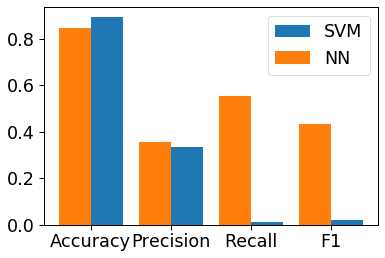

In [49]:
import matplotlib.pyplot as plt
x1 = ["Accuracy","Precision","Recall","F1",]
y1 = [0.8921,0.3333,0.0101,0.0196]
y2 = [0.8447,0.3548,0.5556,0.4331]

plt.bar(x1, y1, label = 'SVM', align = "edge", width = 0.4)
plt.bar(x1, y2, label = 'NN',  align = "edge", width = -0.4)


plt.legend()
plt.show()

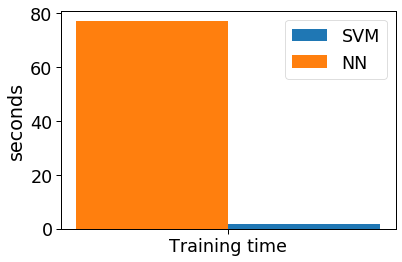

In [50]:
import matplotlib.pyplot as plt
x1 = ["Training time"]
y1 = [1.77]
y2 = [77]

plt.bar(x1, y1, label = 'SVM', align = "edge", width = 0.4)
plt.bar(x1, y2, label = 'NN',  align = "edge", width = -0.4)

plt.ylabel("seconds")

plt.legend()
plt.show()